# Ezra's Project

In [1]:
import os     
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy as sc
from scipy.stats import chi2_contingency
import bs4
from bs4 import BeautifulSoup
import requests
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
import re

In [2]:
from sklearn import preprocessing, linear_model, model_selection
from sklearn.model_selection import train_test_split

הפרוייקט ישאב נתוני מוצרים מאתרי האונליין של רשתות השיווק בארץ (שופרסל,וויקטורי).

המטרה הסופית - למידת מכונה שתאפשר לי לקבוע מחיר התחלתי למוצרים עבור סופר מתחרה. 

<b>Step 1:</b> Crawling

a. Shupersal online website. 

b. Victory online website. 

In [3]:
url= "https://www.shufersal.co.il/online/"
responsel= requests.get(url)

In [4]:
responsel

<Response [200]>

In [5]:
soup= BeautifulSoup(responsel.content, "html.parser")

 המוצרים באתר מסודרים על פי קטגוריות המופיעות בעמוד הראשון. בשלב ראשון של תהליך משיכת המידע, אמשוך טבלת קישורים הכוללת את שם הקטגוריה והקישור אל הדף עם המוצרים. 

In [6]:
tag=soup.find_all(attrs={"class":"forthMenu collapse"})
categories=[]
links=[]

In [7]:
for x in tag:
    href=x.find_all('a')
    for a in href:
        links.append(a['href'])
        categories.append(a.text.strip())
df=pd.DataFrame({"category":categories, "link":links})       
df

category                                               link
0                    ירקות  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
1                    פירות  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
2     פיצוחים ופירות יבשים  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
3    יוגורט ומשקאות יוגורט  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
4          מעדנים וקינוחים  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
..                     ...                                                ...
231                 מתוקים  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
232  מוצרי נקיון אקולוגיים  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
233             תוספי מזון  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
234               ויטמינים  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
235              לספורטאים  /online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...

[236 rows x 2 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  236 non-null    object
 1   link      236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [9]:
# נדפיס את שמות כלל הקטגוריות שקיבלנו על מנת לראות שאכן כלל המידע הדרוש נמשך 
i=0
for x in df.category.unique():
    print (f"{i}) {x}") 
    i=i+1 

0) ירקות
1) פירות
2) פיצוחים ופירות יבשים
3) יוגורט ומשקאות יוגורט
4) מעדנים וקינוחים
5) מוצרי חלב וביצים
6) מדף הגבינות
7) גבינות מעדנייה
8) מוצרים לאפיה ובישול
9) תחליפי חלב וטופו
10) מוצרי עוף והודו
11) בשר בקר וכבש
12) דגים
13) מוצרי בשר "על האש"
14) מוצרים מוכנים לאכילה
15) מנגלים ומוצרים נילווים
16) לחמים, לחמניות ופיתות מהמאפייה
17) לחם, לחמניות ופיתות
18) מאפים ועוגות מהמאפיה
19) עוגות ארוזות
20) משקאות חריפים
21) בירה ומשקאות אנרגיה
22) יינות ותירוש
23) משקאות קלים
24) מים וסודה
25) תה וקפה
26) קפסולות ופולים לאספרסו
27) סיגריות וגפרורים
28) ירקות ופירות קפואים
29) מוצרי בשר, עוף ודגים קפואים
30) מוצרי בצק ומאפה קפוא
31) חומוס וסלטים
32) נקניקים ודגים מעושנים
33) קינוחים ומנות אחרונות
34) אוכל מוכן/ להכנה מהירה
35) תחליפי בשר קפוא
36) גלידות
37) קפואים לנמנעים מגלוטן
38) פסטה, אורז , קוסקוס וקטניות
39) רטבים ותוספות
40) שמן חומץ ומיץ לימון
41) שימורים
42) מוצרי יסוד ותבלינים
43) דבש ריבות וממרחים
44) מרקים, קרוטונים ותבשילים
45) מיוחדים
46) דגנים וחטיפי דגנים
47) ממתקים
48) חט

<b>פונקציית משיכת המידע ע"פ קטגוריה:</b>

In [10]:
## הפונקציה שמייצרת דאטה פריים של מוצרים עבור כל תת-קטגוריה לפי יחידה, משקל, חבילה ומוצר כפי שמסודר באתר  
def create_df1(category, url):
    ##
    links2=[]
    products=[] 
    prices=[] 
    sizes=[] 
    suplier=[] 
    responsel= requests.get(url)
    soup= BeautifulSoup(responsel.content, "html.parser")
    print(f"for {category} requst: {responsel}")
    tag1= soup.find_all("li", attrs={"class":"miglog-prod miglog-sellingmethod-by_unit"})
    tag2= soup.find_all("li", attrs={"class":"miglog-prod miglog-sellingmethod-by_weight"})
    tag3= soup.find_all("li", attrs={"class":"miglog-prod miglog-sellingmethod-by_package"})
    tag4= soup.find_all("li", attrs={"class":"miglog-prod"})
    tags=[tag1,tag2,tag3,tag4]
    for tag in tags:
        for li in tag: #product name:
            n1=li.find_all(attrs={"class":"textContainer"})
            n2=n1[0].find_all(attrs={"class":"text"})
            products.append(n2[0].text.strip())
            #product price: 
            
        for li in tag: # prices 
            n1=li.find_all(attrs={"class":"textContainer"})
            n2=n1[0].find_all(attrs={"class":"number"})
            prices.append(n2[0].text)
            
            # supplier and size 
        for li in tag:  
            n1=li.find_all(attrs={"class":"textContainer"})
            n3=n1[0].find_all(attrs={"class":"labelsListContainer"})
            n4=n3[0].find_all(attrs={"class":"smallText"})
            n5=n4[0].find_all("span") 
            if len(n5)>1:
                sizes.append(n5[0].text.strip())
                suplier.append(n5[1].text.strip())
            else: 
                sizes.append(None)
                suplier.append(None)

    
    df=pd.DataFrame({"super":"שופרסל","catgory":category,"product":products, "suplier":suplier, "sizes":sizes,"price":prices})
    return df 

<b>פונקצייה למשיכת כלל העמודים עבור כל קטגוריה:</b>

אציין שהאתר מסמלץ מעבר עמודים זמן גלילת העמוד מטה ואין צורך בלחיצה על פתור <b>עמ' הבא</b>"

הבנת החלוקה לעמודים בוצעה ע"י התבוננות בחלון הבדיקה בלשונית הרשת. 

In [11]:
def getDF_all_pages(category, url):
    responsel= requests.get(url)
    str_soup= str(BeautifulSoup(responsel.content, "html.parser"))
    num_of_pages=re.findall('data-pages="(\d\d*)"',str_soup)
    print(f"num of pages for {category} is : {num_of_pages[0]}")
    num=int(num_of_pages[0])
    extra="/fragment?q=:relevance&page="
    df_lst=[]
    for x in range(num):
        df=create_df1(category,f"{url}{extra}{x}")
        df_lst.append(df)
    df_lst= pd.concat(df_lst, axis=0)
    df_lst.reset_index(inplace=True)
    return df_lst

<b>דוגמא למשיכת מידע עבור קטגוריה אחת מטבלת הקישורים:</b> 

In [12]:
#ניסיון לבדיקה שהפונקציות אכן עובדות עבור לינק מהטבלת הקישורים 
try1= getDF_all_pages(df.iloc[0,0],f"{url}{df.iloc[0,1]}")

num of pages for ירקות is : 15
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>


In [13]:
try1 ## הטבלה שהתקבלה 

index   super catgory           product     suplier   sizes  price
0        0  שופרסל   ירקות   עגבניה שרי בודד      שופרסל   יחידה   9.90
1        1  שופרסל   ירקות  עגבניה שרי מנומר      שופרסל  460גרם   9.90
2        2  שופרסל   ירקות   עגבניה שרי כתום      שופרסל  460גרם   9.90
3        3  שופרסל   ירקות   עגבניה שרי צהוב      שופרסל  460גרם   9.90
4        4  שופרסל   ירקות   מיקס עגבניה שרי      שופרסל  460גרם   9.90
..     ...     ...     ...               ...         ...     ...    ...
805    141  שופרסל   ירקות       עציץ בינוני  ליידי דיאן   יחידה  27.00
806    142  שופרסל   ירקות        עציץ קטן 2  ליידי דיאן   יחידה  17.00
807    143  שופרסל   ירקות   זר מיוחד מס' 15  ליידי דיאן   יחידה  75.00
808    144  שופרסל   ירקות         עציץ גדול  ליידי דיאן   יחידה  44.00
809    145  שופרסל   ירקות       עציץ גדול 2  ליידי דיאן   יחידה  62.00

[810 rows x 7 columns]

לאחר שבדקתי שהפונקציות עובדות אבצע אותן עבור כל אחת מהשורות בטבלת הקישורים על מנת לקבל טבלה אחודה. 
חריגים הם שורות 85,112,133 - עמודים אלה באתר בנויים באופן שונה משאר העמודים בטבלה, לאור העובדה שמדובר בשלוש קטגוריות בלבד החלטתי להתעלם מהן.

In [14]:
count=df.link.count()
temp_df=pd.DataFrame()
df_union=pd.DataFrame({"super":[],"catgory":[],"product":[], "suplier":[], "sizes":[],"price":[]})
for i in range(count):
    if((i!=85) and (i!=112)and (i!=133)):
        print(f"\n***********{df.iloc[i,0]}************\n**********{i}/{count}*********\n")
        temp_df=getDF_all_pages(df.iloc[i,0] ,f"{url}{df.iloc[i,1]}")
        df_union=pd.concat([df_union,temp_df], axis=0)


***********ירקות************
**********0/236*********

num of pages for ירקות is : 15
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>

***********פירות************
**********1/236*********

num of pages for פירות is : 4
for פירות requst: <Response [200]>
for פירות requst: <Response [200]>
for פירות requst: <Response [200]>
for פירות requst: <Response [200]>

***********פיצוחים ופירות יבשים************
**********2/236*********

num of pages for פיצוחים ופירות יבשים is : 12
for פיצוחים ופירות יבשים requst: <Response [2

num of pages for בירה ומשקאות אנרגיה is : 6
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>

***********יינות ותירוש************
**********22/236*********

num of pages for יינות ותירוש is : 9
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>

***********משקאות קלים************
**********23/236*********

num of pages for משקאות קלים is : 10
for משקאות קלים requst: <Response [200]>
for משקאות קלים requst: <Response [200]>
f

for שימורים requst: <Response [200]>
for שימורים requst: <Response [200]>
for שימורים requst: <Response [200]>
for שימורים requst: <Response [200]>
for שימורים requst: <Response [200]>

***********מוצרי יסוד ותבלינים************
**********42/236*********

num of pages for מוצרי יסוד ותבלינים is : 15
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסו

for לתינוק- מזון, חיתולים ומגבונים requst: <Response [200]>
for לתינוק- מזון, חיתולים ומגבונים requst: <Response [200]>
for לתינוק- מזון, חיתולים ומגבונים requst: <Response [200]>
for לתינוק- מזון, חיתולים ומגבונים requst: <Response [200]>

***********לתינוק- טיפוח, הלבשה ואביזרים************
**********57/236*********

num of pages for לתינוק- טיפוח, הלבשה ואביזרים is : 18
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים 

for מוצרים אקולוגיים requst: <Response [200]>
for מוצרים אקולוגיים requst: <Response [200]>

***********מוצרים לבישול ואפיה************
**********73/236*********

num of pages for מוצרים לבישול ואפיה is : 17
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצר

for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>

***********מחשבים וגיימינג************
**********88/236*********

num of pages for מ

for מוצרים קטנים למטבח requst: <Response [200]>
for מוצרים קטנים למטבח requst: <Response [200]>
for מוצרים קטנים למטבח requst: <Response [200]>

***********מיקסרים, בלנדרים ומעבדי מזון************
**********101/236*********

num of pages for מיקסרים, בלנדרים ומעבדי מזון is : 10
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>

***********קומקומים ומכונות קפה************
**********102/236*********

num of pages for קומקומים ומכונות קפה is : 11
for קומקומים ומכונות ק

for כורסאות, הדומים ופופים requst: <Response [200]>
for כורסאות, הדומים ופופים requst: <Response [200]>
for כורסאות, הדומים ופופים requst: <Response [200]>
for כורסאות, הדומים ופופים requst: <Response [200]>

***********מזנונים, כסאות ושולחנות קפה************
**********116/236*********

num of pages for מזנונים, כסאות ושולחנות קפה is : 13
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה 

num of pages for אביזרי כביסה וקרשי גיהוץ is : 7
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>
for אביזרי כביסה וקרשי גיהוץ requst: <Response [200]>

***********אביזרים לשירותים************
**********129/236*********

num of pages for אביזרים לשירותים is : 5
for אביזרים לשירותים requst: <Response [200]>
for אביזרים לשירותים requst: <Response [200]>
for אביזרים לשירותים requst: <Response [200]>
for אביזרים לשירותים requst: <Response [200]>
for אביזרים לשירותים requst: <Response [200]>

***********ריהוט גן************
**********130/236*********

num of pages for ריהוט גן is : 7
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Res

for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>
for צעצועים ומשחקים requst: <Response [200]>

***********ציוד לגן ולבית ספר************
**********145/236*********

num of pages for ציוד לגן ולבית ספר is : 9
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולב

for בישום נשים requst: <Response [200]>
for בישום נשים requst: <Response [200]>
for בישום נשים requst: <Response [200]>
for בישום נשים requst: <Response [200]>

***********בישום גברים************
**********160/236*********

num of pages for בישום גברים is : 17
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>

***********בשמי בוטיק************
*******

for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>

***********טיפוח ועיצוב שיער************
**********172/236*********

num of pages for טיפוח ועיצוב שיער is : 13
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]

for סבון,שמפו ומרכך requst: <Response [200]>
for סבון,שמפו ומרכך requst: <Response [200]>
for סבון,שמפו ומרכך requst: <Response [200]>
for סבון,שמפו ומרכך requst: <Response [200]>
for סבון,שמפו ומרכך requst: <Response [200]>
for סבון,שמפו ומרכך requst: <Response [200]>

***********היגיינה************
**********188/236*********

num of pages for היגיינה is : 5
for היגיינה requst: <Response [200]>
for היגיינה requst: <Response [200]>
for היגיינה requst: <Response [200]>
for היגיינה requst: <Response [200]>
for היגיינה requst: <Response [200]>

***********דאודורנט************
**********189/236*********

num of pages for דאודורנט is : 4
for דאודורנט requst: <Response [200]>
for דאודורנט requst: <Response [200]>
for דאודורנט requst: <Response [200]>
for דאודורנט requst: <Response [200]>

***********היגיינת פה************
**********190/236*********

num of pages for היגיינת פה is : 16
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Resp

for אובלטים ומצות requst: <Response [200]>

***********חלב, גבינות ויוגורט************
**********216/236*********

num of pages for חלב, גבינות ויוגורט is : 2
for חלב, גבינות ויוגורט requst: <Response [200]>
for חלב, גבינות ויוגורט requst: <Response [200]>

***********משקאות, גבינות וטופו תחליפיים************
**********217/236*********

num of pages for משקאות, גבינות וטופו תחליפיים is : 5
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>

***********ביצים אורגניות************
**********218/236*********

num of pages for ביצים אורגניות is : 1
for ביצים אורגניות requst: <Response [200]>

***********ממרחים ופשתן************
**********219/236*********

num of pages for ממרחים ופשתן is : 1
for ממרחים ופשתן requst: <Response [200]>

***********ללא גל

# וקיבלנו את הטבלה עבור שופרסל 

<b>
נבצע טיפול ראשוני בנתונים: 
1. הסרת העמודה אינדקס 
2. המרת עמודת המחיר למספרי 
3. המשך הטיפול ייעשה לאחר שאאחד את הטבלאות מכלל המקורות 
    </b>

In [15]:
mydf=df_union.copy()
mydf.reset_index(inplace=True)
mydf.drop(['index','level_0'],axis=1,inplace=True)
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74418 entries, 0 to 74417
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   super    74418 non-null  object
 1   catgory  74418 non-null  object
 2   product  74418 non-null  object
 3   suplier  69788 non-null  object
 4   sizes    69788 non-null  object
 5   price    74418 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


In [16]:
for p in range(mydf.price.count()):
    mydf.price[p]=mydf.price[p].replace(",","")
    mydf.price[p]=mydf.price[p].replace("החל מ-","")
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74418 entries, 0 to 74417
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   super    74418 non-null  object
 1   catgory  74418 non-null  object
 2   product  74418 non-null  object
 3   suplier  69788 non-null  object
 4   sizes    69788 non-null  object
 5   price    74418 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


In [17]:
mydf.price= mydf.price.astype('float')

In [18]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74418 entries, 0 to 74417
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    74418 non-null  object 
 1   catgory  74418 non-null  object 
 2   product  74418 non-null  object 
 3   suplier  69788 non-null  object 
 4   sizes    69788 non-null  object 
 5   price    74418 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.4+ MB


In [19]:
mydf

super    catgory                product    suplier    sizes  price
0      שופרסל      ירקות        עגבניה שרי בודד     שופרסל    יחידה    9.9
1      שופרסל      ירקות       עגבניה שרי מנומר     שופרסל   460גרם    9.9
2      שופרסל      ירקות        עגבניה שרי כתום     שופרסל   460גרם    9.9
3      שופרסל      ירקות        עגבניה שרי צהוב     שופרסל   460גרם    9.9
4      שופרסל      ירקות        מיקס עגבניה שרי     שופרסל   460גרם    9.9
...       ...        ...                    ...        ...      ...    ...
74413  שופרסל  לספורטאים  משקפי שחיה סטאר ילדים       None     None   30.0
74414  שופרסל  לספורטאים        פריז ג'ל לכאבים   FREEZING  100 מ"ל   54.9
74415  שופרסל  לספורטאים      פריז תרסיס לכאבים   FREEZING  120 מ"ל   54.4
74416  שופרסל  לספורטאים  פרסקינדול מדבקה פעילה  פרסקינדול    5 יח'   66.9
74417  שופרסל  לספורטאים    פרסקינדול קול ספריי  פרסקינדול  250 מ"ל   66.9

[74418 rows x 6 columns]

<b>בשלב זה אחלץ את הטבלה לאקסל על מנת שאוכל לעבוד איתה ולא אצטרך בכל פעם לשאוב את הנתונים. 

In [20]:
mydf.to_excel('shupersal_df_u.xlsx',encoding='utf-8')

In [21]:
shupersal_df=pd.read_excel("shupersal_df_u.xlsx")

In [22]:
shupersal_df.head()

Unnamed: 0   super catgory           product suplier   sizes  price
0           0  שופרסל   ירקות   עגבניה שרי בודד  שופרסל   יחידה    9.9
1           1  שופרסל   ירקות  עגבניה שרי מנומר  שופרסל  460גרם    9.9
2           2  שופרסל   ירקות   עגבניה שרי כתום  שופרסל  460גרם    9.9
3           3  שופרסל   ירקות   עגבניה שרי צהוב  שופרסל  460גרם    9.9
4           4  שופרסל   ירקות   מיקס עגבניה שרי  שופרסל  460גרם    9.9

# כעת נבצע שלבים דומים עבור מקור שונה - אתר הקניות של וויקטורי אונליין 

In [23]:
url= "https://www.victoryonline.co.il/%D7%9C%D7%97%D7%9D/%D7%9E%D7%93%D7%A3"
responsel= requests.get(url)

In [24]:
responsel

<Response [200]>

In [25]:
soup= BeautifulSoup(responsel.content, "html.parser")

In [26]:
tag=soup.find_all(attrs={"class":"DepartmentLinks"})
categories=[]
links=[]

In [27]:
for x in tag:
    href=x.find_all('a')
    for a in href:
        links.append(a['href'])
        categories.append(a.text.strip())
df=pd.DataFrame({"category":categories, "link":links})       
df

category                                               link
0            המועדפים שלי   https://www.victoryonline.co.il/המועדפים_שלי/מדף
1            קניות קודמות  https://www.victoryonline.co.il/YourAccount/Or...
2                  רשימות         https://www.victoryonline.co.il/רשימות/מדף
3          מבצעים מומלצים  https://www.victoryonline.co.il/מבצעים_מומלצים...
4              כל המבצעים     https://www.victoryonline.co.il/כל_המבצעים/מדף
..                    ...                                                ...
194           אביזרי אמבט    https://www.victoryonline.co.il/אביזרי_אמבט/מדף
195             סבון מוצק      https://www.victoryonline.co.il/סבון_מוצק/מדף
196            סבון נוזלי     https://www.victoryonline.co.il/סבון_נוזלי/מדף
197  מוצרי ספיגה למבוגרים  https://www.victoryonline.co.il/מוצרי_ספיגה_למ...
198           אמצעי מניעה    https://www.victoryonline.co.il/אמצעי_מניעה/מדף

[199 rows x 2 columns]

קיבלנו טבלת קישורים. 
נסתכל על הקטגוריות, נשווה לאתר ונסדר את הטבלה בהתאם לצורך. 

In [28]:
i=0
for c in df.category:
    print(f"{i}) {c}")
    i=i+1

0) המועדפים שלי
1) קניות קודמות
2) רשימות
3) מבצעים מומלצים
4) כל המבצעים
5) מבצעי כרטיס אשראי ויקטורי
6) מבצעי 5 שקלים
7) חדש על המדף
8) חנות מותג סנו
9) חנות מותג טבעול
10) חנות מוצרי חלב
11) מתחם טיפוח
12) חנות יקבי כרמל
13) 
14) ללא גלוטן
15) טבעוני
16) אורגני
17) לחם
18) לחמניות ופיתות
19) פריכיות, מצות ותחליפי לחם
20) מאפייה טריה
21) פירות וירקות
22) פירות
23) ירקות
24) פירות יבשים, אגוזים ופיצוחים
25) חלב, משקאות ותחליפי חלב
26) חלב ומשקאות
27) משקאות סויה ואורז
28) גבינות
29) קוטג' וגבינה לבנה
30) בולגרית, פטה, ומלוחה
31) גבינה צהובה ומוצרלה
32) גבינות מחלב עיזים או כבשים
33) גבינות קשות
34) גבינות רכות
35) גבינת שמנת
36) יוגורט ומעדנים
37) יוגורט
38) מעדנים
39) בשר, עוף והודו
40) בשר טרי
41) עוף והודו טרי
42) בשר ועוף מוכן
43) דגים טריים וארוזים
44) דגים טריים
45) דגים ארוזים וסושי טרי
46) נקניקים ונקניקיות
47) נקניקיות
48) נקניקים ופסטרמה
49) בישול ואפיה
50) חמאה, מרגרינה
51) שמנת ולבן
52) שמנת לבישול והקצפה
53) סלטים
54) פסטה טריה
55) ביצים
56) טופו וסייטן
57) חומוס וטחינה
5

In [29]:
df=df.iloc[17:,:]

In [30]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


category  \
0                          לחם   
1               לחמניות ופיתות   
2    פריכיות, מצות ותחליפי לחם   
3                  מאפייה טריה   
4                 פירות וירקות   
..                         ...   
177                אביזרי אמבט   
178                  סבון מוצק   
179                 סבון נוזלי   
180       מוצרי ספיגה למבוגרים   
181                אמצעי מניעה   

                                                  link  
0              https://www.victoryonline.co.il/לחם/מדף  
1    https://www.victoryonline.co.il/לחמניות_ופיתות...  
2    https://www.victoryonline.co.il/פריכיות_מצות_ו...  
3      https://www.victoryonline.co.il/מאפייה_טריה/מדף  
4     https://www.victoryonline.co.il/פירות_וירקות/מדף  
..                                                 ...  
177    https://www.victoryonline.co.il/אביזרי_אמבט/מדף  
178      https://www.victoryonline.co.il/סבון_מוצק/מדף  
179     https://www.victoryonline.co.il/סבון_נוזלי/מדף  
180  https://www.victoryonline.co.il/מוצרי_ספיגה_למ...  
181    https://www.victoryonline.co.il/אמצעי_מניעה/מדף  

[182 rows x 2 columns]

<b> נשים לב שמוצר עלול להופיע בכפילות - בקטגוריה ראשית ובקטגוריה משנית, נתייחס לכך בסידור הנתונים 

In [31]:
#  עבור וויקטורי אונליין הפונקציה שמייצרת דאטה פריים של מוצרים  
def create_df2(category, url):
    ##
    products=[] 
    prices=[] 
    sizes=[] 
    suplier1=[] 
    responsel= requests.get(url)
    soup1= BeautifulSoup(responsel.content, "html.parser")
    print(f"for {category} requst: {responsel}")
    tag1= soup1.find_all("li", attrs={"class":"NgMspProductCell MSM Expanded"})
    
    for t in tag1:
        names=t.find_all(attrs={"class":"Prefix"})
        products.append(names[0].text.strip())

    for t in tag1:
        size=t.find_all(attrs={"class":"Suffix"})
        sizes.append(size[0].text.strip())
 
    for t in tag1:
        Price=t.find_all(attrs={"class":"Price"})
        prices.append(Price[0].text.strip())
    
    df=pd.DataFrame({"super":"וויקטורי","catgory":category,"product":products, "suplier":None, "sizes":sizes,"price":prices})
    
    tag2 = soup1.find_all(attrs={"class":"FilterGroup","groupid":"brand"})
    suplier_lst=[]
    
    pattern = "חנות מותג (\w*\s*\w*)"
    pattern2= "חנות (\w*\s*\w*)"
    if(re.findall("חנות מותג",category)):
        df["suplier"]=re.findall(pattern,category)[0]
        return df
    if(re.findall("חנות",category)):
        df["suplier"]=re.findall(pattern2,category)[0]
        return df
    
    
    if len(tag2)>0:
        sup=tag2[0].find_all("a")
        for s in sup:
            suplier_lst.append(s.text.strip())
        print(suplier_lst)
        for x in range(df["product"].count()):
            for s in suplier_lst:
                if (re.findall((f" {s}"),df["product"][x])):
                    df["suplier"][x]=s
                
    return df 

<b> נשים לב - עמודת הספק נשאבת מעמודת שם המוצר, זאת לאור העובדה שנתון זה אינו מופרד באתר  ממנו נלקחים הפרטים 
    
    נבדוק שהפונקציה אכן עובדת
    
    

In [32]:
create_df2(df.iloc[6,0],df.iloc[6,1])

for ירקות requst: <Response [200]>
['<מותג פרטי>', 'א.אדמה', 'ויקטורי', 'חסלט', 'מרינה', 'שטראוס']


super catgory                              product suplier  \
0   וויקטורי   ירקות                בצל אדום יבש לפי משקל    None   
1   וויקטורי   ירקות                     בצל יבש לפי משקל    None   
2   וויקטורי   ירקות                      בצל ירוק א.אדמה  א.אדמה   
3   וויקטורי   ירקות       בצל ירוק אוצר הארץ מהדרין חסלט    חסלט   
4   וויקטורי   ירקות               בצל ירוק כפרי טרי חסלט    חסלט   
..       ...     ...                                  ...     ...   
91  וויקטורי   ירקות  טעם הטבע שעועית אדומה מבושלת שטראוס  שטראוס   
92  וויקטורי   ירקות                        בטטה לפי משקל    None   
93  וויקטורי   ירקות       תפוח אדמה אדום תפזורת לפי משקל    None   
94  וויקטורי   ירקות          תפוח אדמה לבן ארוז לפי משקל    None   
95  וויקטורי   ירקות                   נבטים סינים א.אדמה  א.אדמה   

                    sizes   price  
0   (500 גרם, כ- 3-4 יח')   ₪6.90  
1   (500 גרם, כ- 3-5 יח')   ₪4.90  
2                           ₪5.90  
3                           ₪7.90  
4                           ₪7.90  
..                    ...     ...  
91              (475 גרם)  ₪14.90  
92   (500 גרם, כ - 1 יח')   ₪8.90  
93  (500 גרם, כ- 2-4 יח')   ₪4.90  
94              (500 גרם)   ₪3.90  
95                          ₪7.90  

[96 rows x 6 columns]

נכתוב פונקציה למשיכת כלל העמודים. כאן הדבר היה פשוט יותר לאור העובדה שעמוד מכיל עד 100 מוצרים ומופיע סמן העמ' הבא. 

In [33]:
def getDF_all_pages2(category, url):
    responsel= requests.get(url)
    soup=BeautifulSoup(responsel.content, "html.parser")
    
    of_product=soup.find_all(attrs={"class":"ListTitleWrap"})
    num_of_product=of_product[0].find_all(attrs={"id":"ProductCount","class":"ProductCount"})[0].text.strip()
    num_of_product=num_of_product.replace("(","")
    num_of_product=num_of_product.replace(")","")
    print(f"num of product for {category} is : {num_of_product}")
    num=int(num_of_product)//100+1
    print(f"num of pages for {category} is : {num}")
    extra="?Page="
    df_lst=[]
    for x in range(1,num+1):
        df=create_df2(category,f"{url}{extra}{x}")
        df_lst.append(df)
    df_lst= pd.concat(df_lst, axis=0)
    df_lst.reset_index(inplace=True)
    return df_lst

<b>וכעת נשאב את כלל הנתונים עבור המוצרים באתר וויקטורי </b>

In [34]:
count=df.link.count()
temp_df=pd.DataFrame()
df_union=pd.DataFrame({"super":[],"catgory":[],"product":[], "suplier":[], "sizes":[],"price":[]})
for i in range(count):
    print(f"\n***********{df.iloc[i,0]}************\n**********{i}/{count}*********\n")
    temp_df=getDF_all_pages2(df.iloc[i,0] ,df.iloc[i,1])
    df_union=pd.concat([df_union,temp_df], axis=0)


***********לחם************
**********0/182*********

num of product for לחם is : 48
num of pages for לחם is : 1
for לחם requst: <Response [200]>
['אחדות', "אנג'ל", "בונז'ור", 'ברמן', 'גרין לייט', 'דגנית עין בר', 'לחם הארץ']

***********לחמניות ופיתות************
**********1/182*********

num of product for לחמניות ופיתות is : 24
num of pages for לחמניות ופיתות is : 1
for לחמניות ופיתות requst: <Response [200]>
["אנג'ל", 'ברמן', 'גרין לייט', 'דגנית עין בר', 'לחם הארץ', 'מאפיית אריאל', 'מאפיית ודש', 'מעדני תנעמי', 'פיתה אקספרס']

***********פריכיות, מצות ותחליפי לחם************
**********2/182*********

num of product for פריכיות, מצות ותחליפי לחם is : 54
num of pages for פריכיות, מצות ותחליפי לחם is : 1
for פריכיות, מצות ותחליפי לחם requst: <Response [200]>
['אבאל', "אנרג'י", 'אסם', 'אקסטרה (תבליני מימון)', 'וילי פוד', 'זן בר', 'מאסטר שף', 'מנה', 'נסטלה', 'פתית', 'ריל פודס']

***********מאפייה טריה************
**********3/182*********

num of product for מאפייה טריה is : 6
num of pages

num of product for יוגורט is : 170
num of pages for יוגורט is : 2
for יוגורט requst: <Response [200]>
['גד', 'גמדים', 'דנונה', 'המחלבה', 'חלב הארץ', 'יופלה', 'יורו', 'מולר', 'משק צוריאל', 'פרילי', 'תנובה']
for יוגורט requst: <Response [200]>
['גד', 'גמדים', 'דנונה', 'המחלבה', 'חלב הארץ', 'יופלה', 'יורו', 'מולר', 'משק צוריאל', 'פרילי', 'תנובה']

***********מעדנים************
**********21/182*********

num of product for מעדנים is : 72
num of pages for מעדנים is : 1
for מעדנים requst: <Response [200]>
['אלפרו', 'באדי', 'גד', 'גמדים', 'יולו', 'מוו', 'מולר', 'מילקי', 'ספלנדיד', 'סקי', 'עדן קינוחים', 'קרלו', 'שטראוס', 'תנובה', 'תנובה אלטרנטיב']

***********בשר, עוף והודו************
**********22/182*********

num of product for בשר, עוף והודו is : 90
num of pages for בשר, עוף והודו is : 1
for בשר, עוף והודו requst: <Response [200]>
['<מותג פרטי>', 'אדום אדום', 'מאמא עוף', 'נחמיה לחוביץ', 'נטו', 'עטרה', 'שאטובריאן']

***********בשר טרי************
**********23/182*********

num of product fo

num of product for שניצל בשרי וארוחות מוכנות בשריות is : 34
num of pages for שניצל בשרי וארוחות מוכנות בשריות is : 1
for שניצל בשרי וארוחות מוכנות בשריות requst: <Response [200]>
['טיבון ויל', 'מאמא עוף', 'עוף טוב']

***********גלידות וקינוחים************
**********52/182*********

num of product for גלידות וקינוחים is : 3
num of pages for גלידות וקינוחים is : 1
for גלידות וקינוחים requst: <Response [200]>
["בראנץ' אנד קראנץ'", 'כרמית', 'פינוקים (קפוא)']

***********חנות מותג טבעול************
**********53/182*********

num of product for חנות מותג טבעול is : 35
num of pages for חנות מותג טבעול is : 1
for חנות מותג טבעול requst: <Response [200]>

***********מרקים ותבשילים************
**********54/182*********

num of product for מרקים ותבשילים is : 31
num of pages for מרקים ותבשילים is : 1
for מרקים ותבשילים requst: <Response [200]>
['אסם', 'דודלס', 'וילי פוד', "מג'יק(נטו)", 'מנה', 'פולדס', 'קנור']

***********תבשילים************
**********55/182*********

num of product for תבשילים is

for ריבות requst: <Response [200]>
['778', 'יד מרדכי', 'מנז אנד גאסר', 'סאן דלפור', 'ענבי ציון']

***********ממרחים מתוקים************
**********79/182*********

num of product for ממרחים מתוקים is : 31
num of pages for ממרחים מתוקים is : 1
for ממרחים מתוקים requst: <Response [200]>
['אחוה', 'דולכור', 'הנמל', 'השחר העולה', 'השקד', 'לוטוס', 'מובנפיק', 'מיה', 'נוטלה', 'סקיפי', 'עלית', 'קליית גת', 'שקדיה', 'תמר כנרת']

***********ממרחים אחרים************
**********80/182*********

num of product for ממרחים אחרים is : 12
num of pages for ממרחים אחרים is : 1
for ממרחים אחרים requst: <Response [200]>
['אוליביה', 'טבסקו', 'טוסו', 'טעמי אסיה', 'פרסקו', 'תבליני ביטון יוחאי']

***********אפיה ביתית************
**********81/182*********

num of product for אפיה ביתית is : 118
num of pages for אפיה ביתית is : 2
for אפיה ביתית requst: <Response [200]>
['אופנהיימר', 'אסם', 'אשבל', 'בונומי', 'בריאות וטבע דגש', 'הנמל', 'השחר העולה', 'ויליגר', 'טחנת קמח דגן', 'טחנת רוט', 'יד מרדכי', 'מיה', 'מימונס', 'מ

num of product for עוגות is : 36
num of pages for עוגות is : 1
for עוגות requst: <Response [200]>
['אחוה', 'אסם', "דולצ'ה ויטה", 'יוגטה', 'מילקי', 'סבן דייז', 'עלית', 'פייבר וואן', "צ'וקטה", 'קינדר', 'קפולסקי', "ריץ'"]

***********עוגיות************
**********99/182*********

num of product for עוגיות is : 76
num of pages for עוגיות is : 1
for עוגיות requst: <Response [200]>
['אוראו', 'אחוה', 'אסם', 'באלזן', 'בונומי', "דולצ'ה ויטה", 'טוסו', 'כרמית', 'לה בייקרי', 'לחמי', 'מילקה', 'מן', 'מעדני מלך', 'מרבה', 'נסטלה', 'סבן דייז', 'עבאדי', 'עלית', 'קונדיטוריית אנגל', 'קפולסקי', 'שיבולים']

***********סוכריות ומסטיקים************
**********100/182*********

num of product for סוכריות ומסטיקים is : 44
num of pages for סוכריות ומסטיקים is : 1
for סוכריות ומסטיקים requst: <Response [200]>
['אורביט', 'איירוייבס', 'בזוקה', 'הובה בובה', 'יוגטה', 'מאסט', 'מנטוס', 'סקיטלס', 'עלית', 'פז', 'פייב', 'שטורק']

***********שוקולד************
**********101/182*********

num of product for שוקולד is : 120
nu

for משקאות קרים requst: <Response [200]>
['אלוורה קינג', 'אקווה נובה', 'אקסל', "בורג'מי", 'בלו', "ג'ומקס", 'היל ויו', "ויטמינצ'יק", 'טמפו', 'יכין', 'כרמית', 'מונסטר', 'מי עדן', 'מירינדה', 'נביעות', 'נטורה נובה', 'נשר מאלט', 'סאן בנדטו', 'סאן פלגרינו', 'סאפה', 'סבן אפ', 'סוויטנגו', 'ספרייט', 'ספרינג', 'עין גדי', 'עלית', 'פאנטה', 'פיוז-טי', 'פפסי', "פרוט אנד וג'", 'פרוט ווטר', 'פריגת', 'פרימור(מצונן)', 'פריניב', 'קוקה-קולה', 'קינלי סודה', 'קריסטל', 'רד בול', 'שוופס', 'תפוזינה']
for משקאות קרים requst: <Response [200]>
['אלוורה קינג', 'אקווה נובה', 'אקסל', "בורג'מי", 'בלו', "ג'ומקס", 'היל ויו', "ויטמינצ'יק", 'טמפו', 'יכין', 'כרמית', 'מונסטר', 'מי עדן', 'מירינדה', 'נביעות', 'נטורה נובה', 'נשר מאלט', 'סאן בנדטו', 'סאן פלגרינו', 'סאפה', 'סבן אפ', 'סוויטנגו', 'ספרייט', 'ספרינג', 'עין גדי', 'עלית', 'פאנטה', 'פיוז-טי', 'פפסי', "פרוט אנד וג'", 'פרוט ווטר', 'פריגת', 'פרימור(מצונן)', 'פריניב', 'קוקה-קולה', 'קינלי סודה', 'קריסטל', 'רד בול', 'שוופס', 'תפוזינה']

***********אבקות שוקו ושתיה**********

num of product for חומרי ניקיון לבית is : 58
num of pages for חומרי ניקיון לבית is : 1
for חומרי ניקיון לבית requst: <Response [200]>
["אג'קס", 'אסטוניש', 'דזיטול', 'יעקבי', 'כלורוקס', 'סיף', 'סנו', 'סנט מוריץ', 'שניב']

***********אביזרי ניקיון************
**********144/182*********

num of product for אביזרי ניקיון is : 70
num of pages for אביזרי ניקיון is : 1
for אביזרי ניקיון requst: <Response [200]>
['אלבגינו', 'אסותא', 'ביאנקו', 'דיש מטיק', 'וי טריל', 'יוגב', 'יעקבי', 'מבריקל הפלא', 'ניקול', 'סנו', 'סנו סושי', 'סנט מוריץ', 'עיסא ערטול', 'קוויק', 'ריצפז', 'שייני']

***********ניקוי כלים************
**********145/182*********

num of product for ניקוי כלים is : 48
num of pages for ניקוי כלים is : 1
for ניקוי כלים requst: <Response [200]>
['סוד', 'סנו', 'פיירי', 'פיניש', 'פלמוליב', 'שניב']

***********ניקוי רצפות************
**********146/182*********

num of product for ניקוי רצפות is : 27
num of pages for ניקוי רצפות is : 1
for ניקוי רצפות requst: <Response [200]>
['נקה', 'סוד', '

num of product for טיפוח ועיצוב השיער is : 2
num of pages for טיפוח ועיצוב השיער is : 1
for טיפוח ועיצוב השיער requst: <Response [200]>
['נטורל פורמולה', 'פנטן']

***********מרכך שיער ומסיכות************
**********175/182*********

num of product for מרכך שיער ומסיכות is : 39
num of pages for מרכך שיער ומסיכות is : 1
for מרכך שיער ומסיכות requst: <Response [200]>
['הוואי', 'כיף', 'לוריאל', 'נטורל פורמולה', 'נקה 7', 'סטייל', 'פינוק', 'פנטן', 'קרליין']

***********סבונים והיגיינת הגוף************
**********176/182*********

num of product for סבונים והיגיינת הגוף is : 100
num of pages for סבונים והיגיינת הגוף is : 2
for סבונים והיגיינת הגוף requst: <Response [200]>
['דאב', 'דר. פישר', 'הוואי', 'כיף', 'נובו', 'נקה 7', 'פינוק', 'פלמוליב', 'פמילי', 'פנינה רוזנבלום', 'קרמה']
for סבונים והיגיינת הגוף requst: <Response [200]>
['דאב', 'דר. פישר', 'הוואי', 'כיף', 'נובו', 'נקה 7', 'פינוק', 'פלמוליב', 'פמילי', 'פנינה רוזנבלום', 'קרמה']

***********אביזרי אמבט************
**********177/182*********

In [35]:
mydf2=df_union.copy()

In [36]:
mydf2

super     catgory                                            product  \
0   וויקטורי         לחם                                לחם אחיד פרוס אנג'ל   
1   וויקטורי         לחם                                לחם חיטה מלאה אנג'ל   
2   וויקטורי         לחם                      לחם מחמצת בסגנון איטלקי אנג'ל   
3   וויקטורי         לחם                             לחם עינן קל פרוס אנג'ל   
4   וויקטורי         לחם        לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   
..       ...         ...                                                ...   
84  וויקטורי  סבון נוזלי                         אל סבון פרחי בר ורוד פמילי   
85  וויקטורי  סבון נוזלי             סבון נוזלי לידיים מועשר בשמן זית פמילי   
86  וויקטורי  סבון נוזלי                       אלכוג'ל לעור הידיים דר. פישר   
87  וויקטורי  סבון נוזלי  אלכוג'ל לעור הידיים עם כיסוי דמות מסיליקון דר....   
88  וויקטורי  סבון נוזלי                  אלכוג'ל לעור הידיים תפוח דר. פישר   

     suplier      sizes   price  index  
0      אנג'ל  (750 גרם)   ₪6.60    0.0  
1      אנג'ל  (750 גרם)  ₪14.90    1.0  
2      אנג'ל  (500 גרם)  ₪15.90    2.0  
3      אנג'ל  (500 גרם)  ₪14.80    3.0  
4      אנג'ל  (750 גרם)  ₪12.90    4.0  
..       ...        ...     ...    ...  
84     פמילי   (1 ליטר)  ₪14.90   84.0  
85     פמילי  (500 מ"ל)   ₪9.90   85.0  
86  דר. פישר  (500 מ"ל)  ₪29.90   86.0  
87  דר. פישר   (30 מ"ל)  ₪19.90   87.0  
88  דר. פישר  (500 מ"ל)  ₪29.90   88.0  

[9070 rows x 7 columns]

In [37]:
mydf2.drop(["index"],axis=1, inplace=True)

In [38]:
mydf2

super     catgory                                            product  \
0   וויקטורי         לחם                                לחם אחיד פרוס אנג'ל   
1   וויקטורי         לחם                                לחם חיטה מלאה אנג'ל   
2   וויקטורי         לחם                      לחם מחמצת בסגנון איטלקי אנג'ל   
3   וויקטורי         לחם                             לחם עינן קל פרוס אנג'ל   
4   וויקטורי         לחם        לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   
..       ...         ...                                                ...   
84  וויקטורי  סבון נוזלי                         אל סבון פרחי בר ורוד פמילי   
85  וויקטורי  סבון נוזלי             סבון נוזלי לידיים מועשר בשמן זית פמילי   
86  וויקטורי  סבון נוזלי                       אלכוג'ל לעור הידיים דר. פישר   
87  וויקטורי  סבון נוזלי  אלכוג'ל לעור הידיים עם כיסוי דמות מסיליקון דר....   
88  וויקטורי  סבון נוזלי                  אלכוג'ל לעור הידיים תפוח דר. פישר   

     suplier      sizes   price  
0      אנג'ל  (750 גרם)   ₪6.60  
1      אנג'ל  (750 גרם)  ₪14.90  
2      אנג'ל  (500 גרם)  ₪15.90  
3      אנג'ל  (500 גרם)  ₪14.80  
4      אנג'ל  (750 גרם)  ₪12.90  
..       ...        ...     ...  
84     פמילי   (1 ליטר)  ₪14.90  
85     פמילי  (500 מ"ל)   ₪9.90  
86  דר. פישר  (500 מ"ל)  ₪29.90  
87  דר. פישר   (30 מ"ל)  ₪19.90  
88  דר. פישר  (500 מ"ל)  ₪29.90  

[9070 rows x 6 columns]

# וקיבלנו את הטבלה עבור וויקטורי. 

<b> נייצא אותה לאקסל ונטען על מנת לחסוך את שלב שאיבת המידע כל פעם</b>

In [39]:
mydf2.to_excel('victory.xlsx',encoding='utf-8')

In [40]:
victory_df=pd.read_excel("victory.xlsx")

In [41]:
victory_df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [42]:
victory_df.head()

super catgory                                      product suplier  \
0  וויקטורי     לחם                          לחם אחיד פרוס אנג'ל   אנג'ל   
1  וויקטורי     לחם                          לחם חיטה מלאה אנג'ל   אנג'ל   
2  וויקטורי     לחם                לחם מחמצת בסגנון איטלקי אנג'ל   אנג'ל   
3  וויקטורי     לחם                       לחם עינן קל פרוס אנג'ל   אנג'ל   
4  וויקטורי     לחם  לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   אנג'ל   

       sizes   price  
0  (750 גרם)   ₪6.60  
1  (750 גרם)  ₪14.90  
2  (500 גרם)  ₪15.90  
3  (500 גרם)  ₪14.80  
4  (750 גרם)  ₪12.90

<b> כעת נבצע טיפול ראשוני בנתונים בכך שנמיר את עמודת המחיר למספרית
</b> 

In [43]:
victory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9070 entries, 0 to 9069
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   super    9070 non-null   object
 1   catgory  9025 non-null   object
 2   product  9070 non-null   object
 3   suplier  8630 non-null   object
 4   sizes    8874 non-null   object
 5   price    9070 non-null   object
dtypes: object(6)
memory usage: 425.3+ KB


In [44]:
victory_df.price.unique() ## נסתכל לראות כיצד רשוםמים כלל המחירים באתר 

array(['₪6.60', '₪14.90', '₪15.90', '₪14.80', '₪12.90', '₪13.90',
       '₪15.50', '₪20.90', '₪5.90', '₪7.90', '₪4.40', '₪4.45', '₪11.90',
       '₪3.90', '₪17.90', '₪10.50', '₪10.90', '₪9.90', '₪5.00', '₪12.50',
       '₪12.00', '₪8.90', '₪6.90', '₪4.90', '₪16.90', '₪49.90', '₪19.90',
       '₪25.00', '₪7.40', '₪9.10', '₪15.60', '₪8.50', '₪11.50', '₪19.95',
       '₪10.00', '₪29.90', '₪6.40', '₪20.00', '₪27.90', '₪26.90',
       '₪17.50', '₪18.90', '₪30.90', '₪5.59', '₪11.18', '₪5.94', '₪11.88',
       '₪5.17', '₪7.10', '₪7.60', '₪16.50', '₪8.91', '₪7.00', '₪7.50',
       '₪15.00', '₪8.30', '₪6.30', '₪5.50', '₪5.30', '₪6.50', '₪2.50',
       '₪5.80', '₪2.30', '₪21.90', '₪11.30', '₪11.40', '₪4.70', '₪4.75',
       '₪9.50', '₪14.25', '₪3.10', '₪3.70', '₪9.00', '₪6.10', '₪39.90',
       '₪2.99', '₪25.90', '₪21.70', '₪24.90', '₪2.90', '₪23.90', '₪12.20',
       '₪22.70', '₪12.60', '₪11.60', '₪5.70', '₪17.80', '₪4.10', '₪3.80',
       '₪19.50', '₪13.80', '₪28.90', '₪22.90', '₪4.49', '₪14.3

In [45]:
for p in range(victory_df.price.count()): # נבצע החלפה לאופן בו כתובים על מנת שיופיעו רק מספרים ונקודה המסמנת את החלק העשרוני 
    victory_df.price[p]=victory_df.price[p].replace(",","")
    victory_df.price[p]=victory_df.price[p].replace("₪","")
    victory_df.price[p]=victory_df.price[p].replace("אג'","")
    victory_df.price[p]=victory_df.price[p].replace("'","")

In [46]:
victory_df.price= victory_df.price.astype('float') # נמיר את העמודה לטיפוס float 

In [47]:
victory_df.info() # נראה שאכן בוצע 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9070 entries, 0 to 9069
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    9070 non-null   object 
 1   catgory  9025 non-null   object 
 2   product  9070 non-null   object 
 3   suplier  8630 non-null   object 
 4   sizes    8874 non-null   object 
 5   price    9070 non-null   float64
dtypes: float64(1), object(5)
memory usage: 425.3+ KB


In [48]:
victory_df

super     catgory                                            product  \
0     וויקטורי         לחם                                לחם אחיד פרוס אנג'ל   
1     וויקטורי         לחם                                לחם חיטה מלאה אנג'ל   
2     וויקטורי         לחם                      לחם מחמצת בסגנון איטלקי אנג'ל   
3     וויקטורי         לחם                             לחם עינן קל פרוס אנג'ל   
4     וויקטורי         לחם        לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   
...        ...         ...                                                ...   
9065  וויקטורי  סבון נוזלי                         אל סבון פרחי בר ורוד פמילי   
9066  וויקטורי  סבון נוזלי             סבון נוזלי לידיים מועשר בשמן זית פמילי   
9067  וויקטורי  סבון נוזלי                       אלכוג'ל לעור הידיים דר. פישר   
9068  וויקטורי  סבון נוזלי  אלכוג'ל לעור הידיים עם כיסוי דמות מסיליקון דר....   
9069  וויקטורי  סבון נוזלי                  אלכוג'ל לעור הידיים תפוח דר. פישר   

       suplier      sizes  price  
0        אנג'ל  (750 גרם)    6.6  
1        אנג'ל  (750 גרם)   14.9  
2        אנג'ל  (500 גרם)   15.9  
3        אנג'ל  (500 גרם)   14.8  
4        אנג'ל  (750 גרם)   12.9  
...        ...        ...    ...  
9065     פמילי   (1 ליטר)   14.9  
9066     פמילי  (500 מ"ל)    9.9  
9067  דר. פישר  (500 מ"ל)   29.9  
9068  דר. פישר   (30 מ"ל)   19.9  
9069  דר. פישר  (500 מ"ל)   29.9  

[9070 rows x 6 columns]

In [49]:
victory_df.describe(include="all")

super        catgory                     product suplier  \
count       9070           9025                        9070    8630   
unique         1            177                        4646     546   
top     וויקטורי  חטיפים מתוקים  אקונומיקה ז'אוול לימון סנו     סנו   
freq        9070            324                           9     409   
mean         NaN            NaN                         NaN     NaN   
std          NaN            NaN                         NaN     NaN   
min          NaN            NaN                         NaN     NaN   
25%          NaN            NaN                         NaN     NaN   
50%          NaN            NaN                         NaN     NaN   
75%          NaN            NaN                         NaN     NaN   
max          NaN            NaN                         NaN     NaN   

            sizes        price  
count        8874  9070.000000  
unique        590          NaN  
top     (200 גרם)          NaN  
freq          470          NaN  
mean          NaN    17.882620  
std           NaN    17.729307  
min           NaN     1.440000  
25%           NaN     9.500000  
50%           NaN    13.900000  
75%           NaN    19.900000  
max           NaN   499.000000

# כעת נאחד את הטבלאות שקיבלנו ונעבור לשלב הטיפול בנתונים 

לפני שנאחד את הטבלה, נשים לב שכל הערכים בעמודה "גודל" עבור הדאטה של וויקטורי מופיעים בתוך סוגריים. 

בנוסף נמלא את כל הערכים החסרים בערך 1 המייצג יחידה אחת 

In [50]:
victory_df.sizes=victory_df.sizes.fillna('1')

In [51]:
str1='('
str2=')'

In [52]:

for s in range(9055): 
    victory_df.sizes[s]= victory_df.sizes[s].replace(str1,"")
    victory_df.sizes[s]= victory_df.sizes[s].replace(str2,"")

victory_df.head()

<ipython-input-52-3cf00dbb2ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victory_df.sizes[s]= victory_df.sizes[s].replace(str1,"")
<ipython-input-52-3cf00dbb2ea3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victory_df.sizes[s]= victory_df.sizes[s].replace(str2,"")


super catgory                                      product suplier  \
0  וויקטורי     לחם                          לחם אחיד פרוס אנג'ל   אנג'ל   
1  וויקטורי     לחם                          לחם חיטה מלאה אנג'ל   אנג'ל   
2  וויקטורי     לחם                לחם מחמצת בסגנון איטלקי אנג'ל   אנג'ל   
3  וויקטורי     לחם                       לחם עינן קל פרוס אנג'ל   אנג'ל   
4  וויקטורי     לחם  לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   אנג'ל   

     sizes  price  
0  750 גרם    6.6  
1  750 גרם   14.9  
2  500 גרם   15.9  
3  500 גרם   14.8  
4  750 גרם   12.9

ניתן להביט כעת ולראות שלא קיימים סוגריים 

In [53]:
for x in victory_df.sizes.unique():
    print (x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
25 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
400 גרם
500 גרם, כ- 3-5 יח'
500 גרם, כ- 3-4 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 5 יח'
500 גרם כ- 2-3 יח'
500 גרם, כ - 1 יח'
כ-1.3 ק"ג
130 גרם
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
450 גרם
500 גרם, כ-3-4 יח'
2
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ- 2-4 יח'
40.5 גרם
22x4 גרם
330 גרם
1 ליטר
2 ליטר
1.5 ליטר
800 מ"ל
350 מ"ל
250 מ"ל
230 מ"ל
340 מ"ל
225x8 מ"ל
225 מ"ל
250x3 מ"ל
236 מ"ל
225 גרם
125 גרם
139 גרם
375 גרם
50 גרם
170 גרם
8 יח' - 120 גרם
128 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
220 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
150x8 גרם
200 מ"ל
3 ליטר
850 גרם
750 מ"ל
173 גרם
183 גרם
157 גרם
200x6 גרם
58x6 

דבר נוסף שאבצע לפני איחוד הטבלאות הינו <b>טיפול בכפילויות</b> אתחיל בטבלה עבור הנתונים מוויקטורי: 

In [54]:
victory_df.duplicated().sum()

0

ניתן לראות שלא קיימים כפילויות מלאות אך כאמור אלה נדרשים להיות עבור עמודת השם. לאור העובדה שבאתר תמיד קטגוריית האב תהיה קודמת לקטגוריית המשנה ארצה לשמור את קטגוריית המשנה ולכן מתוך כפילות של שתי שורות אקח את השורה הראשונה. 

In [55]:
victory_df['product'].duplicated().sum()

4424

In [56]:
df_Copy=victory_df.copy()

In [57]:
victory_df=df_Copy.copy()

In [58]:
victory_df.describe(include='all')

super        catgory                     product suplier    sizes  \
count       9070           9025                        9070    8630     9070   
unique         1            177                        4646     546      597   
top     וויקטורי  חטיפים מתוקים  אקונומיקה ז'אוול לימון סנו     סנו  200 גרם   
freq        9070            324                           9     409      470   
mean         NaN            NaN                         NaN     NaN      NaN   
std          NaN            NaN                         NaN     NaN      NaN   
min          NaN            NaN                         NaN     NaN      NaN   
25%          NaN            NaN                         NaN     NaN      NaN   
50%          NaN            NaN                         NaN     NaN      NaN   
75%          NaN            NaN                         NaN     NaN      NaN   
max          NaN            NaN                         NaN     NaN      NaN   

              price  
count   9070.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      17.882620  
std       17.729307  
min        1.440000  
25%        9.500000  
50%       13.900000  
75%       19.900000  
max      499.000000

In [59]:
victory_df=victory_df.drop_duplicates(subset=['product'],keep='last')

In [60]:
victory_df.describe(include='all')

super catgory                        product suplier    sizes  \
count       4646    4602                           4646    4374     4646   
unique         1     149                           4646     541      574   
top     וויקטורי  יוגורט  דגנים ממותקים בטעם פירות פוסט     סנו  500 גרם   
freq        4646     162                              1     159      262   
mean         NaN     NaN                            NaN     NaN      NaN   
std          NaN     NaN                            NaN     NaN      NaN   
min          NaN     NaN                            NaN     NaN      NaN   
25%          NaN     NaN                            NaN     NaN      NaN   
50%          NaN     NaN                            NaN     NaN      NaN   
75%          NaN     NaN                            NaN     NaN      NaN   
max          NaN     NaN                            NaN     NaN      NaN   

              price  
count   4646.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      18.791108  
std       20.756402  
min        1.440000  
25%        9.900000  
50%       13.900000  
75%       20.900000  
max      499.000000

<b> ניתן לראות שאכן ירדנו ל149 קטגוריות בלבד מ-177

In [61]:
victory_df['product'].duplicated().sum()

0

In [62]:
victory_df.catgory.nunique()

149

In [63]:
for x in victory_df.catgory.unique():
    print(x)

לחם
לחמניות ופיתות
פריכיות, מצות ותחליפי לחם
מאפייה טריה
פירות
ירקות
פירות יבשים, אגוזים ופיצוחים
חלב ומשקאות
משקאות סויה ואורז
קוטג' וגבינה לבנה
בולגרית, פטה, ומלוחה
גבינה צהובה ומוצרלה
גבינות מחלב עיזים או כבשים
גבינות קשות
גבינות רכות
גבינת שמנת
יוגורט
מעדנים
בשר טרי
עוף והודו טרי
בשר ועוף מוכן
דגים טריים
דגים ארוזים וסושי טרי
נקניקיות
נקניקים ופסטרמה
חמאה, מרגרינה
שמנת ולבן
שמנת לבישול והקצפה
סלטים
פסטה טריה
ביצים
טופו וסייטן
חומוס וטחינה
רוגלך ומאפים מתוקים
גבינות, חמאה ומרגרינה
דגים כבושים
נקניק ופסטרמה
בשר ועוף
דגים
בצקים, מאפים ופיצות
ירקות ופירות
שניצל מהצומח וארוחות מוכנות צמחיות
שניצל בשרי וארוחות מוכנות בשריות
גלידות וקינוחים
חנות מותג טבעול
תבשילים
מרקים מוכנים
אבקות למרק ולתיבול
קרוטונים ושקדי מרק
שימורי ירקות
שימורי דגים
שימורי חמוצים וזיתים
שימורי טונה
שימורי פירות
רסק ושימורי עגבניות
מלח ותבלינים
דבש וסילאן
קטשופ, מיונז וחרדל
טחינה גולמית
תערובות תיבול
רטבים לסלט ואלף האיים
רטבים לבישול וברביקיו
רוטב פסטה ועגבניות
רוטב סויה, טריאקי וצ'ילי
רטבים אחרים
ריבות
ממרחים מתוקי

In [64]:
victory_df.reset_index(inplace=True)

In [65]:
victory_df.drop(['index'],axis=1, inplace=True)

In [66]:
victory_df.head()

super catgory                                      product suplier  \
0  וויקטורי     לחם                          לחם אחיד פרוס אנג'ל   אנג'ל   
1  וויקטורי     לחם                          לחם חיטה מלאה אנג'ל   אנג'ל   
2  וויקטורי     לחם                לחם מחמצת בסגנון איטלקי אנג'ל   אנג'ל   
3  וויקטורי     לחם                       לחם עינן קל פרוס אנג'ל   אנג'ל   
4  וויקטורי     לחם  לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   אנג'ל   

     sizes  price  
0  750 גרם    6.6  
1  750 גרם   14.9  
2  500 גרם   15.9  
3  500 גרם   14.8  
4  750 גרם   12.9

In [67]:
victory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    4646 non-null   object 
 1   catgory  4602 non-null   object 
 2   product  4646 non-null   object 
 3   suplier  4374 non-null   object 
 4   sizes    4646 non-null   object 
 5   price    4646 non-null   float64
dtypes: float64(1), object(5)
memory usage: 217.9+ KB


נבצע בדיקה דומה עבור<b> שופרסל

In [68]:
shupersal_df.head()

Unnamed: 0   super catgory           product suplier   sizes  price
0           0  שופרסל   ירקות   עגבניה שרי בודד  שופרסל   יחידה    9.9
1           1  שופרסל   ירקות  עגבניה שרי מנומר  שופרסל  460גרם    9.9
2           2  שופרסל   ירקות   עגבניה שרי כתום  שופרסל  460גרם    9.9
3           3  שופרסל   ירקות   עגבניה שרי צהוב  שופרסל  460גרם    9.9
4           4  שופרסל   ירקות   מיקס עגבניה שרי  שופרסל  460גרם    9.9

In [69]:
shupersal_df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [70]:
shupersal_df.head()

super catgory           product suplier   sizes  price
0  שופרסל   ירקות   עגבניה שרי בודד  שופרסל   יחידה    9.9
1  שופרסל   ירקות  עגבניה שרי מנומר  שופרסל  460גרם    9.9
2  שופרסל   ירקות   עגבניה שרי כתום  שופרסל  460גרם    9.9
3  שופרסל   ירקות   עגבניה שרי צהוב  שופרסל  460גרם    9.9
4  שופרסל   ירקות   מיקס עגבניה שרי  שופרסל  460גרם    9.9

In [71]:
shupersal_df.duplicated().sum()

29036

In [72]:
shupersal_df=shupersal_df.drop_duplicates()

In [73]:
shupersal_df.reset_index(inplace=True)

In [74]:
shupersal_df.drop(['index'],axis=1, inplace=True)

In [75]:
shupersal_df['product'].duplicated().sum()

12605

In [76]:
i=0
for x in shupersal_df['product'].duplicated():
    if x==True :
        print("********************************")
        print (f"{shupersal_df['product'][i]}, supllied by {shupersal_df['suplier'][i]} is duplicated")
        print("********************************")
    i=i+1

********************************
פטריות חורש, supllied by כללי is duplicated
********************************
********************************
פטריות חורש, supllied by קטיף is duplicated
********************************
********************************
פטרוזיליה אורגני, supllied by קטיף is duplicated
********************************
********************************
בטטה סגולה, supllied by קטיף is duplicated
********************************
********************************
פטרוזיליה, supllied by שופרסל is duplicated
********************************
********************************
כוסברה, supllied by קטיף is duplicated
********************************
********************************
בזיליקום, supllied by מרינה is duplicated
********************************
********************************
עלי תרד בייבי, supllied by שטראוס is duplicated
********************************
********************************
חטיפוני גזר, supllied by שופרסל is duplicated
********************************
*******

********************************
********************************
שום גבישי, supllied by פרג is duplicated
********************************
********************************
פפריקה מתוקה בשמן, supllied by טעם וריח is duplicated
********************************
********************************
פפריקה מתוקה בשמן, supllied by טעם וריח is duplicated
********************************
********************************
פלפל שחור טחון, supllied by פרג is duplicated
********************************
********************************
תערובת תיבול גריל דג, supllied by טעם וריח is duplicated
********************************
********************************
קינמון טחון, supllied by פרג is duplicated
********************************
********************************
כורכום טחון, supllied by פרג is duplicated
********************************
********************************
פפריקה מתוקה בשמן, supllied by פרג is duplicated
********************************
********************************
אגוז מוסקט טחון, su

********************************
ספוג הפלא סנו סושי, supllied by סנו סושי is duplicated
********************************
********************************
ספוגית הקסם נירוסטה 3 יח, supllied by ניקול is duplicated
********************************
********************************
כריות קרצוף לכלוך קשה, supllied by סנו סושי is duplicated
********************************
********************************
כריות קרצוף סיבי נירוסטה, supllied by סנו סושי is duplicated
********************************
********************************
כריות קרצוף עם ספוג, supllied by סנו סושי is duplicated
********************************
********************************
סנו סושי כרית קרצוף, supllied by סנו סושי is duplicated
********************************
********************************
סנו סושי כריות קרצוף חבק, supllied by סנו סושי is duplicated
********************************
********************************
כריות פלדה דיש מטיק, supllied by דיש מטיק is duplicated
********************************
***********

רביעיית באגטים שליש, supllied by גרין לייט is duplicated
********************************
********************************
רביעיית לחמניות בורגר, supllied by גרין לייט is duplicated
********************************
********************************
שליש באגט ללת"ס, supllied by גרין לייט is duplicated
********************************
********************************
לחם לבן ללא גלוטן, supllied by גרין לייט is duplicated
********************************
********************************
לחם כפרי ללת"ס, supllied by גרין לייט is duplicated
********************************
********************************
לחם פשתן ללא גלוטן, supllied by גרין לייט is duplicated
********************************
********************************
לחם לבן ביתי ללא גלוטן, supllied by גרין לייט is duplicated
********************************
********************************
לחמניות קיטו קמח שקדים, supllied by קיטו is duplicated
********************************
********************************
שלישיית לאפות, supllied b

בקבוק טריטן סמי הכבאי, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
בקבוק טריטן ברבי, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
בקבוק טריטן מטוסי על, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
פלייסמנט מיני, supllied by כללי is duplicated
********************************
********************************
פלייסמנט  מיקי, supllied by כללי is duplicated
********************************
********************************
פלייסמנט מיניונים, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
פלייסמנט ספיידרמן, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
פלייסמנט סמי הכבאי, supllied by כללי is duplicated
********************************
********************************
פלייסמנט מטוסי על, supllied

מוט משקולות אולימפי 180 ס"מ קוטר 50 מ"מ + סוגרים, supllied by ATX is duplicated
********************************
********************************
מוט משקולות הברגה 120 ס"מ 25.4 מ"מ, supllied by ATX is duplicated
********************************
********************************
מוט משקולות 50 ס"מ הברגה 25 מ"מ, supllied by ATX is duplicated
********************************
********************************
מוט משקולות ארוך 180 ס"מ 25.4 מ"מ, supllied by ATX is duplicated
********************************
********************************
משקולת יד אוניברסלית מתכווננת 20 ק"ג, supllied by ATX is duplicated
********************************
********************************
משקולת יד אוניברסלית מתכווננת 24 ק"ג, supllied by ATX is duplicated
********************************
********************************
משקולת יד אוניברסלית מתכווננת 11 ק"ג צבע אדום, supllied by ATX is duplicated
********************************
********************************
ערסל משקולות עם סטנד BJH150 "צבע קפה" 6151 COFFEE, 

********************************
שמיכת פיקה וואפל במבחר צבעים, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ 100%כותנה יחיד 150X200 ס"מ, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ מודפסת יחיד / זוגית במבחר צבעים, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ / מעבר יחיד / זוגית, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ יחיד / זוגית במבחר צבעים, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ ג'רסי יחיד 150X200 ס"מ, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ ווש יחיד / זוגית במבחר צבעים, supllied by nan is duplicated
********************************
********************************
שמיכת קיץ ווש משופשף במגוון מידות וצבעים, s

********************************
קרמה ק.ידיים חמאת שיאה, supllied by קרמה is duplicated
********************************
********************************
קרם ידיים וניל+פלפל קרמה, supllied by קרמה is duplicated
********************************
********************************
דאב קרם ידיים שמן קוקוס, supllied by דאב is duplicated
********************************
********************************
דאב קרם ידיים שמן אבוקדו, supllied by דאב is duplicated
********************************
********************************
קרם ידיים ציפורניים, supllied by NEUTROGENA is duplicated
********************************
********************************
קרם ידיים ניוטרוג'ינה, supllied by NEUTROGENA is duplicated
********************************
********************************
קרם ידיים ניוטרוג'ינה, supllied by NEUTROGENA is duplicated
********************************
********************************
קרם ידיים נוטרוג'ינה, supllied by NEUTROGENA is duplicated
********************************
************

********************************
********************************
ג'ל שיזוף עצמי לפנים, supllied by CLINIQUE is duplicated
********************************
********************************
ספריי מייק אפ לרגליים, supllied by CARELINE is duplicated
********************************
********************************
Be care ג'ל אלוורה, supllied by Be is duplicated
********************************
********************************
תרסיס ג'ל אלוורה, supllied by Be is duplicated
********************************
********************************
וזלין ג'ל פטרוליום 100% טהור, supllied by וזלין is duplicated
********************************
********************************
וזלין ג'ל פטרוליום 100% טהור, supllied by וזלין is duplicated
********************************
********************************
סקין גארד ג'ל אלוורה, supllied by סקינגארד is duplicated
********************************
********************************
ג'ל אלוורה אפטרסול, supllied by אולטרסול is duplicated
*************************

********************************
********************************
מגבוני אפקל, supllied by מורז is duplicated
********************************
********************************
מגבוני חיטוי מקסי, supllied by לפידות is duplicated
********************************
********************************
מגבוני חיטוי מיני, supllied by לפידות is duplicated
********************************
********************************
עדשות טוטאל וואן-2.25, supllied by ALCON is duplicated
********************************
********************************
עדשות טוטאל וואן-2.50, supllied by ALCON is duplicated
********************************
********************************
עדשות טוטאל וואן-2.75, supllied by ALCON is duplicated
********************************
********************************
עדשות טוטאל וואן-3.00, supllied by ALCON is duplicated
********************************
********************************
עדשות טוטאל וואן-3.50, supllied by ALCON is duplicated
********************************
****************

********************************
********************************
פרודונטקס הגנה מלבינה, supllied by פרודונטקס is duplicated
********************************
********************************
משחת פרודונטקס הגנה, supllied by פרודונטקס is duplicated
********************************
********************************
סנסודיין משחה מלבינה, supllied by סנסודיין is duplicated
********************************
********************************
סנסודיין לשיניים רגישות+חניכיים, supllied by סנסודיין is duplicated
********************************
********************************
משחת שיניים וחניכיים אורגינל, supllied by אורל בי is duplicated
********************************
********************************
אורל בי משחה G&E - רעננות מוגברת, supllied by אורל בי is duplicated
********************************
********************************
אורל בי משחה G&E - להלבנה עדינה, supllied by אורל בי is duplicated
********************************
********************************
אורל בי משחה G&E - לניקו, suplli

********************************
********************************
אל סבון קמיל בלו סנסיטיב, supllied by קמיל is duplicated
********************************
********************************
שמפו לפני השינה, supllied by קמיל is duplicated
********************************
********************************
אל סבון לפני השינה, supllied by קמיל is duplicated
********************************
********************************
אל סבון קמיל בלו, supllied by קמיל is duplicated
********************************
********************************
שמפו אל דמע קמיל בלו, supllied by קמיל is duplicated
********************************
********************************
ג'ונסון אל סבון אמבט, supllied by ג'ונסון is duplicated
********************************
********************************
ג'ונסון אלסבון וקצף אמבט, supllied by ג'ונסון is duplicated
********************************
********************************
ג'ונסון אלסבון לפני שינה, supllied by ג'ונסון is duplicated
********************************
*****

********************************
********************************
טחינה מלאה שחורה, supllied by שקוף שזה טבעי is duplicated
********************************
********************************
טחינה זעתר אורגנית, supllied by משק לין is duplicated
********************************
********************************
טחינה ירוקה ספירולינה, supllied by משק לין is duplicated
********************************
********************************
דבש מפרחי אקליפטוס גרין, supllied by שופרסל גרין is duplicated
********************************
********************************
דבש מזון מלכות 6%, supllied by שופרסל גרין is duplicated
********************************
********************************
דבש מזון מלכות 6%, supllied by שופרסל גרין is duplicated
********************************
********************************
סילאן אורגני בקבוק לחיץ, supllied by שופרסל גרין is duplicated
********************************
********************************
סילאן אורגני, supllied by שופרסל גרין is duplicated
***********

טבעונית בסגנון פטה, supllied by גאיה is duplicated
********************************
********************************
פלח בסגנון גאודה, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
ברילי כמו גבינה לבנה, supllied by ברילי is duplicated
********************************
********************************
ברילי כמו גבינת שמנת זית, supllied by ברילי is duplicated
********************************
********************************
ברילי כמו גבינת שמנת, supllied by ברילי is duplicated
********************************
********************************
ברילי כמו קוטז, supllied by ברילי is duplicated
********************************
********************************
ממרח סויה 9% בטעם טבעי, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
ממרח סויה 9% שום שמיר, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
ממרח טופו בסגנון גב

לא קיים חוק אחיד לדופליקציות, עבור פירות וירקות לדוגמא שם המוצר יכול להופיע פעמיים כשההבדל הוא בעמודת הגודל. לעומת זאת, מקרים אחרים ההבדל הוא בקטגוריה בלבד אך  להבדיל משאיבת הנתונים באתר של וויקטורי קשה להצביע על חוקיות ביחס לקטגוריית אב וקטגוריית משנה. 

In [77]:
df_copy2=shupersal_df.copy()

In [78]:
shupersal_df=df_copy2.copy()

In [79]:
shupersal_df.describe(include='all')

super     catgory               product suplier  sizes         price
count    45382       45382                 45382   41636  41636  45382.000000
unique       1         212                 32777    2401   7642           NaN
top     שופרסל  טיפוח טבעי  סט טסות דמוי מגנזיום  שופרסל     יח           NaN
freq     45382        1165                    30    2909   1376           NaN
mean       NaN         NaN                   NaN     NaN    NaN    221.114130
std        NaN         NaN                   NaN     NaN    NaN    647.738002
min        NaN         NaN                   NaN     NaN    NaN      1.000000
25%        NaN         NaN                   NaN     NaN    NaN     14.900000
50%        NaN         NaN                   NaN     NaN    NaN     34.900000
75%        NaN         NaN                   NaN     NaN    NaN    129.000000
max        NaN         NaN                   NaN     NaN    NaN  19990.000000

In [80]:
shupersal_df=shupersal_df.drop_duplicates(subset=['product'],keep='last')

In [81]:
shupersal_df.describe(include='all')

super     catgory              product suplier  sizes         price
count    32777       32777                32777   29795  29795  32777.000000
unique       1         200                32777    2380   7152           NaN
top     שופרסל  טיפוח טבעי  מרסס לניקוי עם סודה  שופרסל     יח           NaN
freq     32777        1081                    1    2297   1124           NaN
mean       NaN         NaN                  NaN     NaN    NaN    243.637903
std        NaN         NaN                  NaN     NaN    NaN    690.934830
min        NaN         NaN                  NaN     NaN    NaN      1.000000
25%        NaN         NaN                  NaN     NaN    NaN     14.900000
50%        NaN         NaN                  NaN     NaN    NaN     37.900000
75%        NaN         NaN                  NaN     NaN    NaN    145.140000
max        NaN         NaN                  NaN     NaN    NaN  19990.000000

In [82]:
print(f"***********{shupersal_df['catgory'].nunique()}**************")
for x in shupersal_df['catgory'].unique():
    print(x)

***********200**************
ירקות
פירות
פיצוחים ופירות יבשים
יוגורט ומשקאות יוגורט
מעדנים וקינוחים
מוצרי חלב וביצים
מדף הגבינות
גבינות מעדנייה
מוצרים לאפיה ובישול
מוצרי עוף והודו
בשר בקר וכבש
דגים
מוצרי בשר "על האש"
לחמים, לחמניות ופיתות מהמאפייה
לחם, לחמניות ופיתות
מאפים ועוגות מהמאפיה
עוגות ארוזות
משקאות חריפים
בירה ומשקאות אנרגיה
יינות ותירוש
משקאות קלים
מים וסודה
תה וקפה
קפסולות ופולים לאספרסו
סיגריות וגפרורים
ירקות ופירות קפואים
מוצרי בשר, עוף ודגים קפואים
מוצרי בצק ומאפה קפוא
חומוס וסלטים
נקניקים ודגים מעושנים
קינוחים ומנות אחרונות
אוכל מוכן/ להכנה מהירה
תחליפי בשר קפוא
גלידות
פסטה, אורז , קוסקוס וקטניות
רטבים ותוספות
שמן חומץ ומיץ לימון
שימורים
מוצרי יסוד ותבלינים
דבש ריבות וממרחים
מרקים, קרוטונים ותבשילים
מיוחדים
דגנים וחטיפי דגנים
ממתקים
חטיפים מלוחים
עוגות, עוגיות וופלים - ארוז
פריכיות וקרקרים
סבון,שמפו ומרכך
לתינוק- מזון, חיתולים ומגבונים
לתינוק- טיפוח, הלבשה ואביזרים
דאודורנטים
טיפוח ועיצוב שיער
טיפוח גוף ופנים
מוצרי קורונה
חומרי ניקוי לבית
ניקוי כלים
מוצרי כביסה וגיהוץ
אב

# <b> כעת נאחד טבלאות 

In [83]:
df_union=pd.concat([victory_df,shupersal_df], axis=0)

In [84]:
df_union.reset_index(inplace=True)

In [85]:
df_union.drop(['index'],axis=1,inplace=True)

In [86]:
df_union

super     catgory                                      product  \
0      וויקטורי         לחם                          לחם אחיד פרוס אנג'ל   
1      וויקטורי         לחם                          לחם חיטה מלאה אנג'ל   
2      וויקטורי         לחם                לחם מחמצת בסגנון איטלקי אנג'ל   
3      וויקטורי         לחם                       לחם עינן קל פרוס אנג'ל   
4      וויקטורי         לחם  לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל   
...         ...         ...                                          ...   
37418    שופרסל  תוספי מזון                         אוטריבייבי תרסיס לאף   
37419    שופרסל  תוספי מזון                            אוטרימר תרסיס לאף   
37420    שופרסל   לספורטאים                             קולגן בוסט קלאסי   
37421    שופרסל   לספורטאים                                     היילופרו   
37422    שופרסל   לספורטאים                               קולגן ביואקטיב   

           suplier             sizes  price  
0            אנג'ל           750 גרם    6.6  
1            אנג'ל           750 גרם   14.9  
2            אנג'ל           500 גרם   15.9  
3            אנג'ל           500 גרם   14.8  
4            אנג'ל           750 גרם   12.9  
...            ...               ...    ...  
37418      אוטרימר            15 מ"ל   24.9  
37419      אוטרימר           100 מ"ל   69.0  
37420        אלטמן  30 אריזות אישיות  109.0  
37421  נייצ'רס פרו         30 כמוסות  109.0  
37422  נייצ'רס פרו         30 כמוסות  359.0  

[37423 rows x 6 columns]

In [87]:
df_union.to_excel('union_table.xlsx',encoding='utf-8')

In [88]:
df_copy3=df_union.copy()

In [89]:
df_union=df_copy3.copy()

<b>נסתכל על הנתונים שבטבלה ונלמד מהם 

In [90]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37423 entries, 0 to 37422
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    37423 non-null  object 
 1   catgory  37379 non-null  object 
 2   product  37423 non-null  object 
 3   suplier  34169 non-null  object 
 4   sizes    34441 non-null  object 
 5   price    37423 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [91]:
df_union.super.value_counts() # כמות המוצרים לכל סופר לפני סידור הדאטה 

שופרסל      32777
וויקטורי     4646
Name: super, dtype: int64

In [92]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

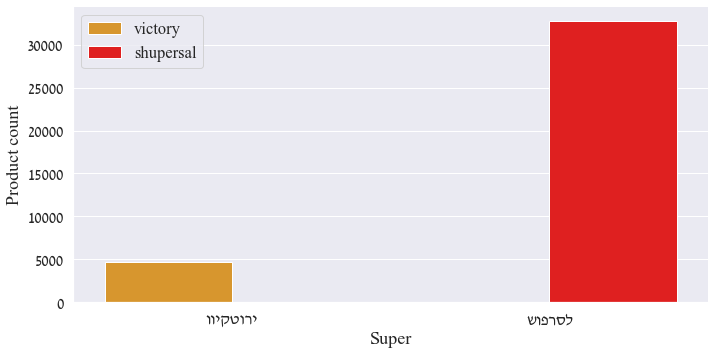

In [93]:
sns.set(font_scale = 1.5)
mpl.rcParams['font.family'] = 'david'
g = sns.catplot(
    x='super', 
    data=df_union,
    kind='count', 
    hue='super',
    palette=["#F39C12", "red"], 
    height=5, 
    aspect=2,
    legend=False,
    ).set_axis_labels('Super', 'Product count')
g.ax.legend(labels=['victory','shupersal'])

ניתן לראות בבירור שלשופרסל כמות מוצרים רבה יותר. 

In [94]:
df_union.describe(include="all")

super     catgory               product suplier  sizes         price
count    37423       37379                 37423   34169  34441  37423.000000
unique       2         338                 37329    2573   7473           NaN
top     שופרסל  טיפוח טבעי  עגבניות מרוסקות יכין  שופרסל     יח           NaN
freq     32777        1081                     2    2297   1124           NaN
mean       NaN         NaN                   NaN     NaN    NaN    215.723567
std        NaN         NaN                   NaN     NaN    NaN    650.901658
min        NaN         NaN                   NaN     NaN    NaN      1.000000
25%        NaN         NaN                   NaN     NaN    NaN     13.900000
50%        NaN         NaN                   NaN     NaN    NaN     29.900000
75%        NaN         NaN                   NaN     NaN    NaN    119.000000
max        NaN         NaN                   NaN     NaN    NaN  19990.000000

<b><u> :טיפול בכפילויות </b></u> 

לאחר שביצענו שלב זה עבור כל טבלה בנפרד נוודא שלא קיימים כפילויות נוספות 

In [95]:
df_union.duplicated().sum() # נקבל 0 כצפוי 

0

In [96]:
df_union['product'].duplicated().sum()

94

נזכיר שעבור שופרסל קיבלנו 12639 כפילויות לפי שם המוצר. 
המשמעות היא שקיימים 94 מוצרים בלבד בעלי שם זהה בין וויקטורי ושופרסל. 
הדבר נובע ככל הנראה לאור העובדה שבשם המוצר עבור הטבלה של וויקטורי נכלל גם הספק 

<b><u> טיפול בערכים חסרים 

לאור העובדה שעבור פירות וירקות לדוגמא לא תמיד נקבל את שם הספק לא נרצה למחוק את השורות בהן ערכים חסרים. 

במקום זאת נמלא אותם באופן שמי שיבהיר לנו שהערך חסר. 

כמו כן את עמודת הגודל בכוונתי לחלק למס' עמודות: מס' יחידות, נפח/משקל ויחידת מידה. לאחר  שנבצע זאת נחזור לשלב זה עבור עמודות אלה.

כרגע נתמקד בעמודת הספק 

In [97]:
df_union.suplier=df_union.suplier.fillna("unknown")

In [98]:
df_union.suplier.nunique()

2574

In [99]:
for x in df_union.suplier.unique():
    print(x)

אנג'ל
ברמן
גרין לייט
דגנית עין בר
לחם הארץ
בונז'ור
אחדות
מאפיית אריאל
מאפיית ודש
מעדני תנעמי
פיתה אקספרס
אנרג'י
אסם
unknown
זן בר
מנה
נסטלה
ריל פודס
אבאל
מאסטר שף
וילי פוד
פתית
א.אדמה
חסלט
מרינה
שטראוס
פיצוחי חממה
שקדיה
ששון הקולה
דין שיווק
מימונס
קליית גת
לברלנד קראנץ'
מיה
טרה
יטבתה
משק צוריאל
תנובה
אוטלי
אלפרו
ויטריז
פרימונה
תנובה אלטרנטיב
סקי
גד
פיראוס
גאיה
ויולייף
בייבי בל
גוש חלב
גלבוע
השף הלבן
יורו
כפיר
נעם
עמק
ריץ'
הגבינות של נני
הנרי ויליך
מון בלאן
סוניון
נטו
זנטי
צבר
סיימן גבינות
החתול המחייך
לוואש קירי
נפוליאון
ארלה
סימפוניה
פילדלפיה
דנונה
מולר
יופלה
פרילי
גמדים
המחלבה
חלב הארץ
עדן קינוחים
יולו
מוו
מילקי
ספלנדיד
קרלו
באדי
אדום אדום
נחמיה לחוביץ
עטרה
שאטובריאן
מאסטרפוד
דלידג
קראון פיש
טעמי אסיה
זוגלובק
טירת צבי
יחיעם
מעדני הטלה
עוף ירושלים מהדרין
אלוויר
וליו
לורפק
פרזידנט
בלובנד
מזולה
שמרית
אחלה
זהבי
תבליני ביטון יוחאי
סבא חביב
עללחם
פסטה נונה
פסטה ריקו
ליב
מ. לסר
וגאנץ
טופוטי
כפרי בריא
משק ויילר
אחוה
מסדם
אל פסטור
גבינות הכפר
מחלבת המושבה
בלדי
אל גאוצ'ו
בלאק אנגוס
עוף טוב
שופ

APPLE
Amazon
ARTOS
Google
PANASONIC
ANKER
MIRACASE
BOSE
Herman Kardon
Tech21
DOME
LEXUS
Audio Pro
SELMOR
gplus
BENATON
JAMO
JANANA
Klipsch
MONSTER
GPT
זרועות ברקן
BOOSTER
DRAGON
POLK AUDIO
EPSON
Epson
SMART TAB
BEATS
PURE CINEMA
SPORT PRO
OMEGA
NOVOGO
SJCAM
TWS
PHILIPS
URBANEARS
anker
PIONEER
Gplus
נינטדו
LENOVO
ASUS
DELL
XBOX
SENSE
AOC
ACER
XTRIKE ME
MARVO
SPARKFOX
PS4
HP
THRUSTMASTER
RAZER
AIRXPRO
PLAYSEAT
CANON
SILVER LINE
LOGITECH
Rapoo
BPOWER
TELTONIKA
SOL
VALUE PRO
TECH21
SANDISK
GOPRO
HAMA
VALUE
FALCON
WHIRLPOOL
BOSCH
AEG
WHIRLPOO
INDESIT
HOOVER
SUZUKI
MIDEA
LENCO
LUXOR
SERVICE
AMBASSADOR
MAGIC
זק"ש
GOLD LINE
TEFAL
MORPHY RICHARDS
HEMILTON
RUSSEL HOBBS
HAMILTON BEACH
CROWN
SHARK
DYSON
HIZERO
ROBOROCK
VIOMI
BISSELL
VAX
DREAME
KARCHER
LEIFHEIT
ROIDMI
BISSEL
Fakir
FAKIR
UFESA
MY CASA
LAVOR
Lavor
TOPSON
MATRIX
CAMP AND GO
CAMP IN
venta
אמגזית
גלאור
AFLAMO
SAGA
TORNADO
GP
סמיקום
vtech
Smartmi
SEMICON
ECO
NORTHER
Westinghouse
KRAUSS
SOEHNLE
WESTINGHOUSE
Babyliss
BRAUN
BABYLISS
REMINGT

אפקטבעי
ארביטאל
IF YOU CARE
ארגו
שרהלה
קיטו ציפ
אביב
אמארה
שקוף שזה טבעי
חקלאות חרוד
דר צוף
לאטקופוד
B&D
טבע מהדרין
ביו איטליה
דניקולה
דה לה נונה
ROLAND
GOODAY
רמירז
אסאדיה
א
ONE TRIBE
משק אחיה
מזטי
אפלסנקס
דורסט סיריאל
סוליגרנו
ממה חטיפים
פת במלח
הום מייד
קינג דיויד
נוטריברייק
גנדולה
תופינית
ויגו
פנדה
ויואני
סטלה
איטסיין
ג'לונים
ביאובון
בית השקד
סופר פוג'יו
גו אורגניק
ויוה סוי
ויטאסי
איזולה
קשת
גרין קוקו
פוקו
COCO WAY
V8
גרין פילד
יולה
גאורגיה נטורל
גרופר
טולסי
הייר ליווינג
עדנים
דקסר
אינקה
לרוקס
אווה קפה
מאונט האגן
לוואליה
אופה 1997
פרח
אביב אורגניק
מאפיה מרחבית
לחמנו
חוות הבופאלו
מחלבת טל
מחלבת גלילי
סום
yoridge
ONLY
ניה
מורינגה
משק גאיה
מאמא קיו
ויגנס צויס
פלנטי
ברילי
מוטי שף
קציצות
פסטה איטליאנה
נאטורזה
מנקאי
סימפלי גוד
שטמפר
ביכורי הפשתן
אינסטנבול אפויה
גלעם
שי מן הטבע
פרי 100%
סנקסו
סימפלי 7
בטר פוד
פנה סטרו
סמוז
גולון
גלוטרי
DATE
חופשי
סקיני
תמרי
משובח
נטורל קייקס
קיטו
טבעול ללא גלוטן
פנגיאה
רפאלס
סוכרה דיאט
הרמזית
מתוק וקל
טוראס
עמק חפר
סטרילי
אקופרנד
אקובר
אופטי סייף
אוטריוין

In [100]:
df_union.describe(include="all")

super     catgory               product  suplier  sizes         price
count    37423       37379                 37423    37423  34441  37423.000000
unique       2         338                 37329     2574   7473           NaN
top     שופרסל  טיפוח טבעי  עגבניות מרוסקות יכין  unknown     יח           NaN
freq     32777        1081                     2     3254   1124           NaN
mean       NaN         NaN                   NaN      NaN    NaN    215.723567
std        NaN         NaN                   NaN      NaN    NaN    650.901658
min        NaN         NaN                   NaN      NaN    NaN      1.000000
25%        NaN         NaN                   NaN      NaN    NaN     13.900000
50%        NaN         NaN                   NaN      NaN    NaN     29.900000
75%        NaN         NaN                   NaN      NaN    NaN    119.000000
max        NaN         NaN                   NaN      NaN    NaN  19990.000000

In [101]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37423 entries, 0 to 37422
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    37423 non-null  object 
 1   catgory  37379 non-null  object 
 2   product  37423 non-null  object 
 3   suplier  37423 non-null  object 
 4   sizes    34441 non-null  object 
 5   price    37423 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


<b>  כעת אטפל בעמודת הגודל - <u>שלב המרת נתונים</u></b> 

In [102]:
df_union.sizes.nunique()

7473

In [103]:
for x in df_union.sizes.unique():
    print(x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
500 גרם, כ- 3-5 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 5 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 3-4 יח'
500 גרם כ- 2-3 יח'
כ-1.3 ק"ג
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
400 גרם
450 גרם
2
500 גרם, כ-3-4 יח'
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ - 1 יח'
500 גרם, כ- 2-4 יח'
330 גרם
22x4 גרם
40.5 גרם
2 ליטר
1 ליטר
1.5 ליטר
800 מ"ל
250 מ"ל
225x8 מ"ל
225 מ"ל
350 מ"ל
230 מ"ל
340 מ"ל
250x3 מ"ל
236 מ"ל
125 גרם
139 גרם
375 גרם
225 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
8 יח' - 120 גרם
170 גרם
220 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
150 מ"ל
150x8 גרם
130 גרם
200 מ"ל
3 ליטר
58x6 גרם
500 מ"ל
108x8 גרם
267 גרם
107x8 גרם
106x8 גרם
850 גרם
750 מ"

80 שקיקים
1 יחידה
37.5 גרם
25 * 1.5 גרם
25 שק * 1.5 גרם
25 שקיקים*1.5 גר
25 שק' X 1.5 גרם
25 שקיקים
1.5 גרם X 25 שק
25 שקיות *1.5גרם
25 * 1.50 גרם
1.5 * 25 שקיקים
20 שקיקים
25 שקיקים * 1.8ג
25 שקיקים * 2גרם
38 גרם
25 שקיקים * 2.5ג
25 שקיקים * 3 גר
25 שקיקים * 2.7ג
25 שקיקים * 2.2ג
25 שק' X 2.2 גרם
25 שקיות * 3 גרם
50 שק * 1.5 גרם
50שקיקים * 1.5ג
20 שקיקים * 1גרם
20 * 2.5 גרם
18 שק' * 2.5 גרם
18 שקיקים * 2.5ג
90 שקיות
90 שק'
10 יח'. 50 גרם
10 יח'. 58 גרם
10 יח'. 52 גרם
10 יח'.  53 גרם
10 יח'.  54 גרם
50 גרפ
53 גרם
52 גרם
186 גרם
50 גרם,
40 יחידות
128 גרם
405 גרם
10 יח'
10 חפיסות
10יח
חפ
יח'
חפיסה
*
50 יחידות
28 יחידות
120 יחידות
560גרם
572גרם
644גרם
1.5 קג
2.5קג
1.5ק"ג
125גרם X 3 יחי'
450  גרם
1קג יח
נתח אחד
לפי משקל
6 פילה דג
קפוא
650גרם
600 גרם\n
640גרם
840
840גרם
400 גרם )5 יח'(
400 גרם (4 יח')
400 גרם (5 יח')
400גר'
400 גרם )4 יח'(
500 גרם )9 יח'(
440גרם
500 גרם (9 יח')
400 גרם )16יח(
320 גרם,
1קג
400גרם )8יח'(
400 גרם,
360גרם
800 גרם,
800 גרם )4 יח(
700 גרם )40 יח'(
800 גרם )12 יח'

2.86 ק"ג
1.42 ק"ג
1.43 ק"ג
1.4 קג
8 * 85 גרם
10 ק"ג
6  ליטר
425גרם
17.7 מ"ל
HDV10-POR
HDV7-POR
PQ-752CH
KD-55XH9505
KD-49XH8096
LE42A7200
LE50D500
LE75D9000
QE65Q75U
LE-70Q10
70UP77006LB
PQ-65CH
PQ-55CH
PQ-552CH
P75USXL
T75U7950EE
UE70AU7172
UE75TU8002
UE75TU7102
QE55Q67TAU
UE60AU8072
P55US9G
UE65AU7192
LED P65US9G
P32HXL
P39DSG
P42FSG
LE58A8000
50UP78006LB
65UP75006LF
55NANO79
LE65D400
LE55D600
link 20
AIO Bar 2.0
JBL Charge 4
HDS-220
DHTS316BKE2
BL-370
NE-32FLED
L55M5-5ASP
L43M5-5ASP
"Mi TV P1 55
P39DG
Xiaomi L65M5-5A
טלוויזיה 89401
L65M5-5ASP
LE65D500
UE50AU8072
שחור UE55AU7100
ATVGL390ST2
HATV-65QL200
KD-55X85JAEP
ATVGL491ST2
HATV-65AA100
HATV-58AA100
HATV-65LD300
LD 8230
ATVGL654ST2
HATV-70AA100
HATV-75AA100
HATV-75QL200
ATVGL554ST2
QE65Q67AAU
KD-65X81JAEP
KD-55X81JAEP
XR-75X90JAEP
XR-65X90JAEP
XR-55X90JAEP
KD-75X85JAEP
75 XIAOMI
HOMEPOD MINI WHI
DOT 4 WHITE
DOT 4 BLUE
DOT 4 CHARCOAL
ECHO 4 BLACK
AR-1108
NEST AUDIO CHALC
ECHO 4 WHITE
Echo Show 8 Sand
RD-150
Mi Portable BT
RX-D55
o

s5210
654.01
HAHC-1300B
C4500005
bt3216
Ultimate R7
9380cc
HC5150
TP-300
XR1570
PG4000
bt3221
AR-HC2388
fxf
FX7880E
Absolute
XErgo
RFC-101
HAHC-1130
PG3000
MB4000
625.01
HAHC-1170
MC-2102
3D MC-9601
MC-609
MC-506A
MC-8015
MC-667
MC-3703
MC-2606M
MC-3803A
MC-2309
חשמלי
MC-2316A
MC-79900
MC-5310
MC-7380
MC-006
MC-8005
MC-4801
MC-6701
MC-6080
פילוט
10W, SAFETY
12W
SAFETY
8W, SAFETY
A60-15W-D-10-BND
A60-15W-W-10-BND
A60-10W-W-9-BND
.DL
WW
23W
E27
safety
E27WW
DL
A60-10W-D-9-BND
עץ+לבן מרובע
SM-6652/1W
SM-B8806/1W
SM-JB2010-01W
SM-JB2003-01W
עץ+לבן עגול
ניקל+לבן עגול
ניקל+לבן מרובע
עץ+אפור
30 נורות LED
SE932
EF-906
TP-325
OM-L120-2X3.7V
OM-L60-3.7V
OM-SD1-220
OM-GS-16-SA
תאורת חירום EF-1
EF-996
OM-LN90-2X3.7V
מודל L
DB181-B-GL
כולל סוללה
T4-CASE25W-BT-Y
DB181-B-WH
מודל XL
20 לדים
WK-1x50W-TP-CW-Y
WF-HOMECAM-2MP
DB181-B1-GR
DB181-B1-BL
60W
40W
MORE27WH
SM-2044/36CT
OM-CLEO-E27-BK
מארז 3
OM-2028 R
OM-2425 BK
OM-2425 BL
OM-2028 BL
OM-FLAM-BK
50W
OM-FLAM-WH
SM-168W/50CT
OM-CLEO-E27-WH
Smart  Bu

Lattissima ONE
47671
GHKG8051
PILKS-3703
PILKS1707
ATL-009B
ATL-2700W
PK1775
ATL-2700B
ATL-741S
ATL-1503
HEM189
5KEK1222EOB
KN890
ATL-68
HYK-1738A
ATL-009W
23210-70
23211-70
ATL-746
ATL-758W
5240
5230
ATL-125
ATL-741R
דגם KC140B
דגם18
ATL-758R
SBT-5
SE499
KORKMAZ
ATL-136
ATL-1901
HD9350
ATL-88
EF-980W
KN895A
ATL-114
TP-810
ATL-009C
SE-91
0.6 ליטר
נירוסטה 516
SBT-6
21670-70
KI730D30
SV-975BD
ATL-82
SE48
SE826
5KEK1222EER
MX-KU1816-WH
KN-460B
KN895C
25070-70
WKWK-695WH
SE493
KN895B
HYK-1722B
104414
SBT-3
HA7616
WKWK-695BK
SBT-4
SE-926
WKWK-695SV
קומקום טומביק
21672-70
43986
מקינטה BIALETTI
43985
SV-790
פרקולטור זכ' 350
Rainbow
350מ"ל
crk008
ATL-81
ATL-758C
ATL-741C
ATL-1909B
ATL-176
ATL-188
HEM160
HEM187
סט2 קומקומים
162520
TP-753C
HA7910
WKWKH-148RD
WKWKH-148BK
WKWKH-148WH
WKWK-512BK
BUENO
EF-539A
EF-748F
EF-750A
EF-982W
EF-980B
EF-984
EF-936
EF-1026
קומקום EF-1040C
טרמוס EF-544
קומקום EF-1040N
קומקום EF-1040W
EN267
AR-C91A
TP-808
ATL-5010
AR-C01A
AR-C50A
VCF125
AR-C50B
E61
VCF126X
EC78

65/60/24 ס"מ
42/6.5 ס"מ
45/34/7 ס"מ
25/19/14 ס"מ
61/53/20 ס"מ
41/19/10 ס"מ
50*30 ס"מ
50X70 ס"מ
200X220 ס"מ
זוגי 220*200ס"מ
יחיד 150*200ס"מ
יחיד 150X200 ס"מ
יחיד  150*200ס"מ
150*200 ס"מ
220*200 ס"מ
זוגית220*200ס"מ
זוגית 220*200ס"מ
160X130ס"מ
130*160ס"מ
פיקה יחיד
קונגו
דגם PAINT
יותם
KIDS18
ענבר
דגם STUDENT
Dream
דגם TED
יערה
שולחן כתיבה ברי
סנייק
רעות
שלומית
BLOCK
כולל מגירה
שולחן כתיבה ראם
סיפריה לונה
הרכב חינם
MSH-1-36
פרלה
MSH-1-38
5 מדפים
שולחן כתיבה כנרת
LABRAN לבן-אגוז
אורנה
דגם זוהר
ספריה בר
DE1094
לונדון
MSH-1-13
נעמה
יהונתן
MSH-1-35
סיפרייה שרון
שולחן מחשב
180ש"ח
200ס"מ
סיפריה ליאנה
שני
אלון
100 ס"מ
120ס"מ
80ס"מ
100ס"מ
11422
11417
12082
MSH-1-37
MSH-1-51
MSH-5-26
יאיר
12 בקבוקים
לירון
6  מגירות
3 מדפים
נירית
גיא
286062
286065
286066
318768
321603
321604
321605
323704
323963
263875
263095
263666
291781
291782
298944
298215
298214
עץ מלא
4 מגירות
ניידת
מודולארית
15 מגירות
18 מגירות
נייד
נעמי
30/100/76 ס"מ
קונסולה גל
298216
304498
318371
317465
318699
321164
321165
SHF-08722
צבע ש

Watch4 LTE 44
SM-R870, 44mm
46mm, SM-R890
Watch4  BT 42
Watch4  LTE 42
Watch4 LTE 40
Watch 3 SM-R850
SM-R850
41mm SM-R850
45mm SM-R845
SM-R840NZ
GPS Cellular
Series 6 GPS
GPS
44mm GPS
WATCH S6 40MM
S6 GPS
WATCH S7 41MM
WATCH S7 45MM
WATCH SE 40MM
WATCH SE 44MM
SAMSUNG WATCH AC
Forerunner 945
Fenix 6S
7.5 כ"ס
YORK אוסטין
אליפטיקל 902
ספה 1077
run4300
T-101
F1000
23 ק"ג
UPRIGHT
YORK 686
HA170C
STINGRAY
SFELLIP-1
הליכון Supreme
leader450
510U
YORK רנר ג'ל
HA170B
YORK INTENSE
Legacy
Total Body
71 - BODY SOLID
York BX200
Schwinn Rower
21 - BODY SOLID
Max Trainer M3
Max Trainer M6
PR1000
HA170A
אופני כושר UPRIG
SCHWINN 510R
AD2
Target Ace 2100
YORK מאסטר ג'ל
הליכון Record Pr
ספת לחיצה 1076
ספת כושר  797
ספת כושר 340
Conan Pro
DOUBLE WHEEL
9101
EXPO
אופני כושר Plus
M1 Spinning Bike
AH2006
מתנה בקבוק נייק
LIFEGEAR 20065
AMERICAN SPORT
FLEX
S2
2108YQ
X101
GFMS1
YORK סולו
Schwinn 570U
אופני כושר X-BIK
2300A
MSH-3-3
11116203
מתנה:בקבוק נייק
YORK XFIT
Schwinn 570R
H681
2300B
2011B
אליפטיקל NEW  BI

דלי מלבני לצבע "
רולר פוקסיה "9
סט מיני ספוג חמס
סט מיני רוליפיקX
מלצ' גומי מקצועי
רולר "הפנתר"
מברשת סולו
מברשת צביעה פוקס
מברשת בומבה פוקס
מברשת סיוד 7X17
רולר בולרו
פד גלגלים לפינות
סט שרוול מיני ספ
סט שרוול מיני פס
מברשת בומבה גרין
פדי-קיר גדול לצב
פדי-קיר בינוני ל
מברשת סיוד אקסטר
רולר זברה פרלון
מגש לצבע "11 עם
רולר זברה מיקרוס
רולר לוטקס
זברה רולר פרלון
רולר פרלון פס צה
שרוול לרולר בולר
מלצ´גומי מקצועי
רולר זברה סופרלו
רולר אסטרה פס צה
רולר זברה אומגה
סט מיני משולב ספ
רולר זברה פס צהו
רולר זברה טופטקס
טרפנטין
רולר מיני בולרו
רולר אסטרה "9
רולר אלפא "9
רולר טפטים
ספוג ויסקוזה
כף זוית
מתאם לשפכטל
3 מברשות ספוג
סרגל טרפז
לוח שפשוף
מלצ' נירוסטה
סרבל צביעה XL
סרבל צביעה  XXL
דלי "12
ספוג הידרו
דלי "5
מלצ´ נירוסטה
סט 4 שפכטל
מלצ' שפיץ
רולר פלוק 25 סמ
עדין "7
מלצ' ספוג
מלצ´ סטוקו
מגרדת אקספרט
מלצ' עגול
שפכטל צבעים
מלצ' פלדה
מלצ´ פלדה
מלצ' פלסטיק
רולר שאגי
מלצ' רונדו
מלצ' גומי
שפכטל כרום
רולר  פרלון
רולר פס כחול
רולר פרלון
משקפי מגן
משייפת קטנה
רשת סינון לצבע
מתקן לטש
דלי "10
סרגל מגן
מ

100 יחידות M
100 יחידות L
100 יחידות XL
100 יחידות S
איזולה ארוכה 2/6
3*40 יח
30גר
50 מגבונים
80 מל
סמארט.צמיד מגן מ
סמארט.טבליות מיל
סמארט.צמיד ילדים
ברן שילד 2 פדים
ברן שילד 10 שקיק
17 יח'
8מ"ל
48 יח'
*5
*10
200 יח'
30יח
1 מטר
פלסטר בד בגליל 1
פלסטר לאף 10 יחי
15 יח
*12
מרפד גזה 10ס"מ 1
מרפד גזה 5 ס"מ 1
מרפד גזה 7 ס"מ 1
10X23 פד דביק סט
פד לכוויות סטריל
10 ס"מ
801  יחידה
7.5ס"מ
אגד אלסטי וובטקס
80 ג"ר
100גר
24 יח'
25 מל
65 יחידות
12 פתילות
72 דפים
6 עדשות בקופסה
355 מ"ל *3
30 אמפולות
300X3 מ"ל
30 בקבוקונים
360X2 מ"ל
360*3 מ"ל
שלישיה
יחידה*24
20 מגבונים
50צ"ל
M  יחידה
45E L  יחידה
34XL  יחידה
35C L  יחידה
35C XL  יחידה
35XL  יחידה
45XL  יחידה
45C XL  יחידה
397  זוג
49L  יחידה
יחידה XL
יחידה S-L
39-42  זוג
3672  יחידה
3675  יחידה
3444  יחידה
364XL  יחידה
364S-L  זוג
3666  זוג
369XL  יחידה
3641  יחידה
363  זוג
3623  יחידה
365S-L  זוג
3655  יחידה
320  זוג
3667  יחידה
3611  זוג
3674  יחידה
377-40  זוג
LF374 O
LF370 O
LF377 M
LF371 O
LF373 O
370  זוג
372  זוג
374  זוג
371  זוג
302M  זוג
30

# עבודה על העתק של הטבלה 

In [104]:
df1=df_union.copy()

In [105]:
df1.to_excel("df1.xlsx")

In [106]:
df1=pd.DataFrame({'super':df1['super'],'catgory':df1['catgory'],'product':df1['product'],'suplier':df1['suplier'],'price':df1['price'],'sizes':df1['sizes']})

In [107]:
df1.describe(include='all')

super     catgory               product  suplier         price  sizes
count    37423       37379                 37423    37423  37423.000000  34441
unique       2         338                 37329     2574           NaN   7473
top     שופרסל  טיפוח טבעי  עגבניות מרוסקות יכין  unknown           NaN     יח
freq     32777        1081                     2     3254           NaN   1124
mean       NaN         NaN                   NaN      NaN    215.723567    NaN
std        NaN         NaN                   NaN      NaN    650.901658    NaN
min        NaN         NaN                   NaN      NaN      1.000000    NaN
25%        NaN         NaN                   NaN      NaN     13.900000    NaN
50%        NaN         NaN                   NaN      NaN     29.900000    NaN
75%        NaN         NaN                   NaN      NaN    119.000000    NaN
max        NaN         NaN                   NaN      NaN  19990.000000    NaN

In [108]:
df1['sizes']=df1['sizes'].fillna('1')

In [109]:
for x in df1.sizes.unique():
    print(x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
500 גרם, כ- 3-5 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 5 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 3-4 יח'
500 גרם כ- 2-3 יח'
כ-1.3 ק"ג
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
400 גרם
450 גרם
2
500 גרם, כ-3-4 יח'
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ - 1 יח'
500 גרם, כ- 2-4 יח'
330 גרם
22x4 גרם
40.5 גרם
2 ליטר
1 ליטר
1.5 ליטר
800 מ"ל
250 מ"ל
225x8 מ"ל
225 מ"ל
350 מ"ל
230 מ"ל
340 מ"ל
250x3 מ"ל
236 מ"ל
125 גרם
139 גרם
375 גרם
225 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
8 יח' - 120 גרם
170 גרם
220 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
150 מ"ל
150x8 גרם
130 גרם
200 מ"ל
3 ליטר
58x6 גרם
500 מ"ל
108x8 גרם
267 גרם
107x8 גרם
106x8 גרם
850 גרם
750 מ"

יחידות
יחי
3 חידות
זוג
*2
מארז זוג
2 יחידה
2 יח'
בנות
260 מ"ל
270 מ"ל
160 מ"ל
230מ"ל
GB-6800
GB567
GB-8398
GB-602
GB-35
70 מל
390 מ"ל
680 מ"ל
10גרם
192 מל
180 מ"ל
בהיר
אוד
75 מל
250 מל
145 מ"ל
מ"ל 75
120 מ"ל
580  גרם
150 מ''ל
500 מ''ל
500  מ"ל
4.5 גרם
מארז
250 מ''ל
200 מ''ל
85 מ"ל
251 מ"ל
223 מ"ל
85 מ''ל
110 מ"ל
75מ"ל
400 יחידות
60 יחידות
3 * 50 יחידות
3 * 60 יחידות
160 יחידות
36 יחידות
750מ"ל
250 יחידות
70 יחידות
2יח' X 750 מ''ל
946 מל
1250 מ"ל
3*50 גרם
3*50גרם
3 * 55 גרם
3*55 גרם
16 טבליות
4 טבליות
7 מ"ל
כולל מילוי 20מ"ל
20 יח'
80 יחידות
50 טבליות
63 יחידות
84 יחידות
30 טבליות
120 טבליות
37 טבליות
48 טבליות
70 טבליות
515 מל
780 מ"ל
1.6ליטר
27 יחידות
22 יחידות
55 יחידות
40 יח
56 יחידות
5 ליטר
2.48 ליטר
7 ק"ג
5ק"ג
4 ק"ג
3.25 ק"ג
960 מל
897 מ"ל
1.8 ליטר
940 מ"ל
9 יחידות
100דפים
10+10 יחידות
10 דפים
40 יח'
15 יח'
1 יח
2 * 10 יחידות
50 * 3 במארז
48 יחידות
מארז 2 יחידות
100 יח'
12 ליטר
32 יחידות
6 גלילים
6 גלילים כפולים
75 דפים
64 יחידות
63 דפים
5 * 100 יחידות
270 יחידות
10 * 10 יחידות
3 *

SET655
SU826A
CE278A
CL41
CLI526Y
CLI551XLGY
CLI526C
CLI526M
CF400X
CF400A
CF401A
CF403A
CF226A
CF403X
CF402X
CF401X
CF543A
CF541A
CF540A
CF280A
SU705A
ARMOR
GPDRA-SP9
GPDRA-SP21
GPDRA-PROMIC90
GPDRA-PROMIC20
151SE WH
SL-111
ארגנומיות עם מיק
Logitech
X1800S E.H
GPDRA-WCAM
GPDRA-WCAM2K
2K Pan & Tilt לב
Fire TV Stick 4K
Fire TV Cube
Extender Pro
Mi BOX S
4A EU
Mi WiFi  AC1200
RUT950
Mi Router 4C
2A W15
אפור
ורוד
חום
X/Xs אד
X/Xs אפור
X/Xs חום
X/Xs
אדום
Galaxy S20 Ultra
iP XR
IP11 PRO Max
IP11
IP12 6.1
6.7
IP12 5.4
iP Xs Max
גלקסי 9 אפור
IP12 6.7
S20 Plus
S20
Tech21
iPX/Xs
X/Xs  שחור
X/Xs  אפור
X/Xs  חום
X/Xs  ורוד
NOTE 10 PLUS
IP11 Pro
Galaxy S10+
00
כסף
NOTE 10
Pure Shimmer I
IP11 pro
TYPE
VALUE PRO
שחור 1.8 מטר
1.8 מטר
TO USB-C
apple
C TO L 1.2
SSD PLUS 1T
כבל  C TO C 1.2
MINF1800
מעמד הטענה
שחור 1.2 מטר
MFI TO USB-A
STDRASCC
Dashboard
Magnetic Air Ven
Magnetic Dashboa
Magnetic Premium
Magnetic
Magnetic Mini Da
Magnetic Telesco
Bike
Oculuce Quest 2
MQiWM605
wifi לרכב
MQiWM505
TRACKER 3

SE819
MX-T2001A-T-BK
MX-T2001-T-WH
BT-258B
SE-925
SL-1217
SE-356
SE417
222003
222016
טוסטר EF-672
MX-T2001-T-BK
MX-T2001A-T-WH
WKTTA-1018
טוסטר נירוסטה מפ
MT-RS2L17W2 WHIT
222018
WKTTB-857RD
WKTTB-857BK
WKTTB-809RD
WKTTB-857WH
WKTTB-809BK
WKTTB-809WH
WKTT-802WH
STELIO
LONO
KMX750 1000W
KVL4100s
KM287
HM865D
ATL-205
אדום KSM45
ATL-220
48956
HABT-3110
48255
SE725
HABT-2630W
HM3101B1
5 ל' PILM1345
KM241
HEM2120
SE-86
SE479
KM890
ATL-259
BT-2787
HABT-2630R
BT-1502 350W
48920
48922
MUM4427
KM708
BT-7366 300W
48258
MUM4825
מיקסר קערה BENAT
SE770
MUM48W1
JA302BL
JA302GR
JA302IV
JA302PK
מיקסר JA302BK 70
BT-1506
HM1070
ATL-287A
HABT-2650W
AHY-205(SILVER)
AHY-262(RED) מיק
AHY-262(SILVER)
AHY-262(ROSE GOL
AHY-267B (RED) מ
1500W
AHY-266 (BLACK)
400520
QA150127
WKHM-250RD
EF-1042W
EF-1042B
EF-502A
מיקסר EF-502
BN653
BL682
CB103
E450CH
HABT-7002
FP3131WH
48439
HEM215
FP247127
48434
HR7310
24730-56
24731-56
DPA-141
FP3132BK
ME682827
FDP-303SI
25182-56
SE-8400
SE346
70825-IS
CRC500
FP3010
HR-3705/00
H

מקלח יד 5 מצבים
מערכת רחצה 5 מצב
אמריקאי ניק
BTH-08793
50X70ס"מ
ונטיל לכיור
י
מתלה למקלח
מערכת שטיפה
מקלח יד
מערכת רחצה
סירופלקס מסעף
ראש שטיפה אדל
ראש שטיפה סיוון
ראש שטיפה ליטל
סירופלקס מפסק
10 רצועות
805388H
801823-05
מבריק
מט
ניקל מט
1.8X1.8סמ
180*180
מוט לוילון פינתי
802168
זרוע נירוסטה לתי
מקלח יד מצב אחד
ראש מקלחת מרובע
802011
801760
801727
סירופלקס 2506/5
ברז פרח DUCK
5 מצבים אמילי
מערכת רחצה מצב א
ברז אמבט MARINA
ראש מקלחת עגול י
צינור לברז נשלף
סירופלקס 2507 בי
2688030
סירופלקס ניקל אר
נירוסטה אושר
מקלח יד 3 מצבים
2688060
ברז קיר ברבור 86
ברז פרח ברבור SW
מערכת תליה למקלח
מערכת שטיפה היגי
1.50 מ
ערכת פינוק שירז
עגול נירוסטה
ראש מקלחת עגול א
ראש שטיפה היגיינ
סירופלקס 20/ 248
ראש מקלחת עגול נ
זרוע נירוסטה עגו
מתלה למקלח יד מת
מזלף לברז נשלף ד
מחזיק נייר טואלט
צינור ספירלה קפי
4162512
1.5 מטר
ראש מקלחת עגול
ברז אמבט PATO
צינור אמבט 1.5 מ
מתלה מגבות בודד
612224
801419-1H
305344H
802014H
188794
802129H
304567H
801819H
304641
302869
305368H
801911H
303252
140866
304566H
801697-01
3

TRX
mat6mm
tera band
KSPORT
HA292F
7/10/1600מ"מ
YH-2040000
HA961
HALS003-6
62X180 ס"מ
11115883
11115622
11115774
HA200A
203S
173X61X0.6סמ
11115773
0.5 קג
EQUAL
11115863
gom100lb
11116070
HEAD-HA794
AH2006-1580000
11116069
bobo home
HA793
mat6tpe
AH2006-680000
11115862
HA957
HAPL001
11116072
11116073
11116075
11116074
11116077
11116079
11116080
11116078
11116081
11116096
11115775
11115864
11115317
דגם HEAD-HA791
K-Sport
S077
50 ק"ג
30 ק"ג
11115492
לידיים ולחזה
11115890
11115624
11115308
11115762
HA278A-2KG
0.75קג
11116098
11115306
11116221
11115882
11116099
11116100
11115310
11115309
11115771
HA723-1K
11115493
11115385
11115895
HA278B-2KG
11115406
11115307
11115383
11115725
מהירות מקצועי
AH2006-1190000
0.5קג
11115779
HA278A-1KG
11115365
AH2006-121-70000
11115358
11115384
HA723-2K
11115743
TEO SPORT
11115639
11115424
11115536
11115861
11115534
11115784
11115403
11115644
AH2010-2
11115785
11115696
11115641
11115881
HA278B-1KG
11115522
11116150
11115823
HA723-3K
11115816
11115817
11115818


GHPM1005
GHPM08
GHM1345
28*28ס"מ
GFB-330
GFB 338
GHC-747
GHC-1404
רוח GCM-1218
GHT-331
GSH-1454
GHC-563
GHT-503
GH-100GR
GH-100BL
140X200 ס"מ
זוגי  160X200
זוגי 1.60
60X40 ס"מ
50*80 ס"מ
220X200 ס"מ
5יח 30*30 ס"מ
S-M
135*145ס"מ
זוגית 200X220ס"מ
64*44ס"מ
50*50 ס"מ
60X60 ס"מ
40X70 ס"מ
40*70 ס"מ
40X80 ס"מ
50X50X30 ס"מ
70X70X30 ס"מ
70X70X20 ס"מ
56/56/80
74/65/86 ס"מ
60/30/95 ס"מ
35/36/62
42/23/0.6
80*50ס"מ
50*50*30 ס"מ
40/48/60
51/30/80 ס"מ
4 קומות
3 מגשים
100/30/110 ס"מ
90/35/141 ס"מ
120/40/75 ס"מ
105 מ"ל
65 מ"ל
12 מ"ל
100מ"ל
67 מ"ל
45מ"ל
30  מ"ל
5 מ"ל
64 מ"ל
30 מ''ל
30מ"ל
63.72 גרם
116מ"ל
9מ"ל
6 מ"ל
קל.קונ.איירברש 0
5.6 מ"ל
14 מ"ל
8 גרם
8.2 מ"ל
213
302
מ"ל3.8
247
קל.ע.ע.קוויק.אינ
10.70 מ"ל
9.5 מ"ל
9.60 מ"ל
12.50 מ"ל
10מ"ל
קל.אייל.היי אימפ
16 גוונים
3.5 גרם
3.3 מ"ל
4.3 מ"ל
2.8 מ"ל
2 יח
7 גרם
קופסא
40 מ"ל
50 מל
70 מ''ל
50 מ''ל
100 מ''ל
115 מ"ל
33 מ"ל
60 מ''ל
75 מ''ל
*6
קל.מס.לחות ללילה
21 יח'
60 אמפולות
36ס"מ 14 אינץ
400  מ"ל
487 מ"ל
487
40 מ''ל
1 יח'
8 יח'
100 מל
125 מ''ל
48 מ"ל
3 * 80 יחי

In [110]:
df1['sizes'].nunique()

7473

נעשה סדר בעמודה על מנת לחסוך שגיאות בקריאת הדפוסים

In [111]:
i=0
for i in range (df1["sizes"].count()):
    df1["sizes"][i]=df1["sizes"][i].replace('כ',"")
    df1["sizes"][i]=df1["sizes"][i].replace('-'," ")
    df1["sizes"][i]=df1["sizes"][i].replace('*',"x")
    df1["sizes"][i]=df1["sizes"][i].replace(',',"")
    df1["sizes"][i]=df1["sizes"][i].replace('+',"")
    df1["sizes"][i]=df1["sizes"][i].replace('/',"x")

In [112]:
df1.sample(20)

super                        catgory  \
6820     שופרסל            לחם, לחמניות ופיתות   
4459   וויקטורי                           שמפו   
10356    שופרסל                        שימורים   
31122    שופרסל                     טיפוח טבעי   
32463    שופרסל                    תוספי תזונה   
9614     שופרסל                         גלידות   
36709    שופרסל  משקאות, גבינות וטופו תחליפיים   
30623    שופרסל                     טיפוח טבעי   
17546    שופרסל      ציוד הקפי למחשבים ומדפסות   
2166   וויקטורי                     מוצרי אפיה   
17905    שופרסל            כביסה ,ייבוש וגיהוץ   
2567   וויקטורי                         עוגיות   
1052   וויקטורי                  חמאה, מרגרינה   
9555     שופרסל                תחליפי בשר קפוא   
5639     שופרסל                    מדף הגבינות   
25904    שופרסל                      כלי עבודה   
11317    שופרסל            מוצרים לאפיה ובישול   
5385     שופרסל          יוגורט ומשקאות יוגורט   
8822     שופרסל    מוצרי בשר, עוף ודגים קפואים   
1827   וויקטורי                    שימורי טונה   

                                            product           suplier  \
6820                       פיתות ביס חיטה מלא 12יח'       פיתה אקספרס   
4459   שמפו למניעת קשקשים סופרים לחות הד אנד שולדרס     הד אנד שולדרס   
10356                         קוביות עגבניות שופרסל            שופרסל   
31122                      קרם חמאת קקאו למיצוק העו           פאלמר'ס   
32463                           סירופ לשיעול לילדים           גרינטוס   
9614                       גלידת שמנתעם וניל עוגיות       בן & ג'רי'ס   
36709                              משקה קוקוס שקדים    תנובה אלטרנטיב   
30623                              אנט מינרל וואן 3  לה רוש פוזה שמש.   
17546                      שחור SRSXB33B רמקול נייד           unknown   
2166             פודינג בטעם וניל לבן במיוחד מימונס            מימונס   
17905                                      מגהץ יבש         GOLD LINE   
2567                           עוגיות שוקוצ'יפס אסם               אסם   
1052                                חמאה מלוחה יורו              יורו   
9555                       נתחי סויה דמויי עוףטבעול             טבעול   
5639                                       קוטג' 5%            שטראוס   
25904             משור שולחן 250 מ"מ TC-TS 2025/1 U           EINHELL   
11317                              סוכר וניל שופרסל            שופרסל   
5385                          יוגורט עם אפרסק ומנגו             דנונה   
8822                               שניצל דק דק פריך          מאמא עוף   
1827            נתחי טונה בהירה בשמן-קנולה וילי פוד          וילי פוד   

         price           sizes  
6820     11.90         500 גרם  
4459     19.90         400 מ"ל  
10356     6.20         800 גרם  
31122    49.90         315 מ"ל  
32463    44.90         210 גרם  
9614     19.90         500 מ"ל  
36709    12.90          1 ליטר  
30623    66.75          30 מ"ל  
17546   579.00               1  
2166      5.90          80 גרם  
17905    89.00        ATL 729D  
2567     11.90         200 גרם  
1052     11.90         200 גרם  
9555     31.90         350 גרם  
5639      9.00         400 גרם  
25904  1290.00  TC TS 2025x1 U  
11317     2.80     10 x 10 גרם  
5385      5.90         250 גרם  
8822     39.90         700 גרם  
1827     21.90       160x4 גרם

In [113]:
mydf3=df1.copy() ## נעתיק את הטבלה לחסוך הרצות חוזרות - למקרה שנצטרך אותה שוב 

In [114]:
df1=mydf3.copy() # במידת הצורך יש לטעון את הטבלה כאן 

i'll divide the size column to 3 diffrent columns: 
1. units 
2. Vol_Wei - Volume / weight
3. UOM - Unit of measure

In [115]:
df1["units"]=1
df1["Vol_Wei"]=0
df1["UOM"]="NAN"

In [116]:
pat1= "גרם\d*"
pat2= 'מ"ל\d*'
pat3= 'ק"ג\d*'
pat4= "ליטר\d*"
pat5= "מחיר לפי משקל"
pat6= 'מ"ל\d*'



In [117]:
i=0
for x in df1.sizes:
    if(re.findall(pat1,x)):
        df1["UOM"][i]= 'גרם'
        i=i+1
        continue
    if(re.findall(pat2,x)):
        df1["UOM"][i]= 'מ"ל'
        i=i+1
        continue
    if(re.findall(pat3,x)):
        df1["UOM"][i]= 'ק"ג'
        df1["Vol_Wei"][i]=1
        i=i+1
        continue
    if(re.findall(pat4,x)):
        df1["UOM"][i]= 'ליטר'
        i=i+1
        continue
    if(re.findall(pat5,x)):
        df1["UOM"][i]= 'ק"ג'
        df1["Vol_Wei"][i]=1
        i=i+1
        continue
    if(re.findall(pat6,x)):
        df1["UOM"][i]= 'מ"ל'
        i=i+1
        continue
    i=i+1

In [118]:
df1.sample(15)

super              catgory                                 product  \
31706    שופרסל        אביזרים לשיער                        מסרק חום עם ידית   
24662    שופרסל         לקמפינג ולים                                   מחצלת   
28062    שופרסל  איפור פנים ואביזרים                          פודרה משזפת 30   
10745    שופרסל  מוצרי יסוד ותבלינים                       מלח הארץ גס צנצנת   
21911    שופרסל                מצעים   סט מצעים סאטן כותנה ליאור במבחר מידות   
1946   וויקטורי           דבש וסילאן  דבש טהור מפרחי בר בבקבוק לחיץ יד מרדכי   
15575    שופרסל        אביזרי ניקיון                   קיווי משחת נעליים חום   
31393    שופרסל           טיפוח טבעי                        תערובת ארומטרפית   
28751    שופרסל         איפור שפתיים                           שפתון כרום 60   
30533    שופרסל           טיפוח טבעי                       דנסי סולושנס שמפו   
27941    שופרסל  איפור פנים ואביזרים                איבן בטר קליניקל 28 מייק   
5806     שופרסל          מדף הגבינות                      גבינת חלומי פרוסות   
15802    שופרסל        חד פעמי ונרות                     קסרול קרם 10 יחידות   
310    וויקטורי          חלב ומשקאות                       חלב 3% בד"צ תנובה   
34500    שופרסל                גילוח                    ג'ל גילוח קרמה דליקט   

                  suplier   price      sizes  units  Vol_Wei   UOM  
31706              Be NOW    9.90      יחידה      1        0   NAN  
24662                כללי   99.00  270x270סמ      1        0   NAN  
28062             CATRICE   17.00      יחידה      1        0   NAN  
10745            מלח הארץ    7.20      1 ק"ג      1        1   ק"ג  
21911             unknown  219.00          1      1        0   NAN  
1946             יד מרדכי   33.90    650 גרם      1        0   גרם  
15575               קיווי    5.90     50 מ"ל      1        0   מ"ל  
31393           נילס יארד  125.90     10 מ"ל      1        0   מ"ל  
28751             CATRICE   24.00      יחידה      1        0   NAN  
30533           וישי שיער   51.00    250 מ"ל      1        0   מ"ל  
27941            CLINIQUE  156.00     30 מ"ל      1        0   מ"ל  
5806   אירו מחלבות אירופה   21.90    250 גרם      1        0   גרם  
15802              תבניכל   12.90   10יחידות      1        0   NAN  
310                 תנובה    8.91   1.5 ליטר      1        0  ליטר  
34500                קרמה   12.90    200 מ"ל      1        0   מ"ל

In [119]:
nums= "\d+"
words="\w[א-ת]+"
English="\w[A-Z]"
english="\w[a-z]"
signs="\W"

In [120]:
i=0 
for x in df1.sizes:
    n=re.findall(nums,x)
    w=re.findall(words,x)
    s=re.findall(signs,x)
    e=re.findall(english,x)
    E=re.findall(English,x)
    if ((len(n)==0) and (df1["UOM"][i]=="NAN")):
        df1["UOM"][i]="יחידה"
    if ((len(n)==1) and (df1["UOM"][i]=="NAN")and (len(e)==0) and (len(E)==0)): 
        if(int(n[0])<=1000):
            df1["units"][i]=int(n[0])
        df1["UOM"][i]="יחידה"
    if ((len(n)==1) and ((df1["UOM"][i]=="גרם")or (df1["UOM"][i]=="ליטר")or (df1["UOM"][i]=='ק"ג') or (df1["UOM"][i]=='מ"ל'))):
        df1["Vol_Wei"][i]=n[0]
    if ((len(n)==2) and ((df1["UOM"][i]=="גרם")or (df1["UOM"][i]=="ליטר")or (df1["UOM"][i]=='ק"ג') or (df1["UOM"][i]=='מ"ל'))):
        if (re.findall("(\d+\.\d*)",x)):
            df1["Vol_Wei"][i]=re.findall("(\d+\.\d*)",x)[0]
        else:
            df1["Vol_Wei"][i]=max(int(n[0]),int(n[1]))
            df1["units"][i]=min(int(n[0]),int(n[1]))
    if ((len(n)==3) and ((df1["UOM"][i]=="גרם")or (df1["UOM"][i]=="ליטר")or (df1["UOM"][i]=='ק"ג') or (df1["UOM"][i]=='מ"ל'))):
        if(len(s)>0):
            if (re.findall("(\d+\.\d*)",x)):
                df1["Vol_Wei"][i]=re.findall("(\d+\.\d*)",x)[0]
            if(re.findall("(\d*)x(\d)",x)):
                df1["units"][i]=re.findall("\d*x(\d)",x)[0]
            if(re.findall("\d* x \d*",x)):
                df1["units"][i]=re.findall("\d* x (\d)",x)[0] 
    i=i+1




In [121]:
df1.sample(30)

super                          catgory  \
23700    שופרסל    גרילים, מעשנות ואביזרים למנגל   
15257    שופרסל               מוצרי כביסה וגיהוץ   
6315     שופרסל                  מוצרי עוף והודו   
7489     שופרסל                     יינות ותירוש   
15446    שופרסל                    אביזרי ניקיון   
32680    שופרסל             מכשור רפואי ואביזרים   
17619    שופרסל                     אביזרי סלולר   
28919    שופרסל                     איפור שפתיים   
634    וויקטורי                           יוגורט   
3979   וויקטורי                    חנות מותג סנו   
13042    שופרסל      עוגות, עוגיות וופלים - ארוז   
17883    שופרסל              כביסה ,ייבוש וגיהוץ   
12169    שופרסל                           ממתקים   
27053    שופרסל                       מוצרי חשמל   
13697    שופרסל                  סבון,שמפו ומרכך   
716    וויקטורי                           יוגורט   
29276    שופרסל                       טיפוח פנים   
28173    שופרסל              איפור פנים ואביזרים   
8700     שופרסל              ירקות ופירות קפואים   
33664    שופרסל                  סבון,שמפו ומרכך   
20233    שופרסל              ארגון וטקסטיל למטבח   
17224    שופרסל  סלולאר, שעונים, טאבלטים ומצלמות   
37297    שופרסל                          ממתיקים   
9293     שופרסל            נקניקים ודגים מעושנים   
23975    שופרסל                      מכשירי כושר   
34968    שופרסל                            בישום   
19402    שופרסל     מיקסרים, בלנדרים ומעבדי מזון   
18091    שופרסל               מיזוג, מוצרי אקלים   
26083    שופרסל                        כלי עבודה   
28938    שופרסל                     איפור שפתיים   

                                                 product          suplier  \
23700   מעשנת קמאדו "23.5 מידה L צבע שחור Australia Chef          unknown   
15257                              מקסימה ג'ל כביסה מאסק           מקסימה   
6315                              שוקיים עוף טרי פרימיום           שופרסל   
7489                                    אבני החושן יהלום       אבני החושן   
15446                               מטליות מיקרו לאמבטיה           שופרסל   
32680                                מדחום גמיש 10 שניות              דין   
17619          כיסוי Tech21! Pure Soda iPX/Xs - Ice Blue           Tech21   
28919                                קטריס שפתון ג'ל 010          CATRICE   
634                יוגורט לבן עשיר בחלבון 2.9% דנונה פרו            דנונה   
3979   ג'ט פלוס מטליות לחות לניקוי בתוספת חומץ בניחוח...              סנו   
13042                            מיני פינוקיות טופי קרמל             עלית   
17883               מכונת כביסה פתח קדמי 9 ק"ג  Normande          unknown   
12169                           שוקולד ריטר מיני חלב/לבן       ריטר ספורט   
27053                                 מסלסל שיער אוטומטי        GALA HOME   
13697                             תחליב רחצה הוואי קוקוס            הוואי   
716               יוגורט ביו פרופ עם קציפת תות 0.9% מולר             מולר   
29276                             OIL FREE תחליב לחות קל         CARELINE   
28173                                     קונסילר קרם 15          CATRICE   
8700                                         צ'יפס פלחים           שופרסל   
33664                              מסיכה לשיער צבוע ויבש          ecoLove   
20233                                     מפת שולחן תמיר        HOMESTYLE   
17224                      סים עולמי *איסוף בשדה התעופה*             כללי   
37297                                             הרמזית           הרמזית   
9293                                          סלמי צרפתי            יחיעם   
23975  שעון ספורט גרמין כחול זהב GARMIN Venu Sq  Musi...           GARMIN   
34968                             Clive  NO.1 א.ד.פ לאשה  CLIVE CHRISTIAN   
19402                    מקל בלנדר מעוצב אדום W600 + כוס        GOLD LINE   
18091                  ‏מקרן חום Hyundai HAH-4500 יונדאי          Hyundai   
26083                          מלצ' נירוסטה זוית חיצונית          פאר נשר   
28938                             שפתון קולורסטיי אינק 7           REVLON   

         

In [122]:
df2=df1.copy() # נק' שמירה 

In [123]:
df2.Vol_Wei=df2.Vol_Wei.astype('float')

In [124]:
for i in range(df2.Vol_Wei.count()): # נתאים קנה מידה אחיד
    if (df2['UOM'][i]=="גרם"):
        df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
        df2['UOM'][i]='ק"ג'
    if (df2['UOM'][i]=='מ"ל'):
        df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
        df2['UOM'][i]='ליטר'

In [125]:
df2.sample(20)

super                   catgory  \
19221    שופרסל        מוצרים קטנים למטבח   
18351    שופרסל          מוצרי טיפוח אישי   
18256    שופרסל        מיזוג, מוצרי אקלים   
33913    שופרסל                   היגיינה   
8020     שופרסל                   תה וקפה   
35379    שופרסל                   אביזרים   
37371    שופרסל     מוצרי נקיון אקולוגיים   
32373    שופרסל               תוספי תזונה   
31683    שופרסל             אביזרים לשיער   
15505    שופרסל             אביזרי ניקיון   
13698    שופרסל           סבון,שמפו ומרכך   
27150    שופרסל                    טקסטיל   
33742    שופרסל           סבון,שמפו ומרכך   
28695    שופרסל              איפור עיניים   
36070    שופרסל         פסטה אורז וקטניות   
10239    שופרסל             רטבים ותוספות   
2047   וויקטורי  רוטב סויה, טריאקי וצ'ילי   
7603     שופרסל              יינות ותירוש   
1585   וויקטורי              ירקות ופירות   
2732   וויקטורי                    שוקולד   

                                                 product    suplier   price  \
19221                            ‏מצנם Tefal TL330D טפאל      TEFAL   195.0   
18351                             מחליק שיער קרמי EF-862       זק"ש   139.0   
18256                      מאוורר תקרה 42" CLASSICO שחור    NORTHER  1059.0   
33913                             חיתולי לילה למבוגרים L      פרנדס    44.9   
8020                                 טסטרס צ'וייס בריסטה      נסקפה    29.9   
35379                           זוג פיטמות פיה רחבה שלב3     שופרסל    14.9   
37371                           מרכך כביסה חבצלת אקופרנד    אקופרנד    18.7   
32373                                          חילבה 520     סולגאר   125.9   
31683                            מברשת שיער מאורכת שחורה     Be NOW    24.9   
15505                                      ספגיות קירצוף     שופרסל     4.9   
13698                            תחליב רחצה הוואי יוגורט      הוואי     8.9   
27150               מגבות TEXTURE RIB במבחר גדלים וצבעים    unknown    25.0   
33742                             פצצה בינונית שני צבעים      CHILL    16.9   
28695                              צללית במרקם קרם SEPIA   SMASHBOX    87.2   
36070                                       חומוס אורגני      הרדוף    12.9   
10239                                  רוטב פיקנטי לפסטה      ברילה    14.9   
2047                                    רוטב טריאקי קנור       קנור    12.9   
7603                                 יין קונקורד 187 מ"ל  קינג דויד     6.9   
1585                                      שום כתוש דורות      דורות    15.9   
2732   שוקולד פרה טבלה בטעם שוקולד מריר ללא תוספת סוכ...       עלית     7.9   

                  sizes  units  Vol_Wei    UOM  
19221            TL330D      1    0.000    NAN  
18351            EF 862      1    0.000    NAN  
18256  NTP CLS42 BK LED      1    0.000    NAN  
33913           10 יח'.     10    0.000  יחידה  
8020            180 גרם      1    0.180    ק"ג  
35379                יח      1    0.000  יחידה  
37371            1 ליטר      1    1.000   ליטר  
32373         100 מוסות    100    0.000  יחידה  
31683             יחידה      1    0.000  יחידה  
15505          6 יחידות      6    0.000  יחידה  
13698            700מ"ל      1    0.700   ליטר  
27150                 1      1    0.000  יחידה  
33742           160 גרם      1    0.160    ק"ג  
28695               יח'      1    0.000  יחידה  
36070           500 גרם      1    0.500    ק"ג  
10239           400 גרם      1    0.400    ק"ג  
2047            370 גרם      1    0.370    ק"ג  
7603            187 מ"ל      1    0.187   ליטר  
1585            200 גרם      1    0.200    ק"ג  
2732            100 גרם      1    0.100    ק"ג

In [126]:
i=0 
for x in df2.sizes:
    if (df2["UOM"][i]=="NAN"):
        df2["UOM"][i]="יחידה"
    i=i+1

In [127]:
df2.UOM.unique()

array(['ק"ג', 'יחידה', 'ליטר'], dtype=object)

In [128]:
df2.sample(10)

super              catgory                             product  \
6094     שופרסל       גבינות מעדנייה              משולש גבינת מנצ'גו 30%   
7053     שופרסל        משקאות חריפים                           עלית הארק   
8225     שופרסל              תה וקפה                          פרו ביו 30   
10403    שופרסל              שימורים                     עגבניות מקולפות   
1910   וויקטורי         מלח ותבלינים  פפריקה חריפה בשקית תבליני טעם וריח   
6844     שופרסל  לחם, לחמניות ופיתות                           חלה פרוסה   
7857     שופרסל          משקאות קלים                         ג'אמפ ענבים   
25498    שופרסל      צעצועים ומשחקים        משפ' סילבניאן - משפחת חתולים   
14982    שופרסל     חומרי ניקוי לבית                  סנו ג'ט מנקה אסלות   
36229    שופרסל            מחיות פרי              פריפלצת דלעת בטטה חמוצ   

                 suplier   price          sizes  units  Vol_Wei    UOM  
6094           משק יעקבס  145.00  מחיר לפי משקל      1     1.00    ק"ג  
7053           עלית הארק   55.90        700 מ"ל      1     0.70   ליטר  
8225                 הדס   83.93        150 גרם      1     0.15    ק"ג  
10403              MUTTI    6.70        400 גרם      1     0.40    ק"ג  
1910     תבליני טעם וריח    5.90         80 גרם      1     0.08    ק"ג  
6844   מאפיית מרחבית בעמ    8.00        500 גרם      1     0.50    ק"ג  
7857               ג'אמפ    7.50       1.5 ליטר      1     1.50   ליטר  
25498     משפחת סילבניאן  119.00             יח      1     0.00  יחידה  
14982            סנו ג'ט    9.90        750 מ"ל      1     0.75   ליטר  
36229        שופרסל גרין    4.50        120 גרם      1     0.12    ק"ג

In [129]:
df2.describe(include="all")

super     catgory               product  suplier         price  \
count    37423       37379                 37423    37423  37423.000000   
unique       2         338                 37329     2574           NaN   
top     שופרסל  טיפוח טבעי  עגבניות מרוסקות יכין  unknown           NaN   
freq     32777        1081                     2     3254           NaN   
mean       NaN         NaN                   NaN      NaN    215.723567   
std        NaN         NaN                   NaN      NaN    650.901658   
min        NaN         NaN                   NaN      NaN      1.000000   
25%        NaN         NaN                   NaN      NaN     13.900000   
50%        NaN         NaN                   NaN      NaN     29.900000   
75%        NaN         NaN                   NaN      NaN    119.000000   
max        NaN         NaN                   NaN      NaN  19990.000000   

        sizes         units       Vol_Wei    UOM  
count   37423  37423.000000  37423.000000  37423  
unique   7448           NaN           NaN      3  
top         1           NaN           NaN  יחידה  
freq     3093           NaN           NaN  17809  
mean      NaN      8.644523      0.440226    NaN  
std       NaN     45.820786      9.932088    NaN  
min       NaN      0.000000      0.000000    NaN  
25%       NaN      1.000000      0.000000    NaN  
50%       NaN      1.000000      0.030000    NaN  
75%       NaN      1.000000      0.300000    NaN  
max       NaN   1000.000000   1250.000000    NaN

In [130]:
df2[df2["units"]>1].count()

super      5210
catgory    5176
product    5210
suplier    5210
price      5210
sizes      5210
units      5210
Vol_Wei    5210
UOM        5210
dtype: int64

In [131]:
df2[df2["UOM"]=='ק"ג'].count()

super      11505
catgory    11505
product    11505
suplier    11505
price      11505
sizes      11505
units      11505
Vol_Wei    11505
UOM        11505
dtype: int64

In [132]:
df2[df2["UOM"]=='ליטר'].count()

super      8109
catgory    8109
product    8109
suplier    8109
price      8109
sizes      8109
units      8109
Vol_Wei    8109
UOM        8109
dtype: int64

In [133]:
df2.Vol_Wei.nunique()

496

In [134]:
df2.to_excel("df2-last.xlsx")

In [135]:
df2.columns

Index(['super', 'catgory', 'product', 'suplier', 'price', 'sizes', 'units',
       'Vol_Wei', 'UOM'],
      dtype='object')

In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37423 entries, 0 to 37422
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    37423 non-null  object 
 1   catgory  37379 non-null  object 
 2   product  37423 non-null  object 
 3   suplier  37423 non-null  object 
 4   price    37423 non-null  float64
 5   sizes    37423 non-null  object 
 6   units    37423 non-null  int64  
 7   Vol_Wei  37423 non-null  float64
 8   UOM      37423 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.6+ MB


In [137]:
df2.sample(10)

super                       catgory  \
868    וויקטורי                       בשר טרי   
10228    שופרסל                 רטבים ותוספות   
28956    שופרסל                  איפור שפתיים   
19384    שופרסל  מיקסרים, בלנדרים ומעבדי מזון   
22374    שופרסל         שולחנות, שידות וכסאות   
35124    שופרסל            טיפוח התינוק והילד   
24847    שופרסל                    נעלי ספורט   
7244     שופרסל           בירה ומשקאות אנרגיה   
10261    שופרסל                 רטבים ותוספות   
24055    שופרסל                   מכשירי כושר   

                                         product    suplier   price  \
868    פילה מדומה טרי חלק בכשרות מהודרת לפי משקל    unknown    79.9   
10228                    רוטב סויה יאמסה פרימיום     יאמאסה    31.9   
28956                               שפתון מאט 70    CATRICE    19.0   
19384                 בלנדר 1.5 ליטר + מטחנת קפה  GOLD LINE   169.0   
22374            כיסא משרד משולב כדור פיזיו שחור    unknown   399.0   
35124                        סופטקר שמן לתינוקות     סופטקר    23.9   
24847                        CAMPUS Pacific נעלי    unknown   249.0   
7244                       בריזר בטעם אננס בקבוק      בריזר    14.5   
10261                           עלי טורטיה דגנים   מאסטר שף    10.9   
24055                  מכשיר חתירה Schwinn Rower    SCHWINN  3990.0   

               sizes  units  Vol_Wei    UOM  
868            1 ק"ג      1    1.000    ק"ג  
10228         1 ליטר      1    1.000   ליטר  
28956          יחידה      1    0.000  יחידה  
19384       ATL 367P      1    0.000  יחידה  
22374              1      1    0.000  יחידה  
35124        500 מ"ל      1    0.500   ליטר  
24847              1      1    0.000  יחידה  
7244         275 מ"ל      1    0.275   ליטר  
10261        320 גרם      1    0.320    ק"ג  
24055  Schwinn Rower      1    0.000  יחידה

In [138]:
df2["mean_price_for_catgory"]= 0

In [139]:
d={}
for x in df2.catgory.unique():
    df_tmp=df2[df2['catgory']==x].copy()
    d[x]=df_tmp.price.mean()

d

{'לחם': 12.890624999999991,
 'לחמניות ופיתות': 11.91666666666667,
 'פריכיות, מצות ותחליפי לחם': 9.861538461538455,
 'מאפייה טריה': 3.9,
 'פירות': 12.927160493827149,
 'ירקות': 10.00884244372995,
 'פירות יבשים, אגוזים ופיצוחים': 15.838181818181805,
 'חלב ומשקאות': 9.241372549019605,
 'משקאות סויה ואורז': 12.115624999999994,
 "קוטג' וגבינה לבנה": 6.7711538461538465,
 'בולגרית, פטה, ומלוחה': 22.377419354838697,
 'גבינה צהובה ומוצרלה': 20.47407407407407,
 'גבינות מחלב עיזים או כבשים': 22.957142857142852,
 'גבינות קשות': 19.838709677419345,
 'גבינות רכות': 16.188235294117643,
 'גבינת שמנת': 13.73823529411764,
 'יוגורט': 8.928395061728402,
 'מעדנים': 6.452112676056336,
 'בשר טרי': 76.78214285714287,
 'עוף והודו טרי': 31.475757575757562,
 'בשר ועוף מוכן': 35.0,
 'דגים טריים': 61.076923076923066,
 'דגים ארוזים וסושי טרי': 16.1,
 'נקניקיות': 20.67272727272726,
 'נקניקים ופסטרמה': 24.096721311475427,
 'חמאה, מרגרינה': 11.865517241379306,
 'שמנת ולבן': 2.9779999999999998,
 'שמנת לבישול והקצפה': 1

In [140]:
i=0
for x in range(df2.price.count()): 
    df2['mean_price_for_catgory'][x]=d[df2['catgory'][x]]


In [141]:
df2.sample(10)

super                        catgory                   product  \
10440  שופרסל                        שימורים        טונה בשמן זית כתית   
13968  שופרסל  לתינוק- טיפוח, הלבשה ואביזרים        רגליות פרח חיה6-12   
6592   שופרסל             מוצרי בשר "על האש"  נקניקיות קנקרס הודו פרימ   
23515  שופרסל                       ריהוט גן          מערכת ישיבה רומא   
27535  שופרסל                     בישום נשים         ALIEN GODDESS אדפ   
22164  שופרסל          שולחנות, שידות וכסאות               ספריה קייסי   
8469   שופרסל               סיגריות וגפרורים                 שרתון פקט   
6727   שופרסל            לחם, לחמניות ופיתות            לחם קסטן אנגלי   
5952   שופרסל                 גבינות מעדנייה   גבינת פרמז'ן 27% שופרסל   
12831  שופרסל                  חטיפים מלוחים       חטיף אורז מתוק מלוח   

              suplier   price          sizes  units  Vol_Wei    UOM  \
10440        סטארקיסט     9.9        140 גרם      1     0.14    ק"ג   
13968          שופרסל    15.0            זוג      1     0.00  יחידה   
6592          זוגלובק    21.9        300 גרם      1     0.30    ק"ג   
23515         SUNRISE  1790.0         4חלקים      4     0.00  יחידה   
27535  THIERRY MUGLER   429.0         90 מ"ל      1     0.09   ליטר   
22164           HOMAX   439.0             יח      1     0.00  יחידה   
8469            שרתון   264.9         10 יח'     10     0.00  יחידה   
6727              ודש    16.5          1 ק"ג      1     1.00    ק"ג   
5952           שופרסל    99.0  מחיר לפי משקל      1     1.00    ק"ג   
12831              AG    13.9        120 גרם      1     0.12    ק"ג   

       mean_price_for_catgory  
10440               11.441927  
13968               27.483056  
6592                25.541509  
23515             2126.462357  
27535              220.517936  
22164              855.777443  
8469               140.002500  
6727                13.420920  
5952                77.707706  
12831               10.519048

In [142]:
mydf5=df2.copy()

In [143]:
mydf5=pd.DataFrame({'super':mydf5['super'],'catgory':mydf5['catgory'],'mean_price_for_catgory':mydf5['mean_price_for_catgory'], 'product':mydf5['product'], 'suplier':mydf5['suplier'], 'sizes':mydf5['sizes'], 'units':mydf5['units'],'Vol_Wei':mydf5['Vol_Wei'], 'UOM':mydf5['UOM'],'price':mydf5['price']})

In [144]:
df2=mydf5.copy() # נק' שמירה 

# ויזואליזציה  

לפני שנבצע טיפול בחריגים נסתכל על הנתונים בצורה חזותית 

In [145]:
df2

super     catgory  mean_price_for_catgory  \
0      וויקטורי         לחם               12.000000   
1      וויקטורי         לחם               12.000000   
2      וויקטורי         לחם               12.000000   
3      וויקטורי         לחם               12.000000   
4      וויקטורי         לחם               12.000000   
...         ...         ...                     ...   
37418    שופרסל  תוספי מזון               88.955143   
37419    שופרסל  תוספי מזון               88.955143   
37420    שופרסל   לספורטאים               64.808929   
37421    שופרסל   לספורטאים               64.808929   
37422    שופרסל   לספורטאים               64.808929   

                                           product      suplier  \
0                              לחם אחיד פרוס אנג'ל        אנג'ל   
1                              לחם חיטה מלאה אנג'ל        אנג'ל   
2                    לחם מחמצת בסגנון איטלקי אנג'ל        אנג'ל   
3                           לחם עינן קל פרוס אנג'ל        אנג'ל   
4      לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל        אנג'ל   
...                                            ...          ...   
37418                         אוטריבייבי תרסיס לאף      אוטרימר   
37419                            אוטרימר תרסיס לאף      אוטרימר   
37420                             קולגן בוסט קלאסי        אלטמן   
37421                                     היילופרו  נייצ'רס פרו   
37422                               קולגן ביואקטיב  נייצ'רס פרו   

                  sizes  units  Vol_Wei    UOM  price  
0               750 גרם      1    0.750    ק"ג    6.6  
1               750 גרם      1    0.750    ק"ג   14.9  
2               500 גרם      1    0.500    ק"ג   15.9  
3               500 גרם      1    0.500    ק"ג   14.8  
4               750 גרם      1    0.750    ק"ג   12.9  
...                 ...    ...      ...    ...    ...  
37418            15 מ"ל      1    0.015   ליטר   24.9  
37419           100 מ"ל      1    0.100   ליטר   69.0  
37420  30 אריזות אישיות     30    0.000  יחידה  109.0  
37421          30 מוסות     30    0.000  יחידה  109.0  
37422          30 מוסות     30    0.000  יחידה  359.0  

[37423 rows x 10 columns]

<b>חלוקת מחירים לפי מס' מוצרים

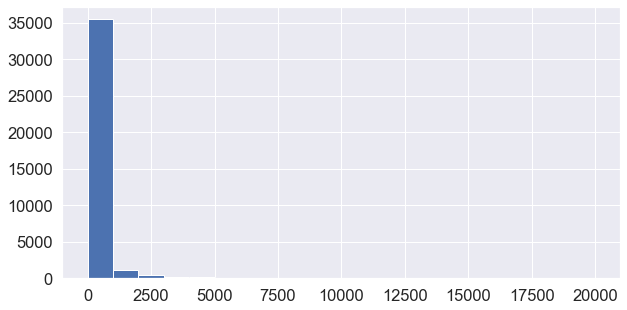

In [146]:
sns.set(font_scale = 1.5)
fig = plt.figure(figsize=(10,5))
plt.hist(df2.price, bins=20)
plt.xlabel=("price")
plt.ylabel=("Frequency")

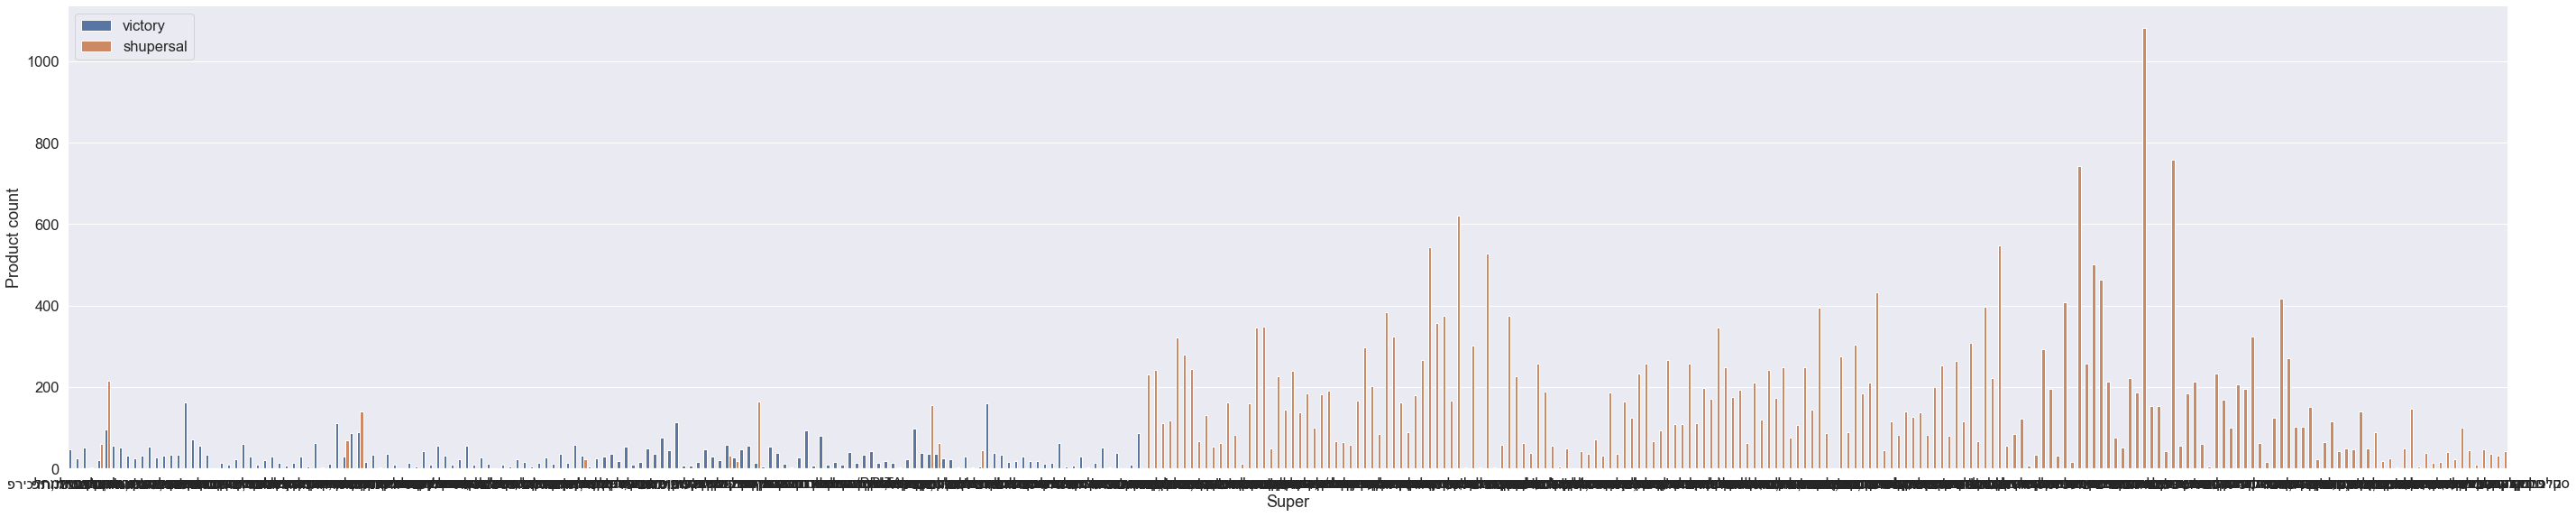

In [147]:
g = sns.catplot(
    x='catgory', 
    data=df2,
    kind='count', 
    hue='super',
    #palette=["#F39C12", "red"], 
    height=8, 
    aspect=5,
    legend=False,
    ).set_axis_labels('Super', 'Product count')
g.ax.legend(labels=['victory','shupersal'])

<b> פונקצייה להוצאת תדירות מירבית של פריט לפי שם העמודה

In [148]:
def get_frequent_elements(df, col_name, num_top_elements):
    ###
    name= []
    count=[]
    y= df[col_name].value_counts()
    d={}
    n=0
    for x in y.keys(): 
        name.append(x)
        count.append(y[x])
        n=n+1
        if (n==num_top_elements):
            break
    data = pd.Series(count, index=name)
    ser = pd.Series(name)
    ser = pd.Series(count)
    return data

In [149]:
col_name=['suplier']
y=get_frequent_elements(df2, col_name, 10)
y

(unknown,)        3254
(שופרסל,)         2297
(כללי,)            625
(GALA HOME,)       449
(GA-DE,)           312
(אסם,)             304
(CATRICE,)         263
(שופרסל גרין,)     257
(סנו,)             242
(Be NOW,)          219
dtype: int64

<b>עשרת הספקים הגדולים

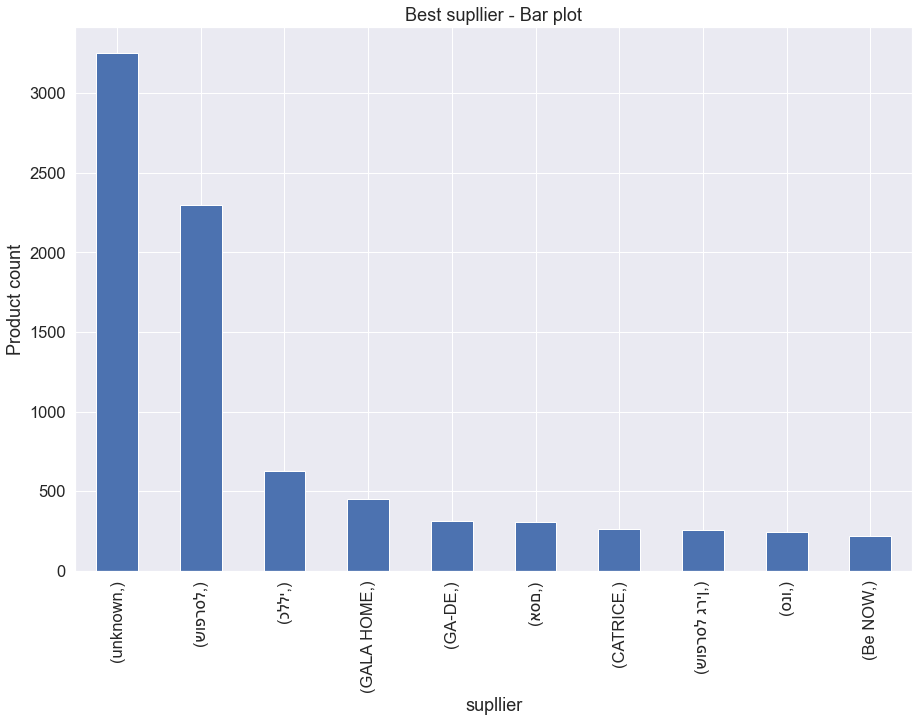

In [150]:
fig = plt.figure(figsize=(15,10))
p=y.plot(kind='bar')
plt.title("Best supllier - Bar plot")
p.set_xlabel("supllier")
p.set_ylabel("Product count")
plt.show()

<b> עשרת המוצרים היקרים ביותר

In [151]:
df_exp=df2.sort_values('price', ascending=False).copy()
df_exp=df_exp.iloc[:10,:]
df_exp.reset_index(inplace=True)
df_exp

index   super                        catgory  mean_price_for_catgory  \
0  18409  שופרסל               מוצרי טיפוח אישי              589.460982   
1  26457  שופרסל                   ארגון ואחסון             1964.737647   
2  23556  שופרסל                       ריהוט גן             2126.462357   
3  26442  שופרסל                   ארגון ואחסון             1964.737647   
4  26463  שופרסל                   ארגון ואחסון             1964.737647   
5  23708  שופרסל  גרילים, מעשנות ואביזרים למנגל             1477.929365   
6  23554  שופרסל                       ריהוט גן             2126.462357   
7  23696  שופרסל  גרילים, מעשנות ואביזרים למנגל             1477.929365   
8  26461  שופרסל                   ארגון ואחסון             1964.737647   
9  26460  שופרסל                   ארגון ואחסון             1964.737647   

                                             product            suplier  \
0  LUXURY 4D MASSAGE CHAIR כורסאת עיסוי בטכנולוגי...        MEDICS CARE   
1                  מחסן גינה יוקון 11x21.3 כולל רצפה  Canopia by Palram   
2                           מערכת ישיבה טיבט 4 חלקים            SUNRISE   
3                            מחסן יוקון 11X21.3 אפור  Canopia by Palram   
4                  מחסן גינה יוקון 11x17.2 כולל רצפה  Canopia by Palram   
5                     מעשנה בשר וגריל טרייגר TREAGER            TRAEGER   
6                                  מערכת ישיבה האיטי            SUNRISE   
7                     מעשנת בשר וגריל טרייגר TREAGER            TRAEGER   
8                            מחסן יוקון 11X17.2 אפור  Canopia by Palram   
9                  מחסן גינה יוקון 11x13.1 כולל רצפה  Canopia by Palram   

             sizes  units  Vol_Wei    UOM    price  
0         MC 79900      1      0.0  יחידה  19990.0  
1      252x643x332      1      0.0  יחידה  15999.0  
2          4 חלקים      4      0.0  יחידה  13900.0  
3      252x643x332      1      0.0  יחידה  12999.0  
4      252x519x332      1      0.0  יחידה  12999.0  
5  TIMBERLINE 1300      1      0.0  יחידה  12900.0  
6           4חלקים      4      0.0  יחידה  10990.0  
7   TIMBERLINE 850      1      0.0  יחידה  10900.0  
8      252x519x332      1      0.0  יחידה  10499.0  
9      252x395x332      1      0.0  יחידה   9999.8

<AxesSubplot:xlabel='product', ylabel='price'>

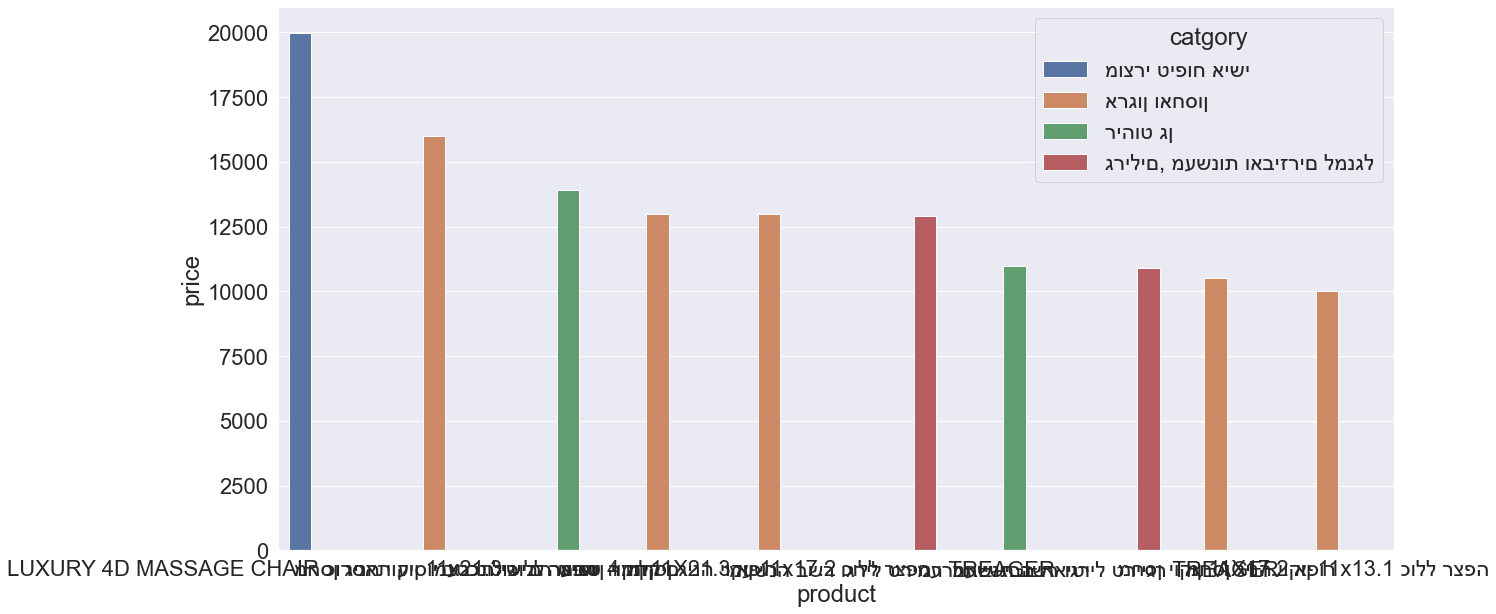

In [152]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.barplot(x='product', y='price', data=df_exp, hue='catgory', ci = 0)

<b> עשרת הקטגוריות היקרות ביותר

In [153]:
category=[]
mean_price=[]
for x in df2.catgory.unique():
    df_tmp=df2[df2['catgory']==x].copy()
    category.append(x)
    mean_price.append(df_tmp.price.mean())
df_cat_mean= pd.DataFrame({"category":category, "mean price":mean_price})

In [154]:
df_cat_mean.sort_values('mean price', ascending=False,inplace=True)
df_cat_mean.reset_index(inplace=True)
df_cat_mean.drop(["index"],axis=1, inplace=True)
df_cat_mean

category   mean price
0          ספות ומערכות ישיבה  2880.989740
1          מקררים ומדיחי כלים  2578.169591
2                    ריהוט גן  2126.462357
3    מיטות, מזרנים ומגני מזרן  2099.473460
4                ארגון ואחסון  1964.737647
..                        ...          ...
334       רוגלך ומאפים מתוקים     5.400000
335             תערובות תיבול     4.900000
336               מאפייה טריה     3.900000
337                 שמנת ולבן     2.978000
338                       NaN          NaN

[339 rows x 2 columns]

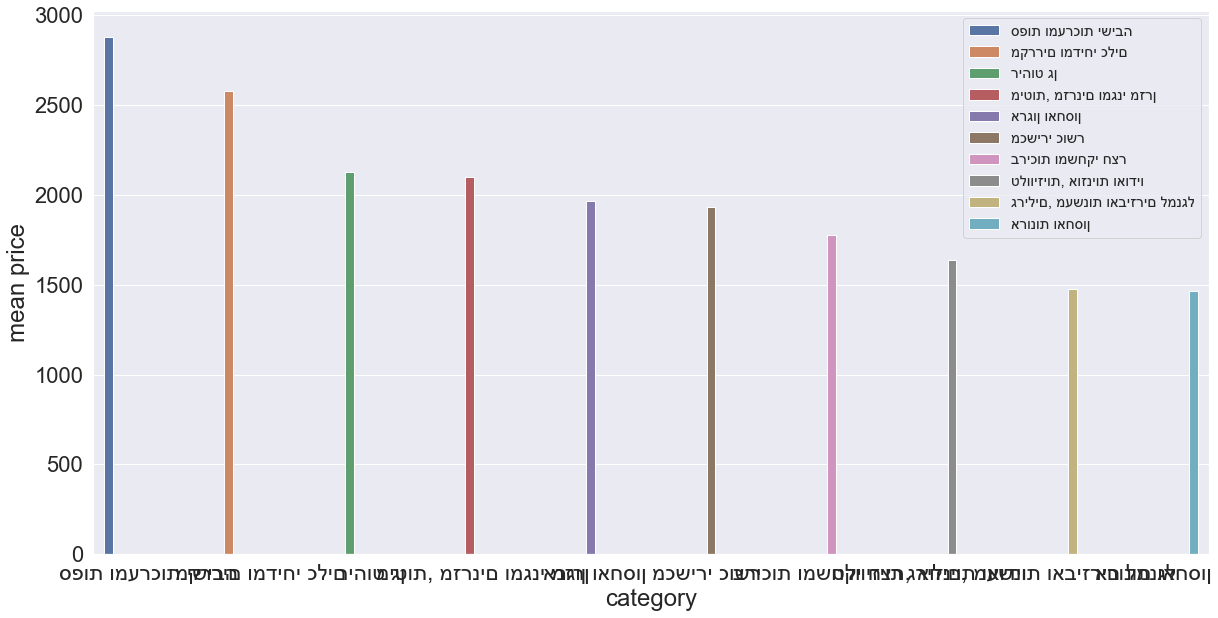

In [155]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.barplot(x='category', y='mean price', data=df_cat_mean.iloc[:10,:], hue='category', ci = 0)
plt.legend(fontsize = 15)

<b>חלוקה מחיר לקטגוריה לפי סופר וויקטורי

Text(0.5, 1.0, 'Victory')

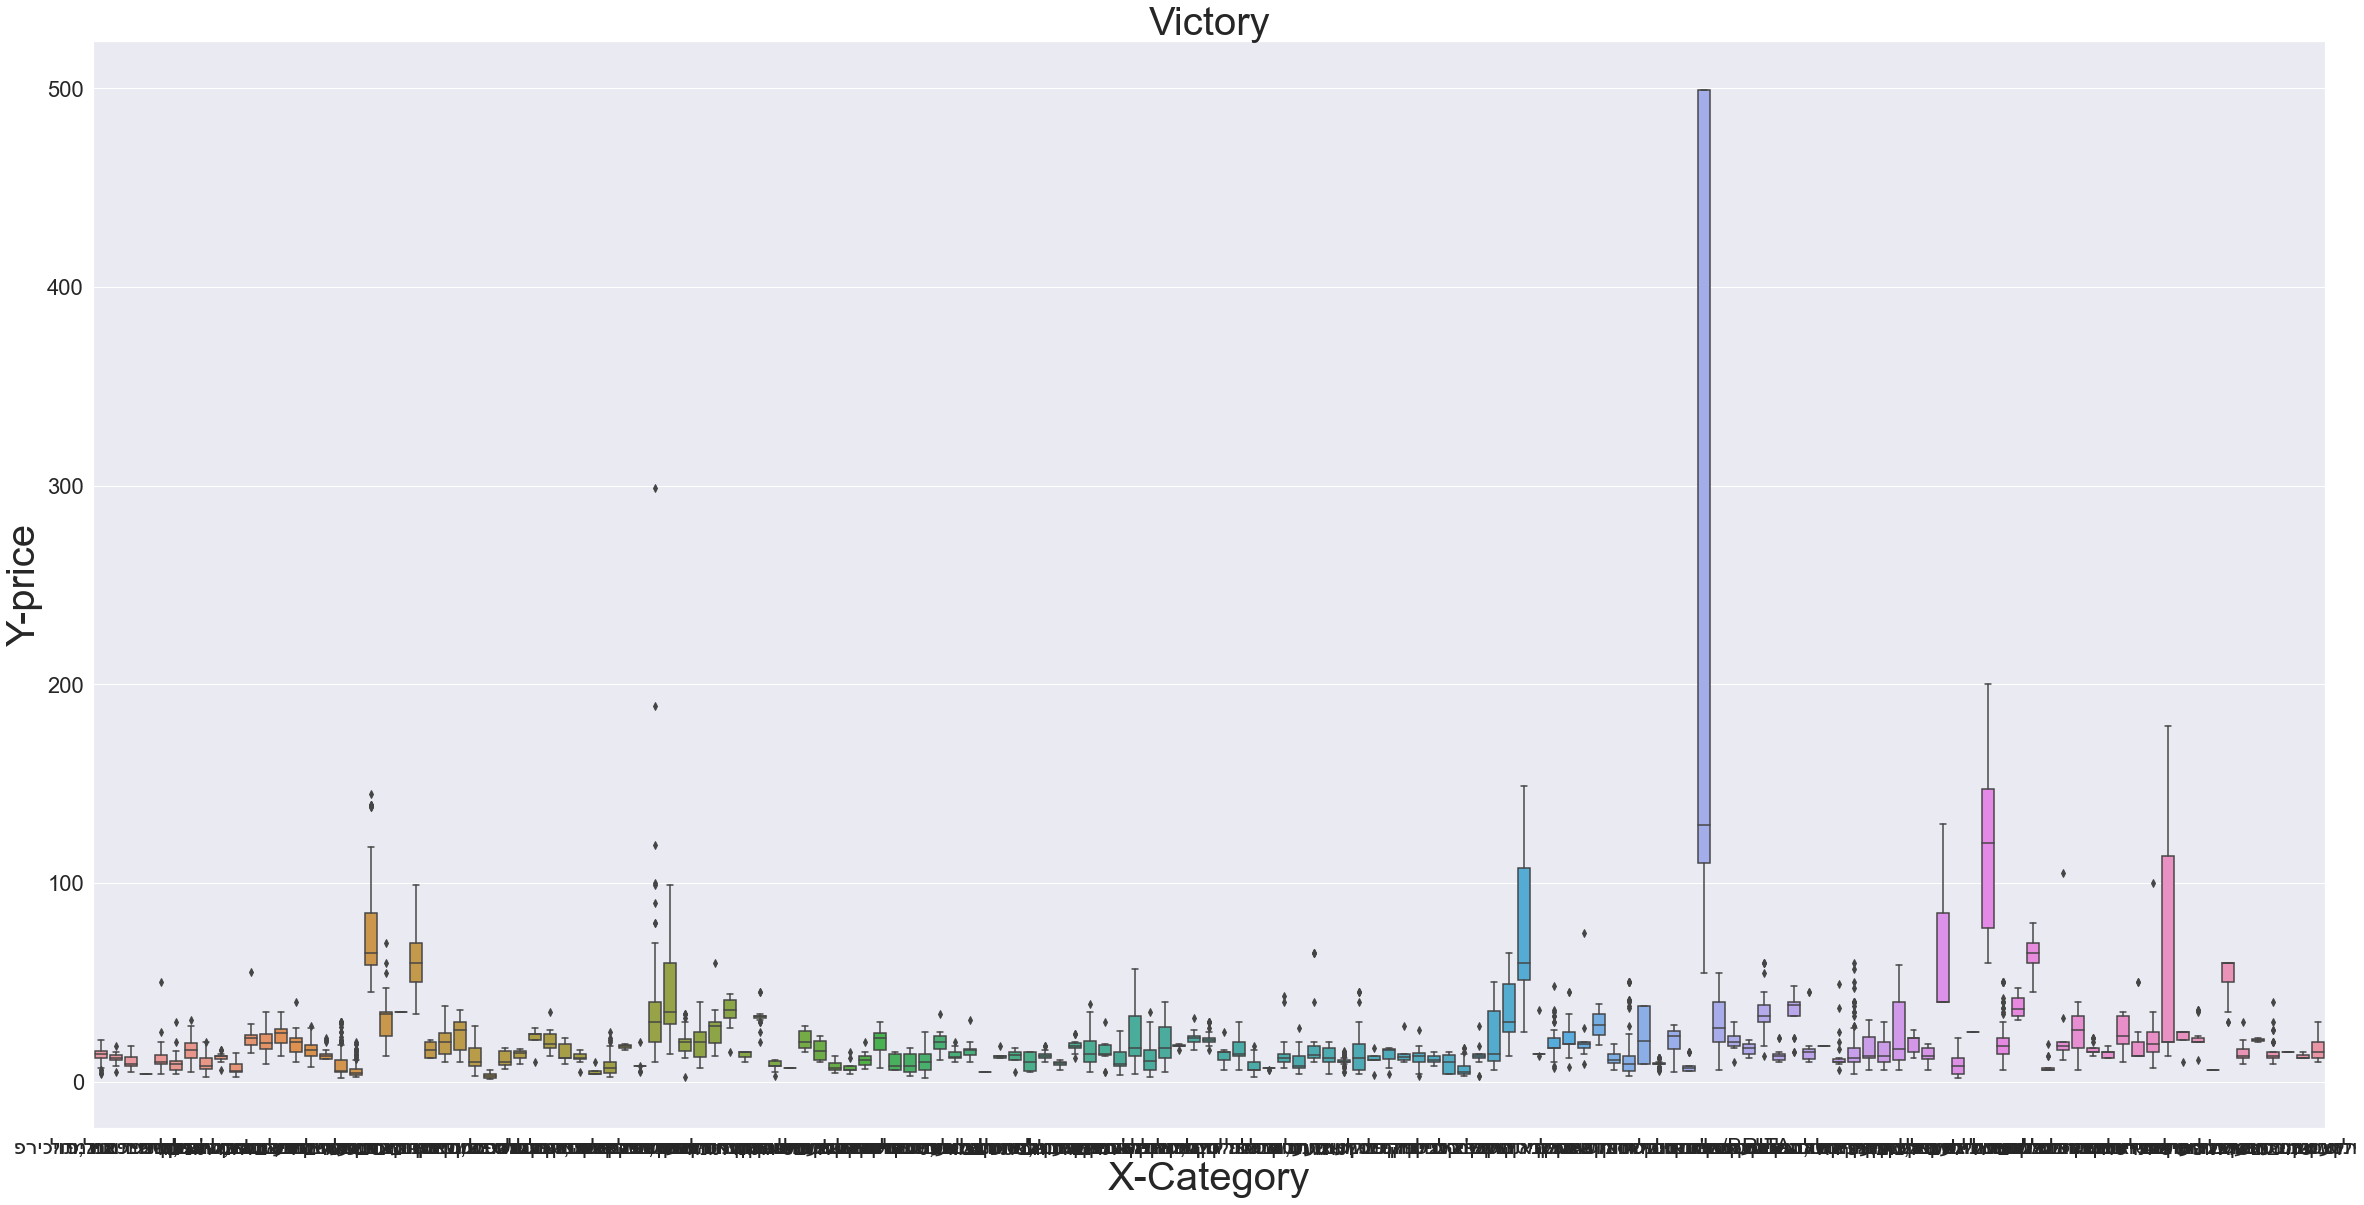

In [156]:
fig = plt.figure(figsize=(40,20))
p =sns.boxplot(x='catgory', y='price', data=df2[df2['super']=='וויקטורי'])
p.set_xlabel("X-Category", fontsize = 40)
p.set_ylabel("Y-price", fontsize = 40)
p.set_title("Victory", fontsize = 40)

<b>חלוקה מחיר לקטגוריה לפי סופר שופרסל

Text(0.5, 1.0, 'Shupersal')

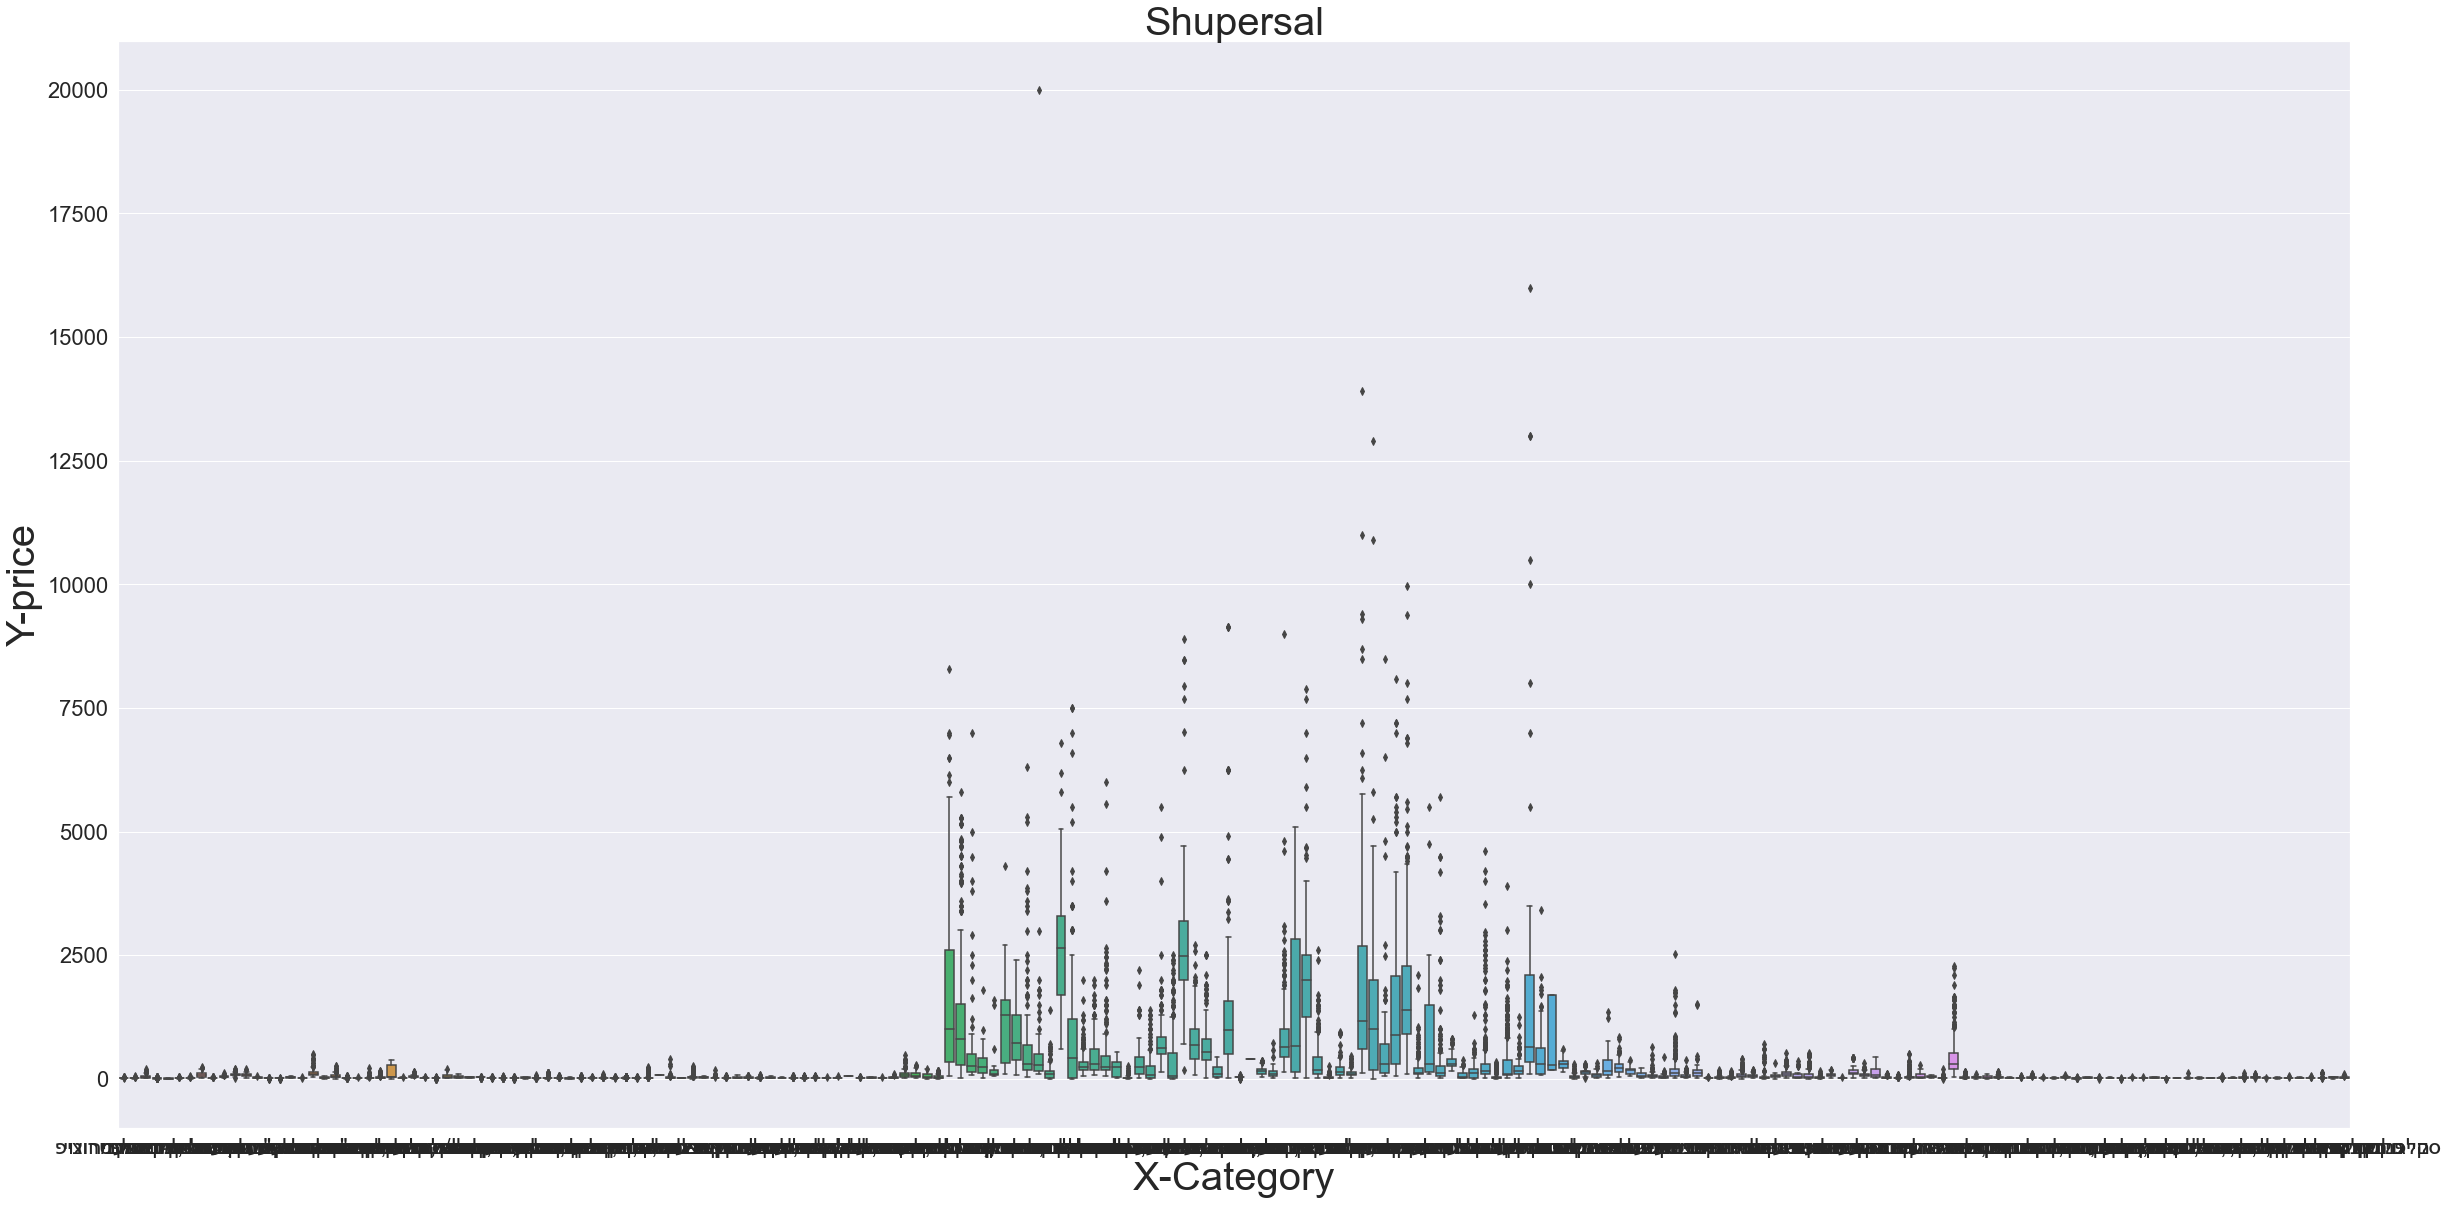

In [157]:
fig = plt.figure(figsize=(40,20))
p=sns.boxplot(x='catgory', y='price', data=df2[df2['super']=='שופרסל'])
p.set_xlabel("X-Category", fontsize = 40)
p.set_ylabel("Y-price", fontsize = 40)
p.set_title("Shupersal", fontsize = 40)

In [158]:
df2

super     catgory  mean_price_for_catgory  \
0      וויקטורי         לחם               12.000000   
1      וויקטורי         לחם               12.000000   
2      וויקטורי         לחם               12.000000   
3      וויקטורי         לחם               12.000000   
4      וויקטורי         לחם               12.000000   
...         ...         ...                     ...   
37418    שופרסל  תוספי מזון               88.955143   
37419    שופרסל  תוספי מזון               88.955143   
37420    שופרסל   לספורטאים               64.808929   
37421    שופרסל   לספורטאים               64.808929   
37422    שופרסל   לספורטאים               64.808929   

                                           product      suplier  \
0                              לחם אחיד פרוס אנג'ל        אנג'ל   
1                              לחם חיטה מלאה אנג'ל        אנג'ל   
2                    לחם מחמצת בסגנון איטלקי אנג'ל        אנג'ל   
3                           לחם עינן קל פרוס אנג'ל        אנג'ל   
4      לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל        אנג'ל   
...                                            ...          ...   
37418                         אוטריבייבי תרסיס לאף      אוטרימר   
37419                            אוטרימר תרסיס לאף      אוטרימר   
37420                             קולגן בוסט קלאסי        אלטמן   
37421                                     היילופרו  נייצ'רס פרו   
37422                               קולגן ביואקטיב  נייצ'רס פרו   

                  sizes  units  Vol_Wei    UOM  price  
0               750 גרם      1    0.750    ק"ג    6.6  
1               750 גרם      1    0.750    ק"ג   14.9  
2               500 גרם      1    0.500    ק"ג   15.9  
3               500 גרם      1    0.500    ק"ג   14.8  
4               750 גרם      1    0.750    ק"ג   12.9  
...                 ...    ...      ...    ...    ...  
37418            15 מ"ל      1    0.015   ליטר   24.9  
37419           100 מ"ל      1    0.100   ליטר   69.0  
37420  30 אריזות אישיות     30    0.000  יחידה  109.0  
37421          30 מוסות     30    0.000  יחידה  109.0  
37422          30 מוסות     30    0.000  יחידה  359.0  

[37423 rows x 10 columns]

In [159]:
df2['mean_price_for_catgory'].unique().min()

nan

In [160]:
for x in d:
    print(f"{x}: {d[x]}")

לחם: 12.890624999999991
לחמניות ופיתות: 11.91666666666667
פריכיות, מצות ותחליפי לחם: 9.861538461538455
מאפייה טריה: 3.9
פירות: 12.927160493827149
ירקות: 10.00884244372995
פירות יבשים, אגוזים ופיצוחים: 15.838181818181805
חלב ומשקאות: 9.241372549019605
משקאות סויה ואורז: 12.115624999999994
קוטג' וגבינה לבנה: 6.7711538461538465
בולגרית, פטה, ומלוחה: 22.377419354838697
גבינה צהובה ומוצרלה: 20.47407407407407
גבינות מחלב עיזים או כבשים: 22.957142857142852
גבינות קשות: 19.838709677419345
גבינות רכות: 16.188235294117643
גבינת שמנת: 13.73823529411764
יוגורט: 8.928395061728402
מעדנים: 6.452112676056336
בשר טרי: 76.78214285714287
עוף והודו טרי: 31.475757575757562
בשר ועוף מוכן: 35.0
דגים טריים: 61.076923076923066
דגים ארוזים וסושי טרי: 16.1
נקניקיות: 20.67272727272726
נקניקים ופסטרמה: 24.096721311475427
חמאה, מרגרינה: 11.865517241379306
שמנת ולבן: 2.9779999999999998
שמנת לבישול והקצפה: 10.894285714285717
סלטים: 13.539999999999996
פסטה טריה: 22.4
ביצים: 21.21428571428572
טופו וסייטן: 14.3642857142

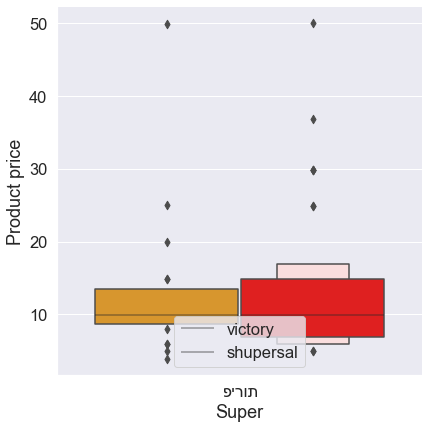

In [437]:
g = sns.catplot(
    x='catgory', 
    y='price',
    data=df2[df2.catgory=="פירות"],
    kind='boxen', 
    hue='super',
    palette=["#F39C12", "red"], 
    height=6, 
    aspect=1,
    legend=False,
    ).set_axis_labels('Super', 'Product price')
g.ax.legend(labels=['victory','shupersal'])


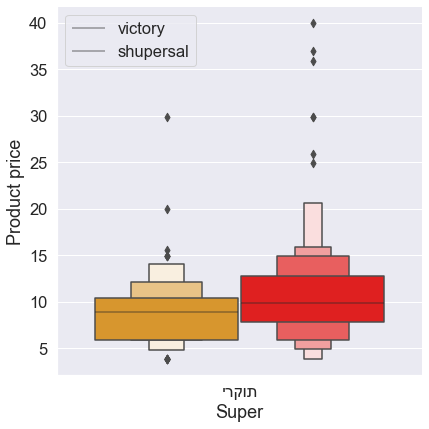

In [436]:
g = sns.catplot(
    x='catgory', 
    y='price',
    data=df2[df2.catgory=="ירקות"],
    kind='boxen', 
    hue='super',
    palette=["#F39C12", "red"], 
    height=6, 
    aspect=1,
    legend=False,
    ).set_axis_labels('Super', 'Product price')
g.ax.legend(labels=['victory','shupersal'])

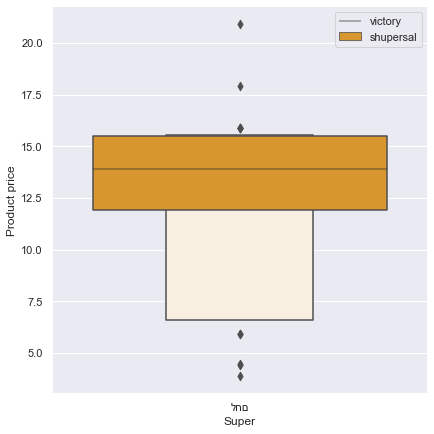

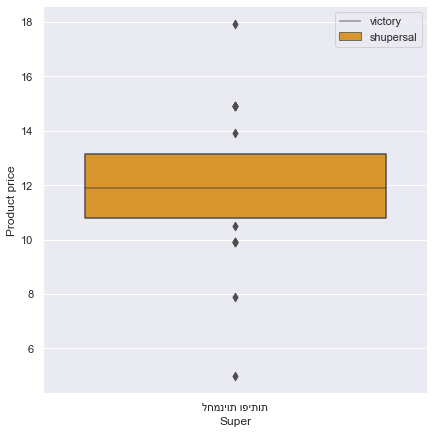

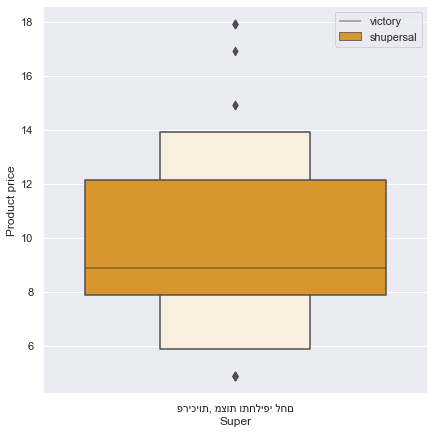

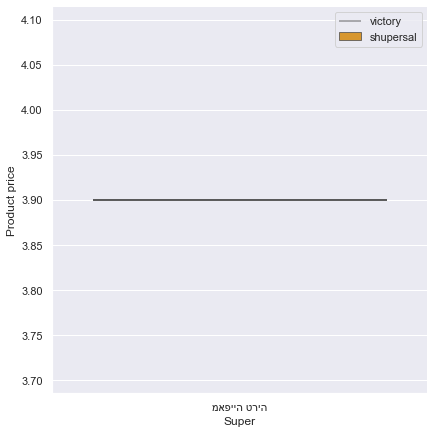

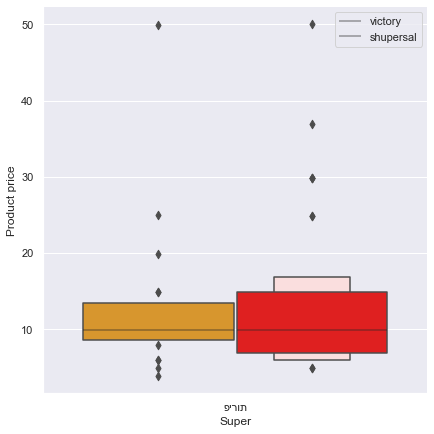

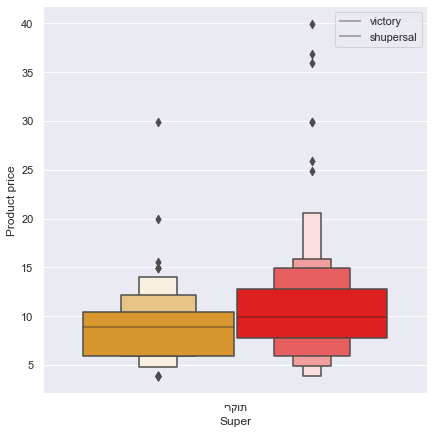

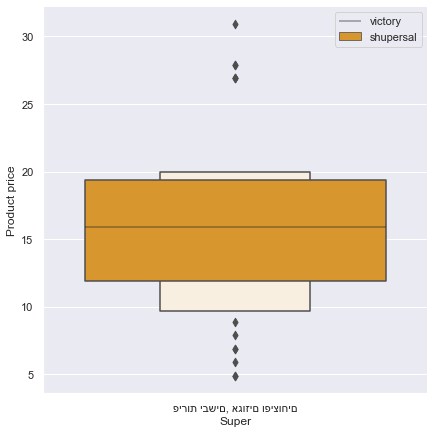

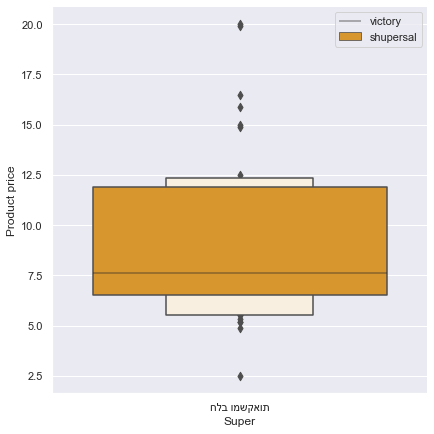

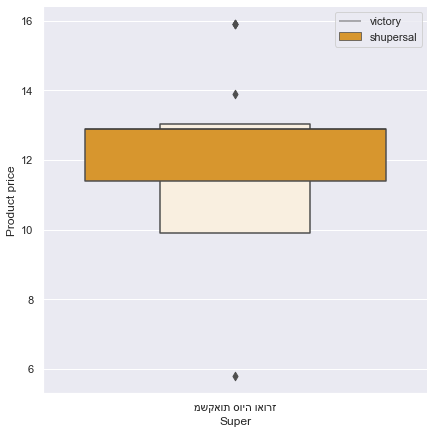

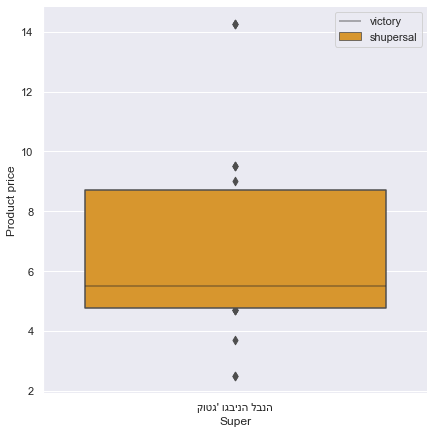

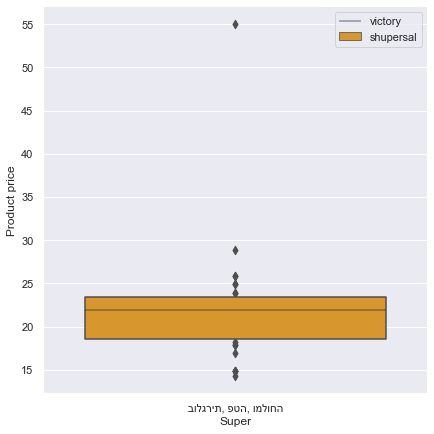

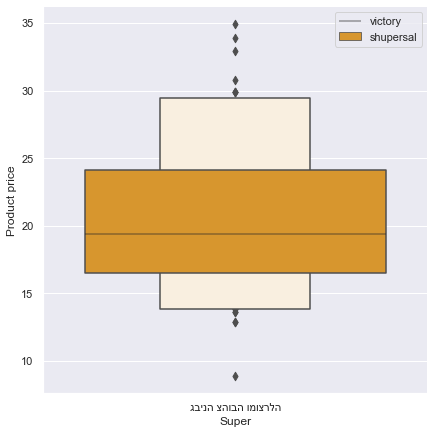

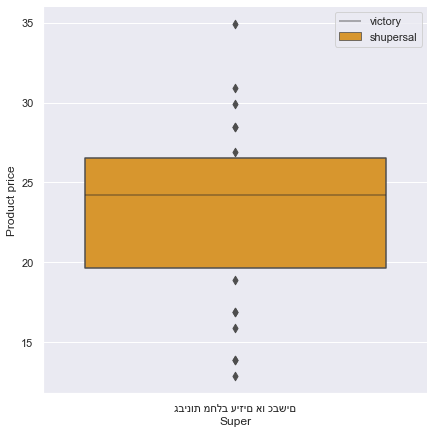

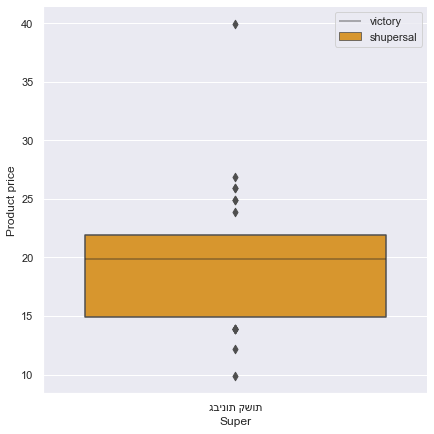

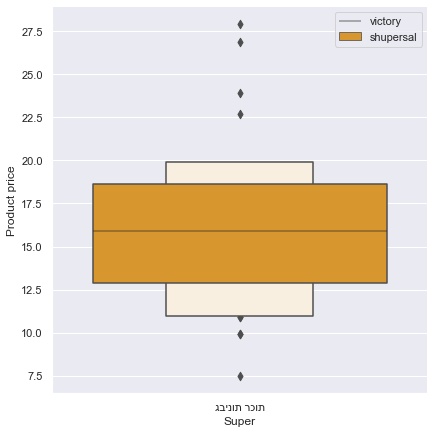

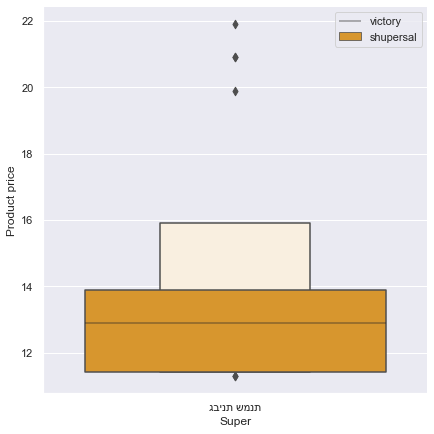

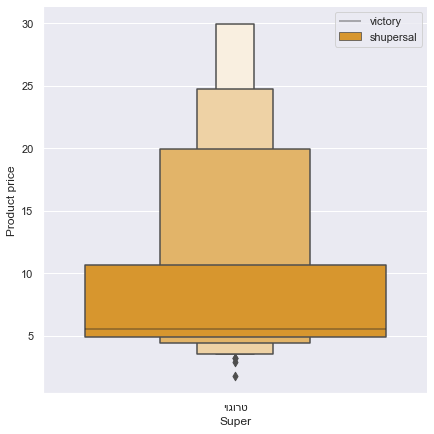

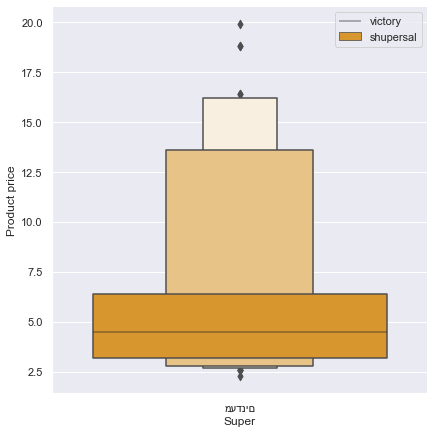

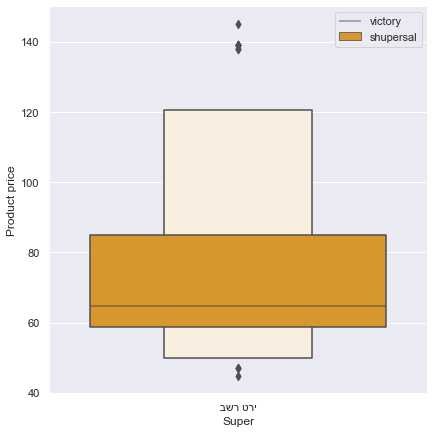

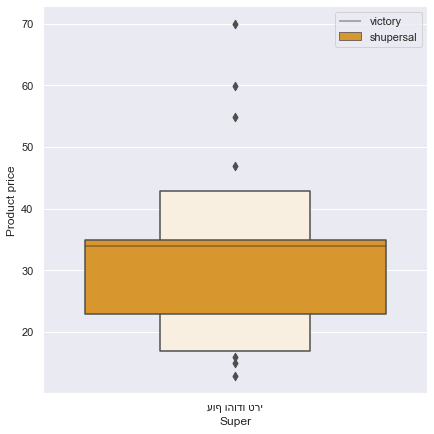

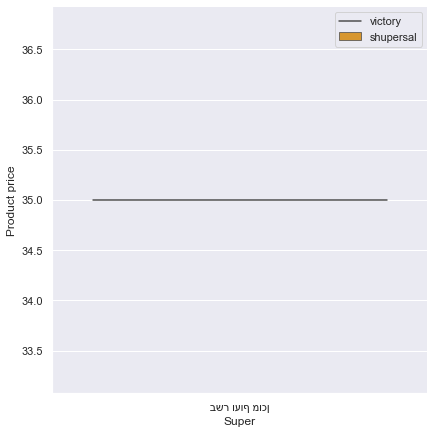

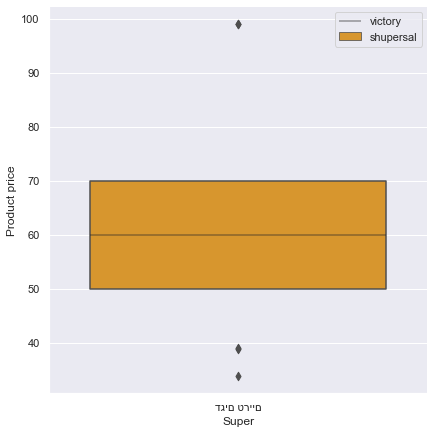

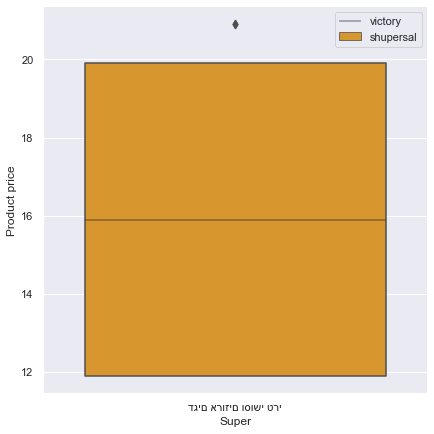

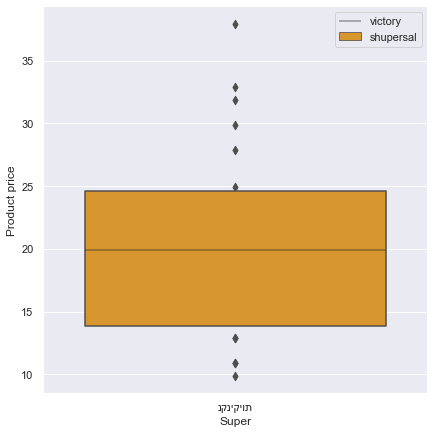

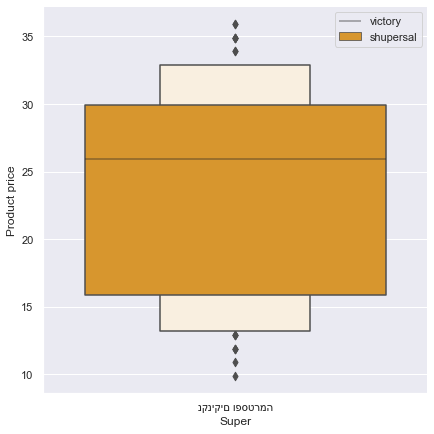

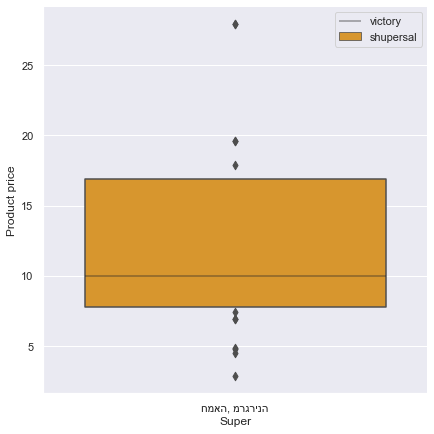

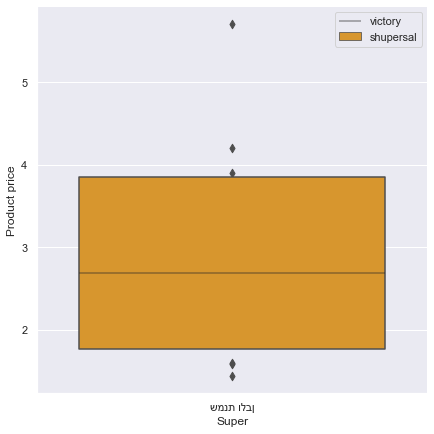

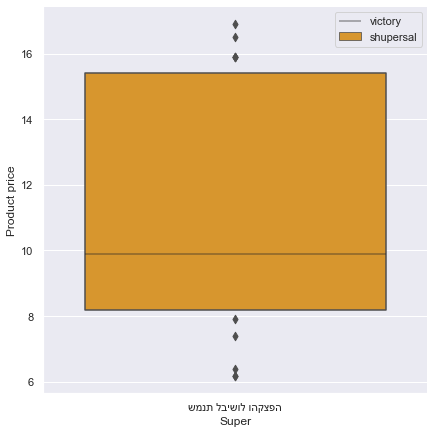

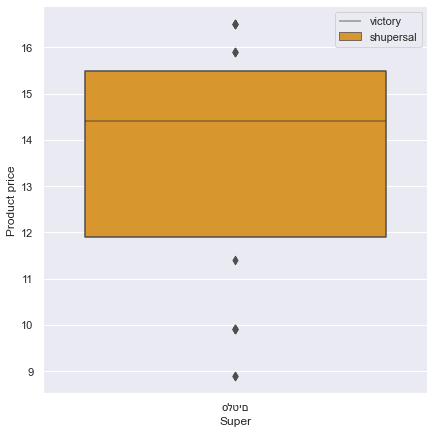

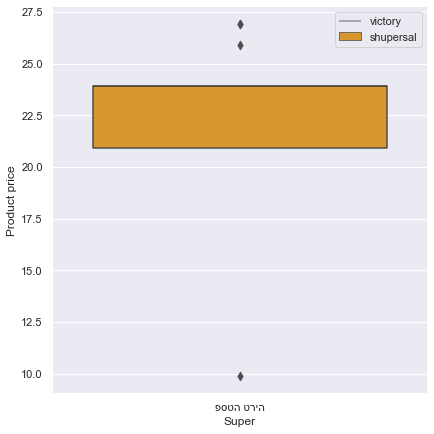

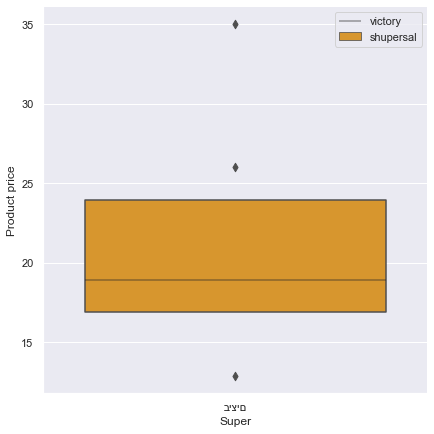

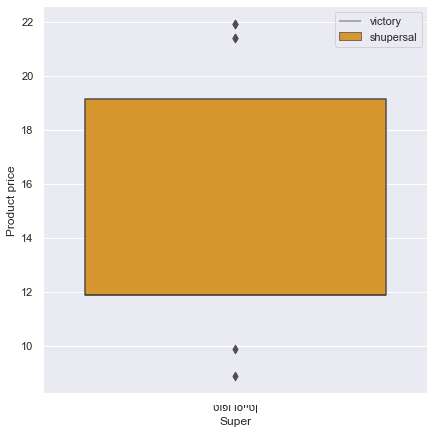

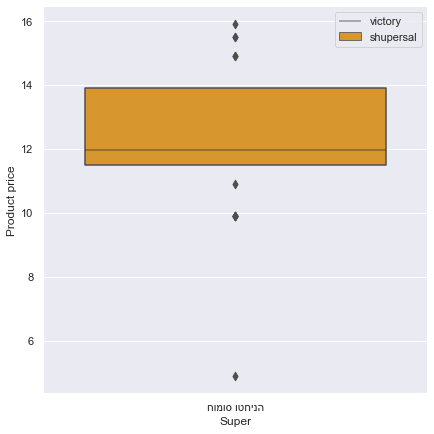

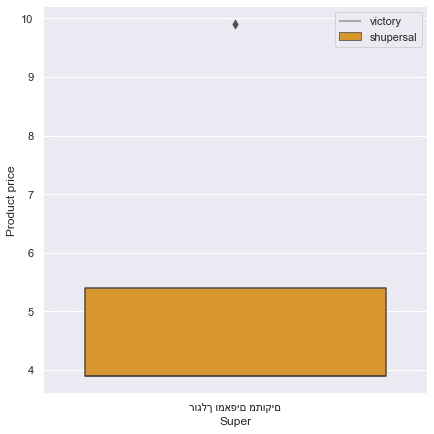

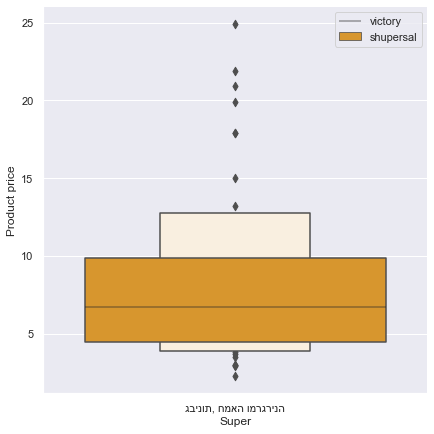

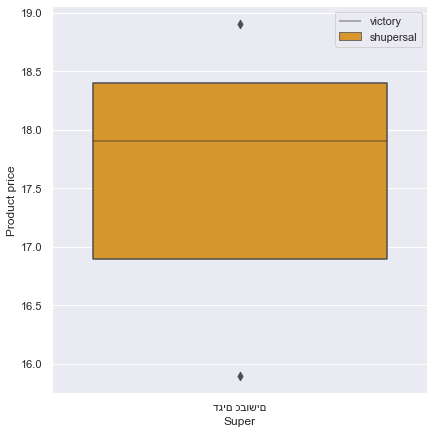

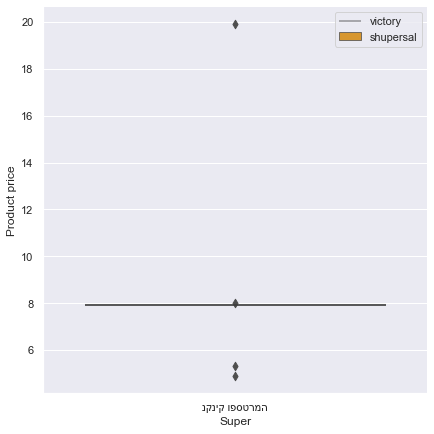

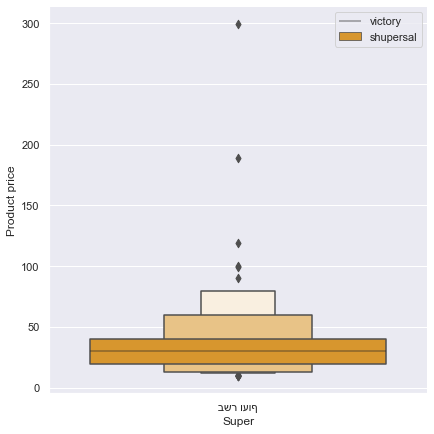

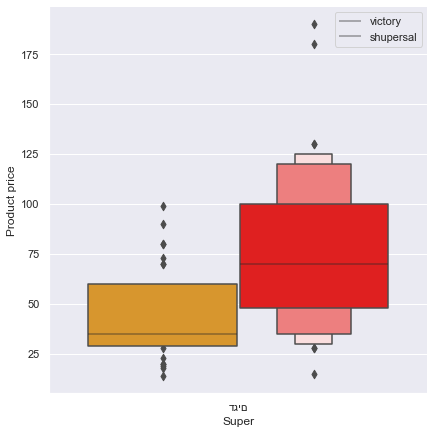

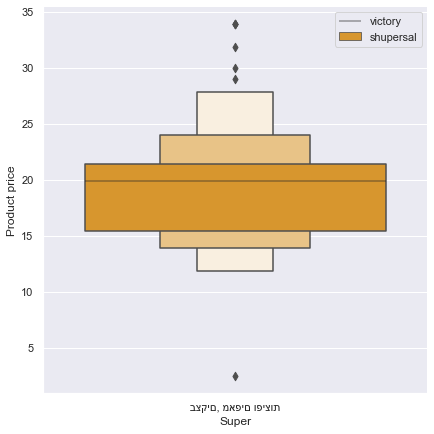

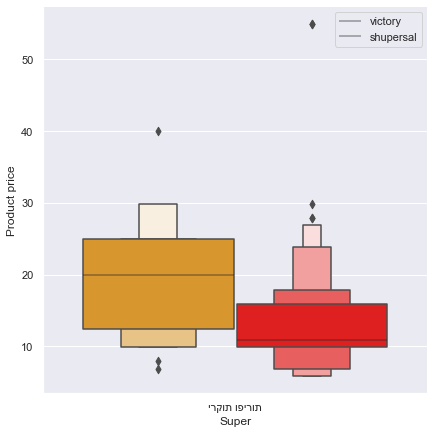

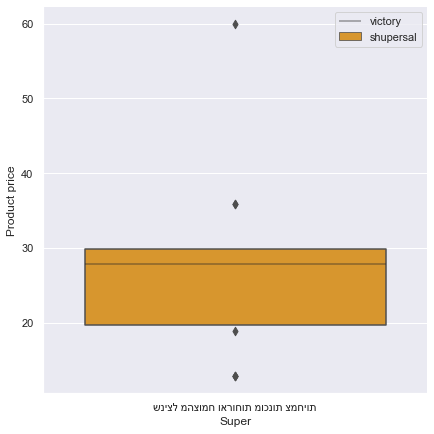

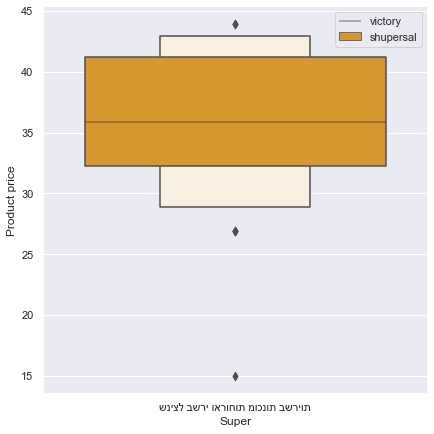

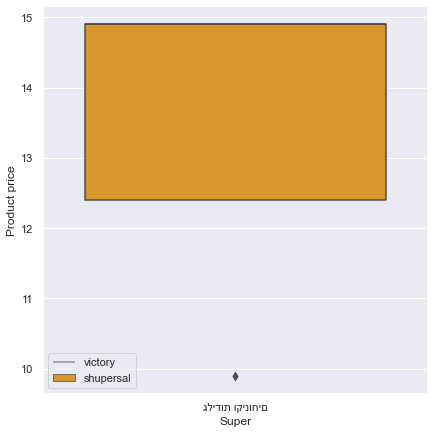

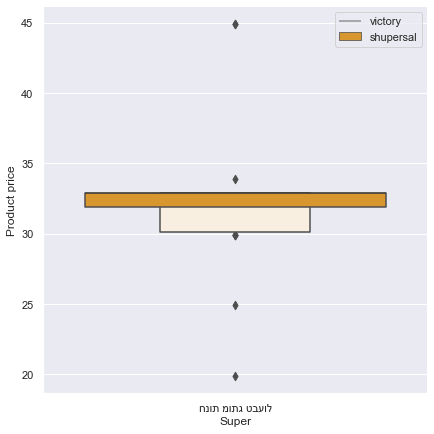

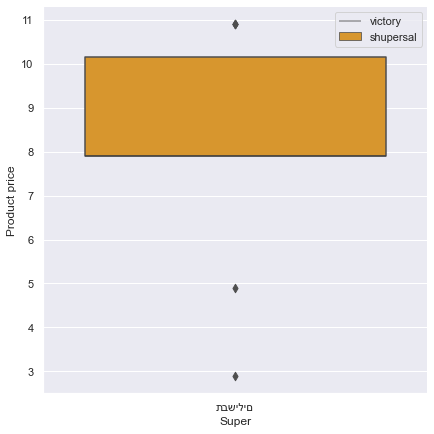

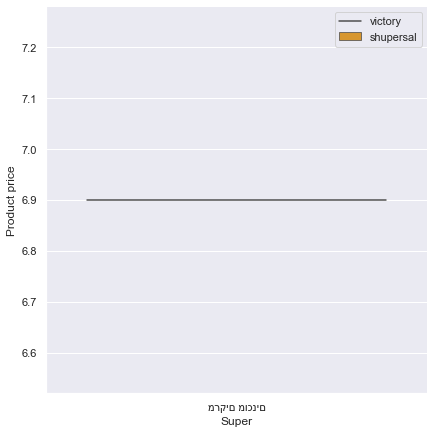

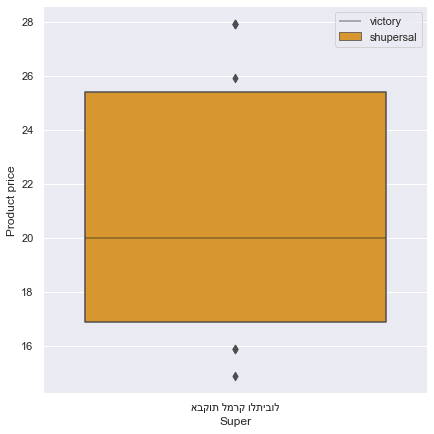

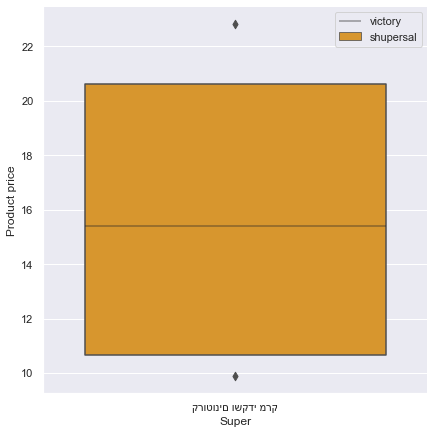

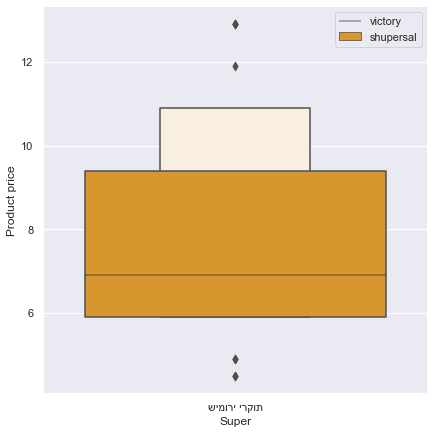

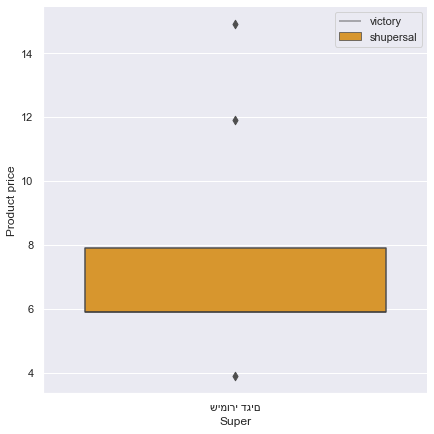

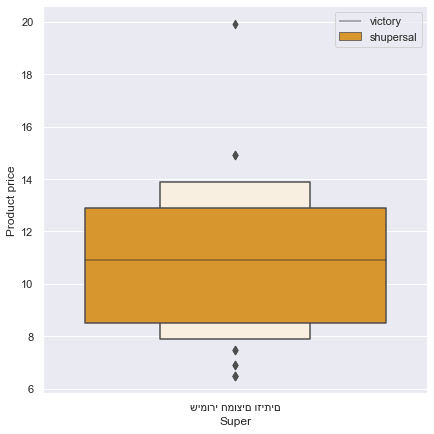

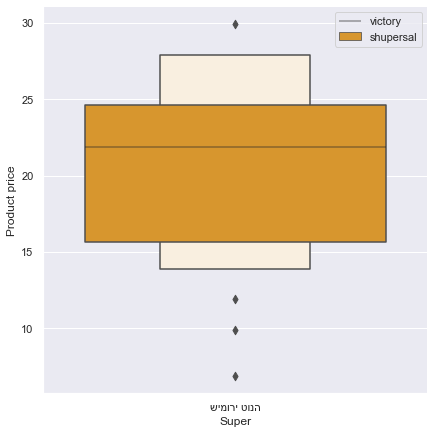

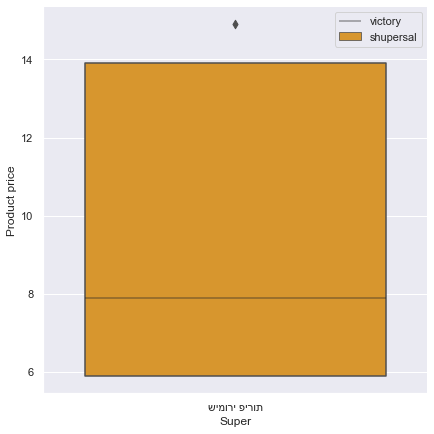

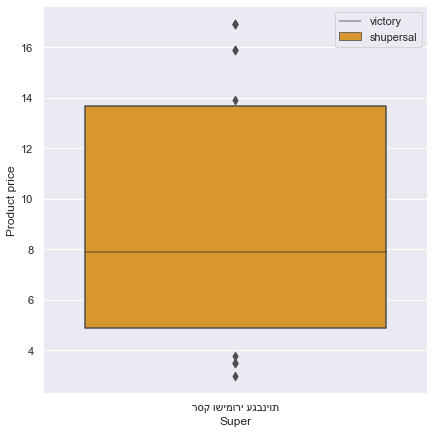

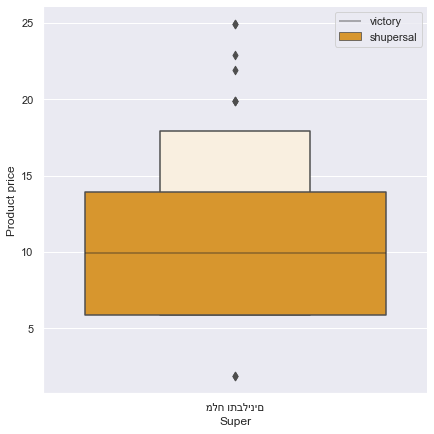

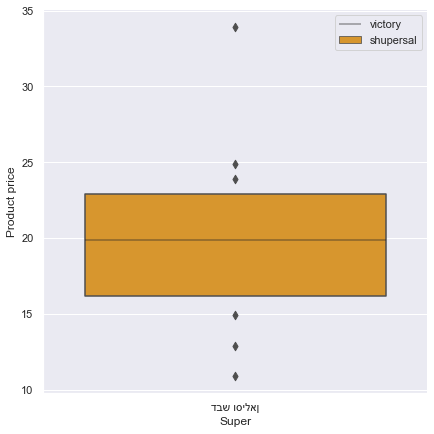

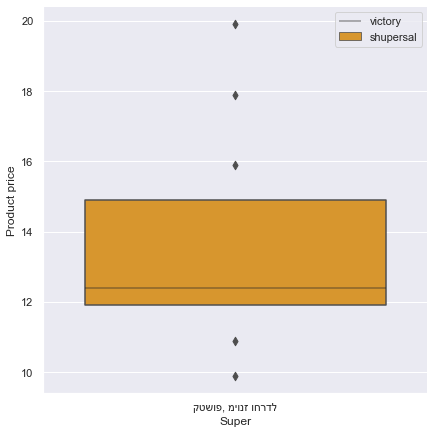

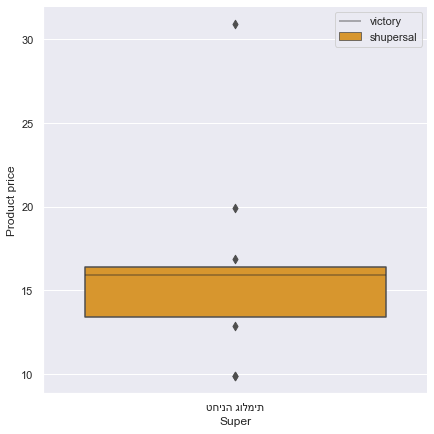

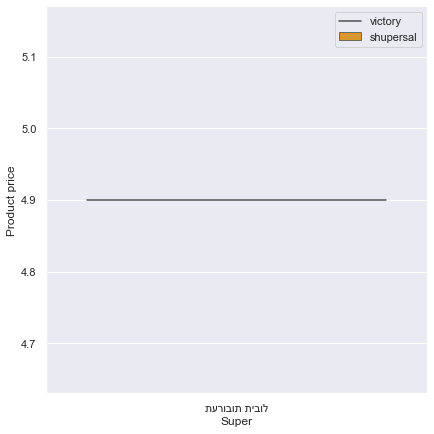

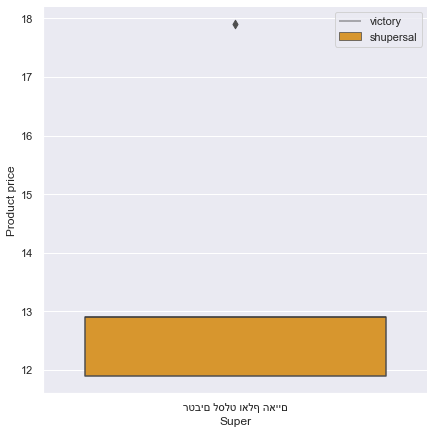

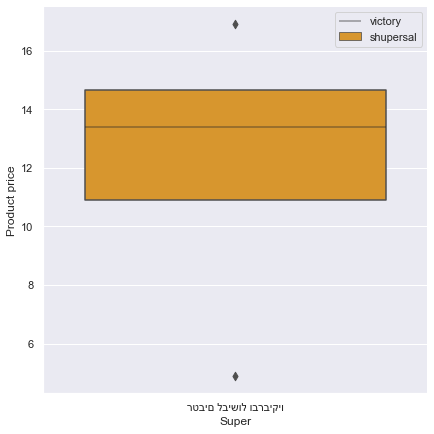

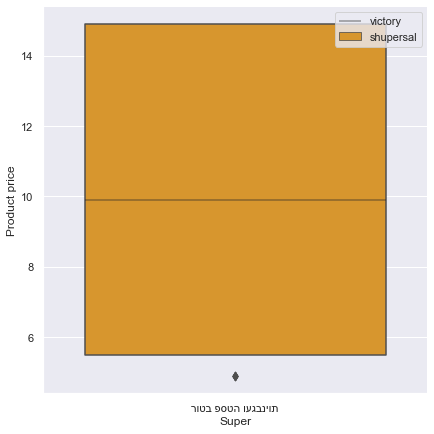

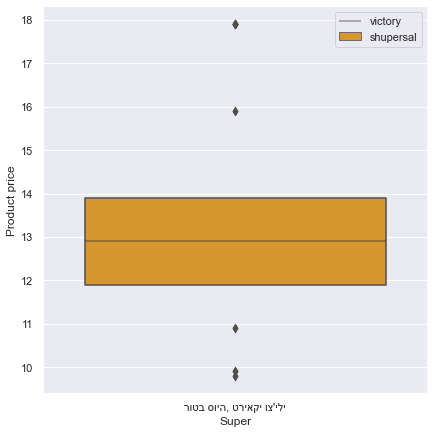

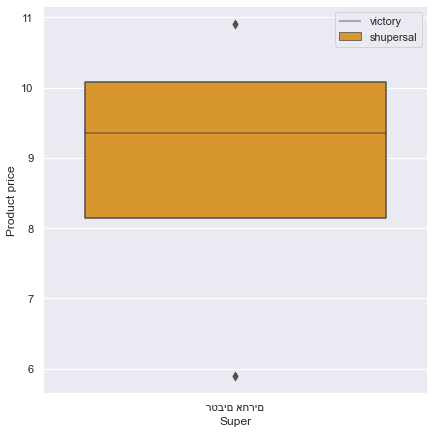

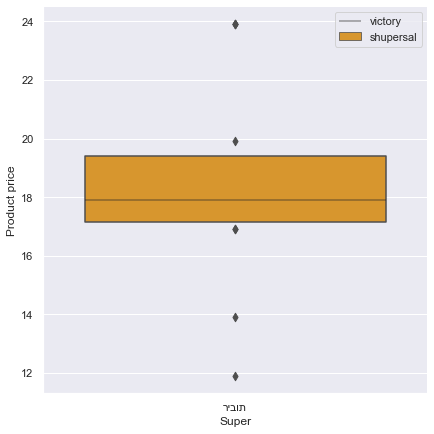

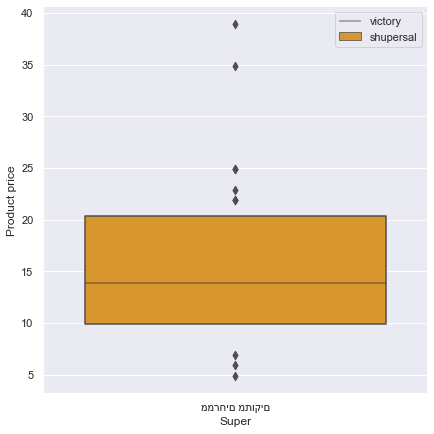

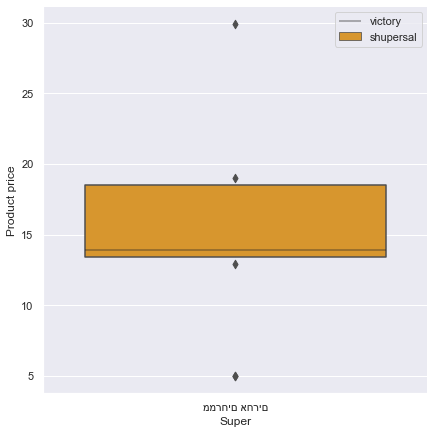

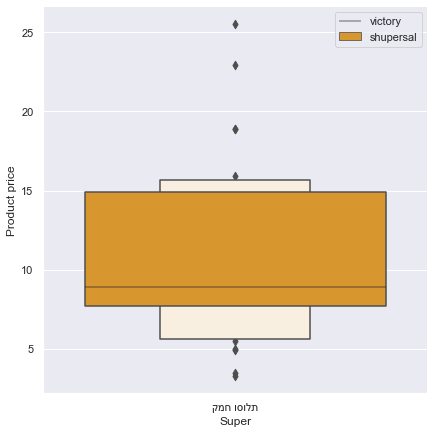

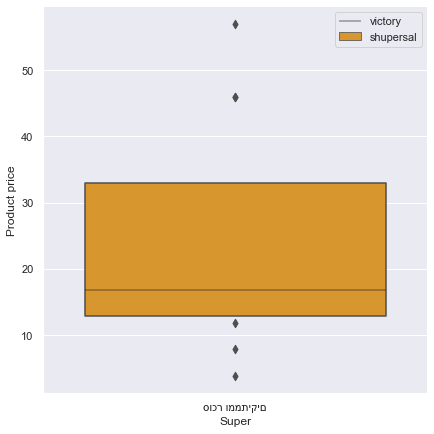

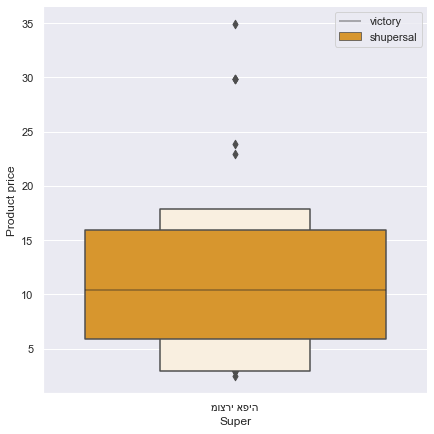

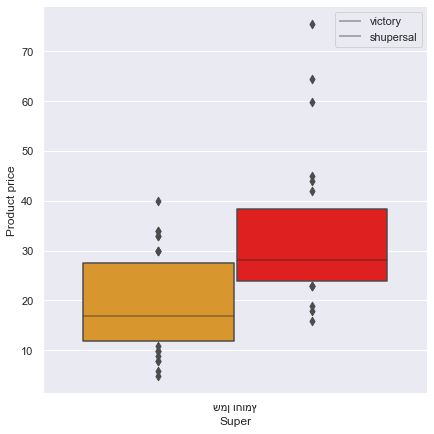

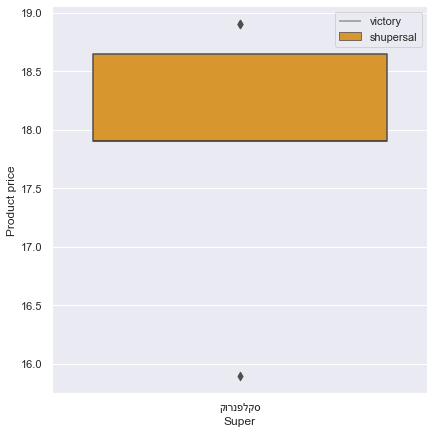

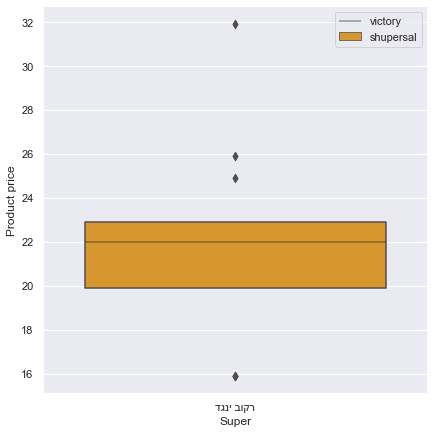

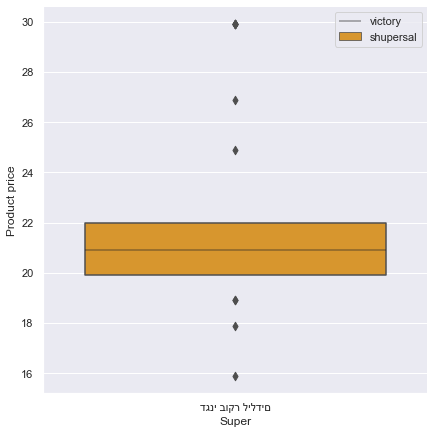

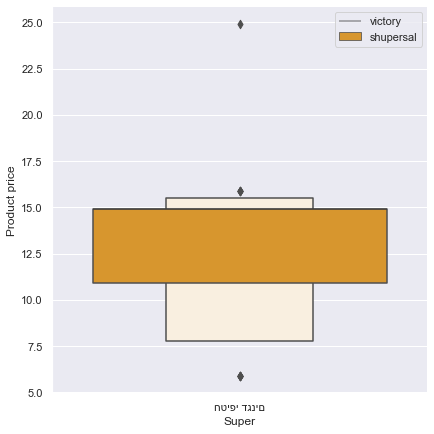

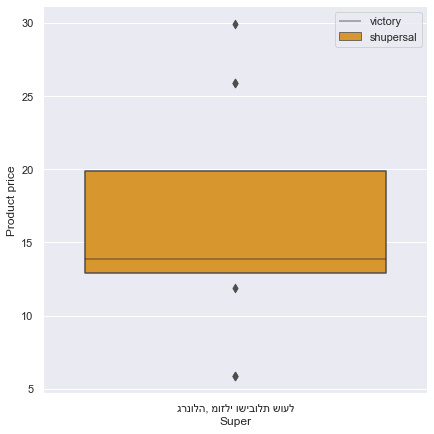

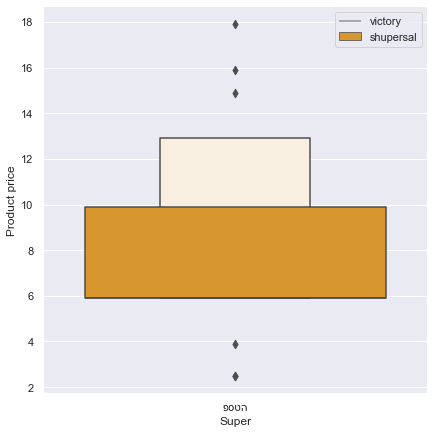

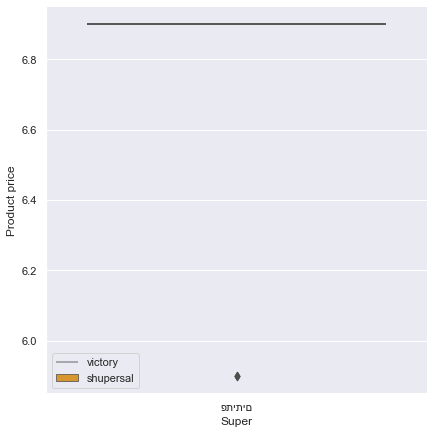

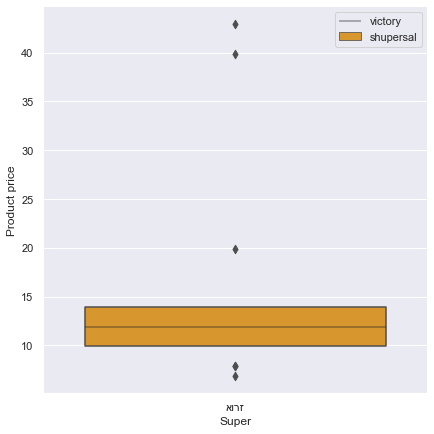

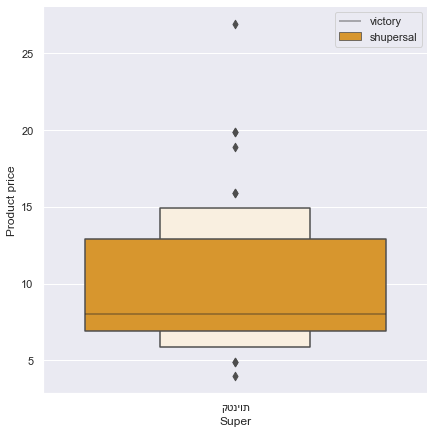

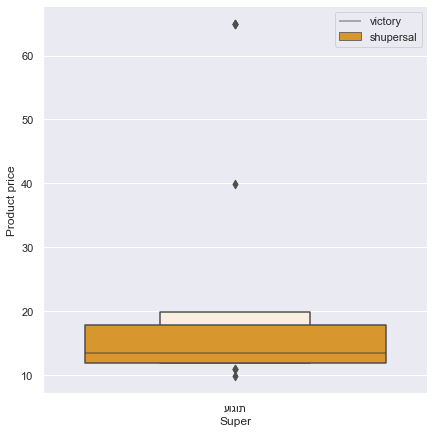

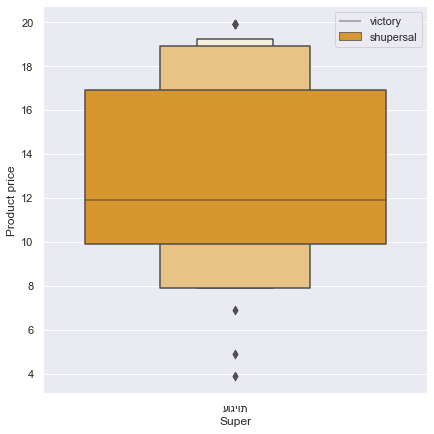

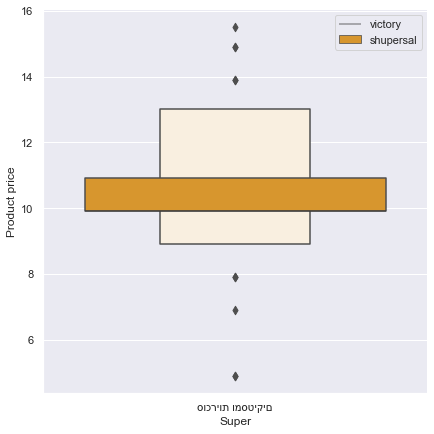

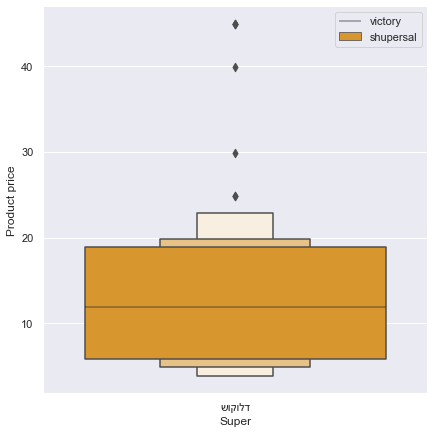

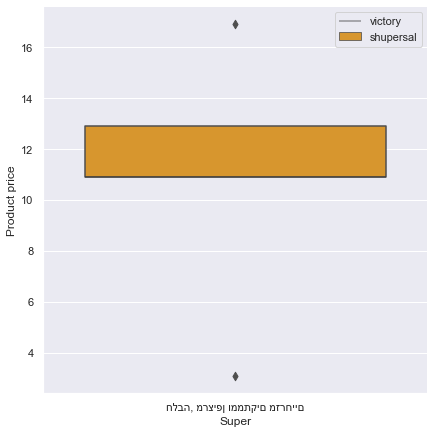

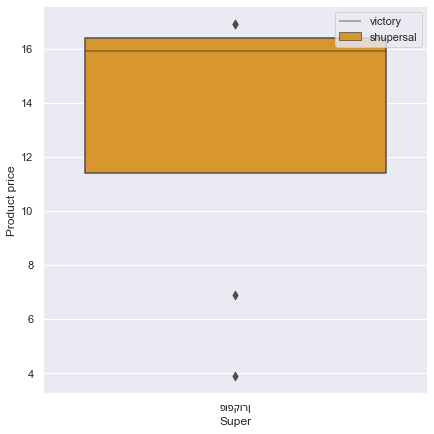

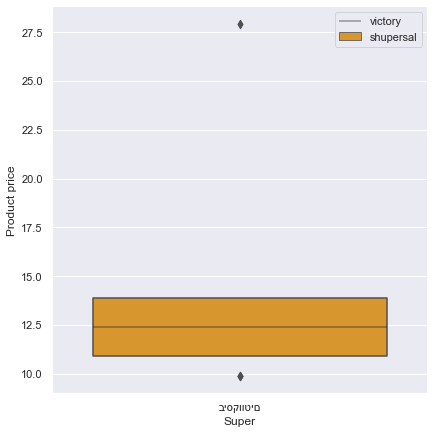

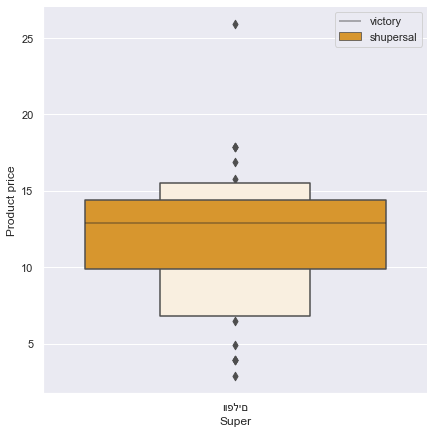

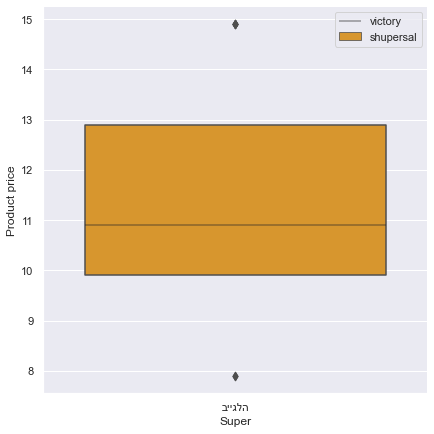

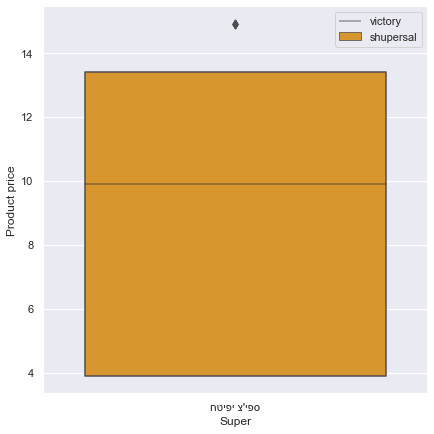

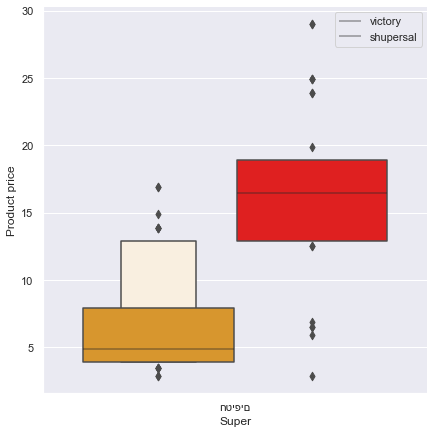

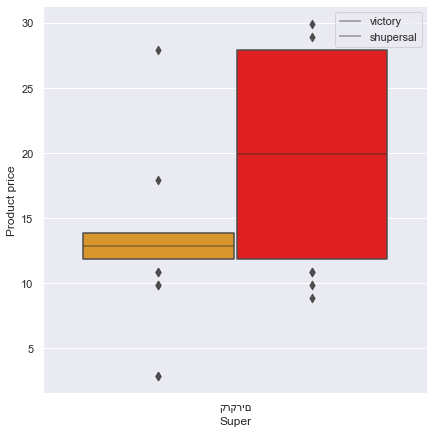

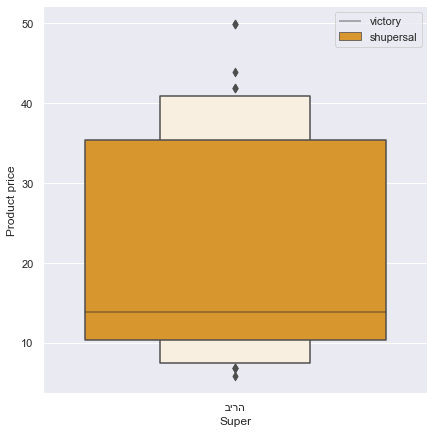

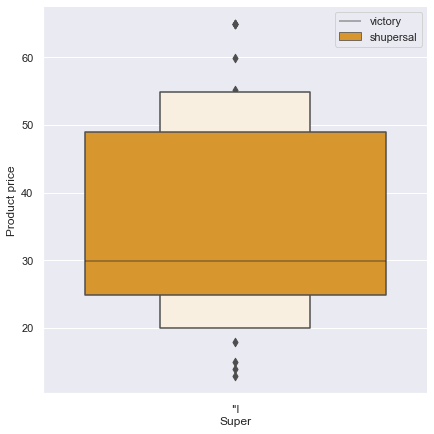

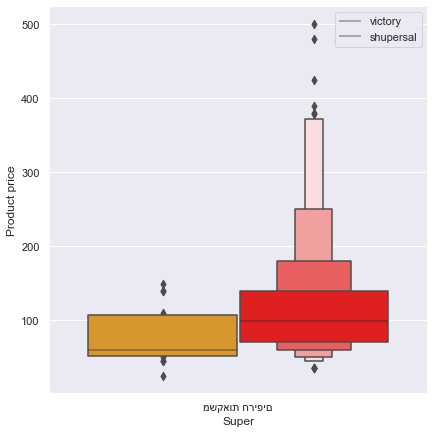

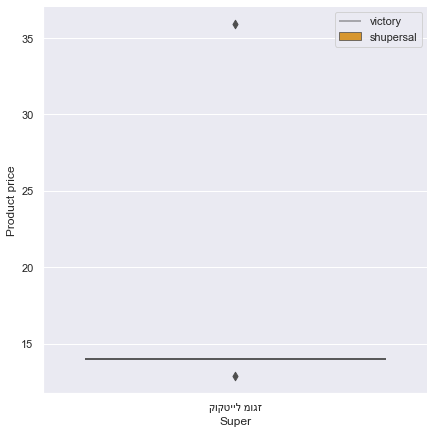

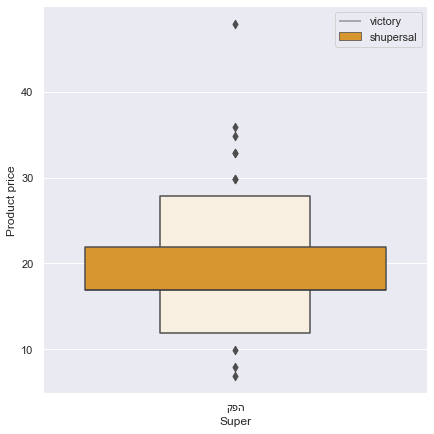

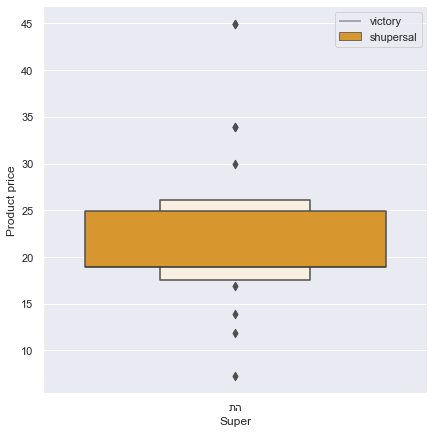

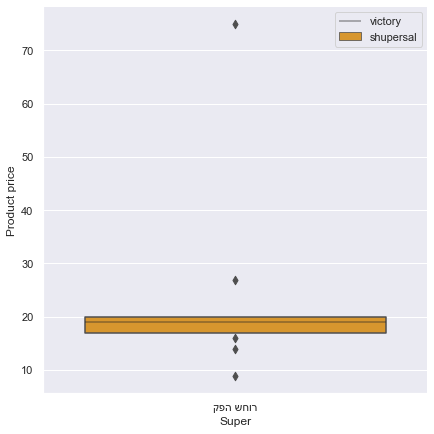

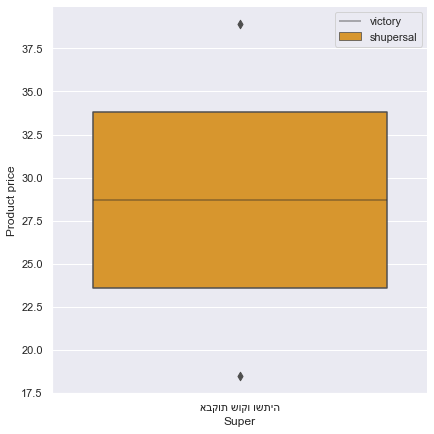

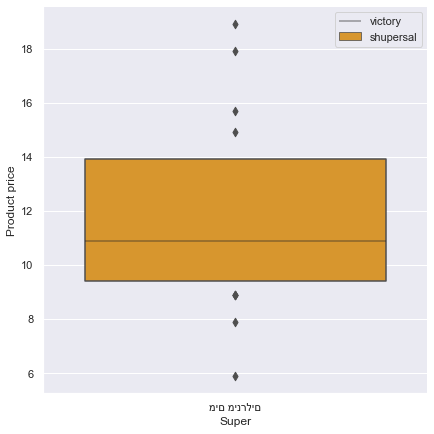

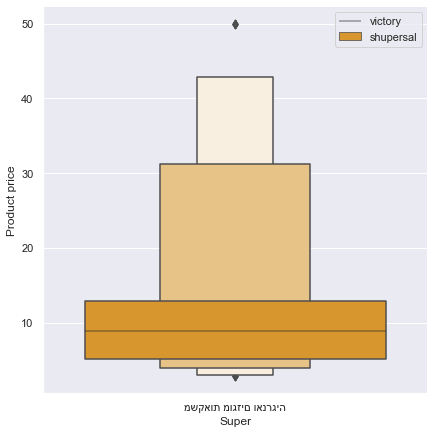

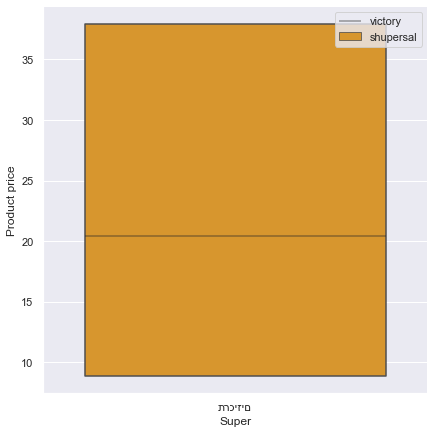

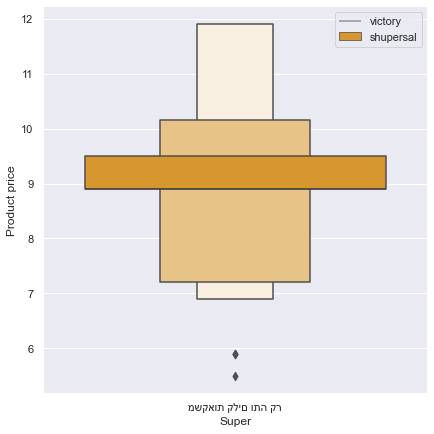

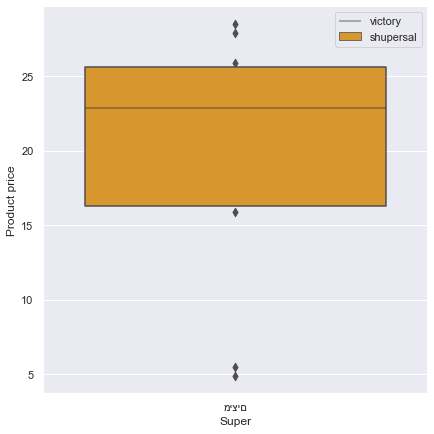

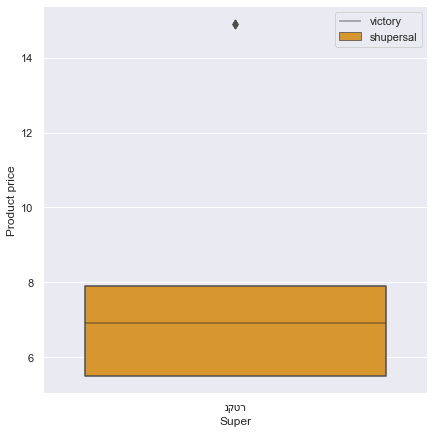

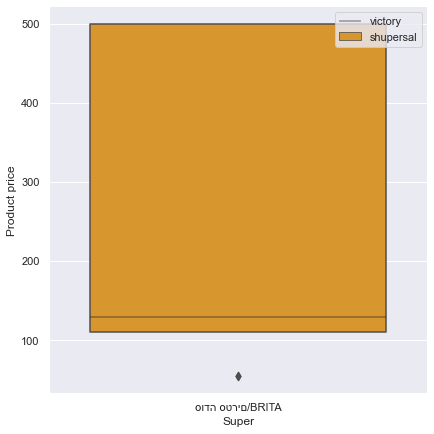

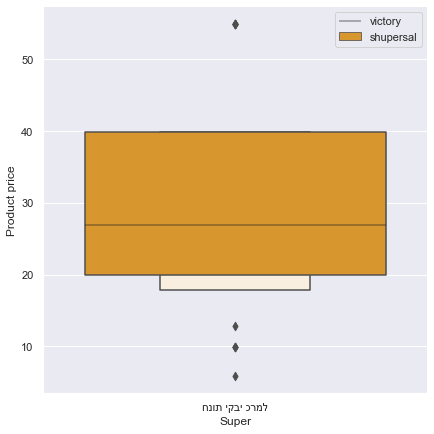

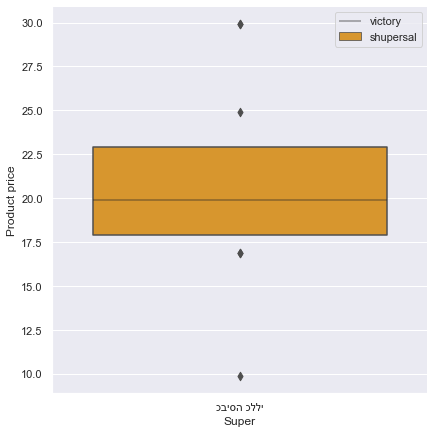

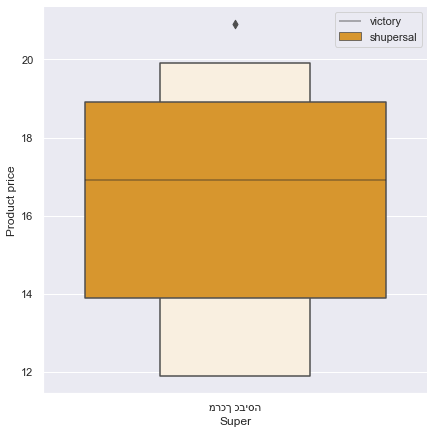

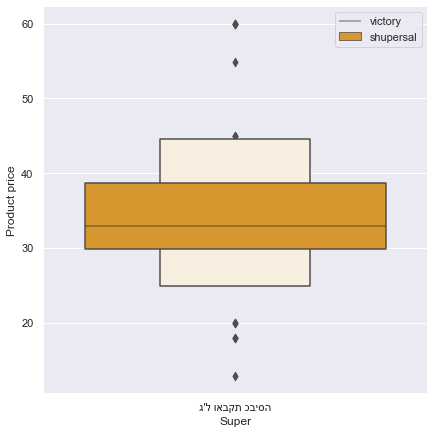

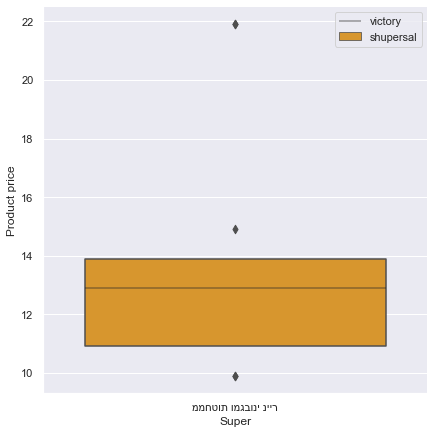

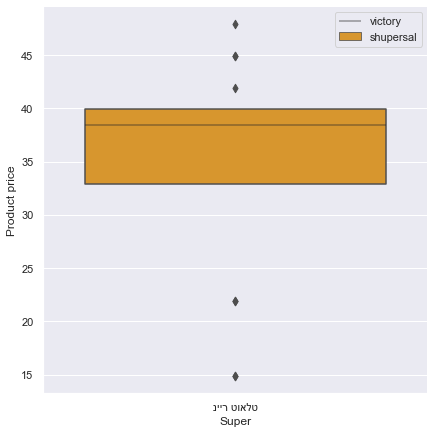

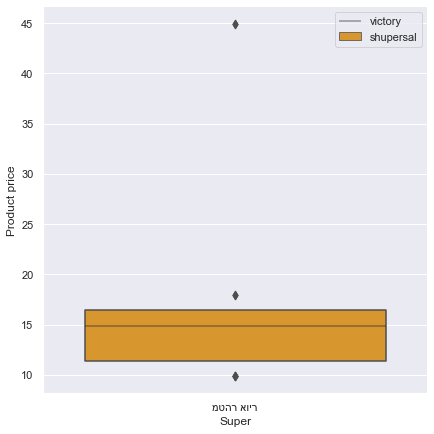

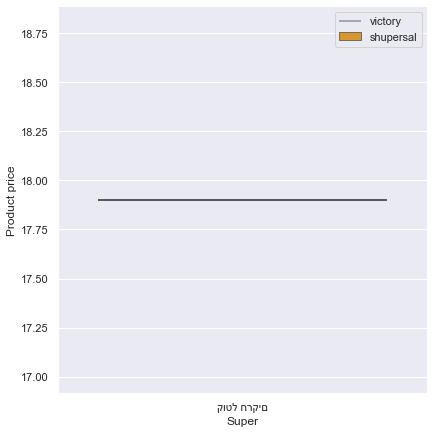

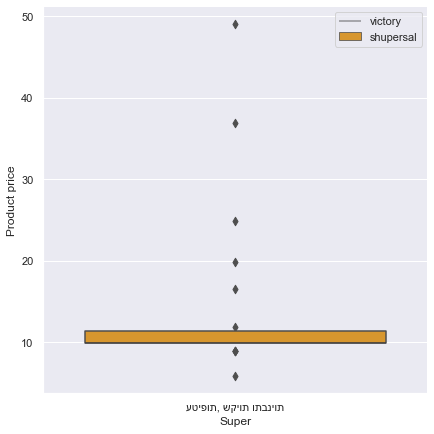

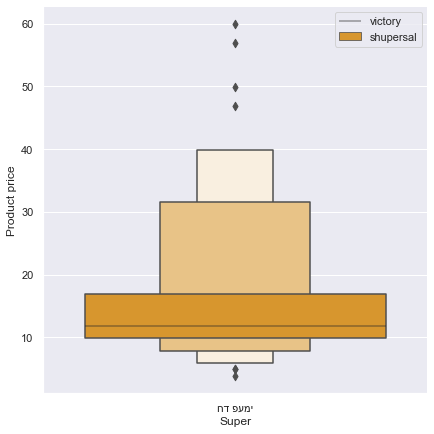

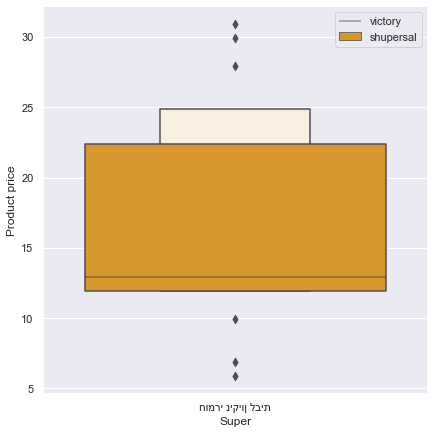

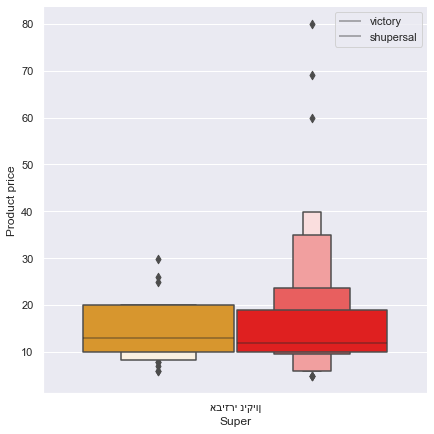

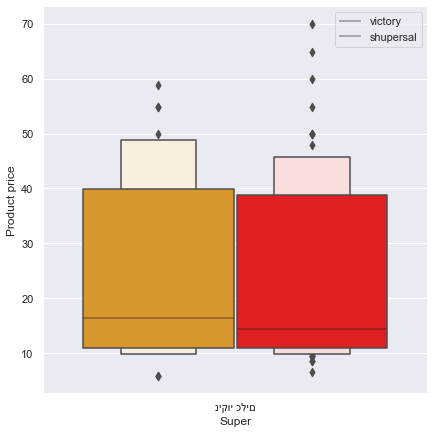

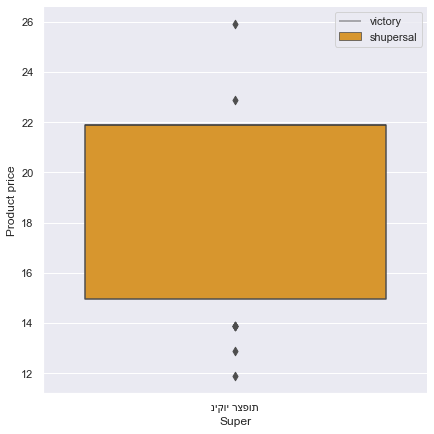

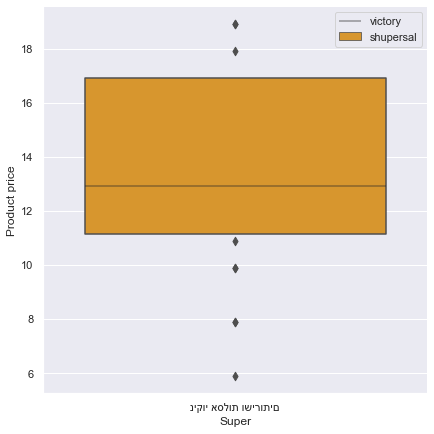

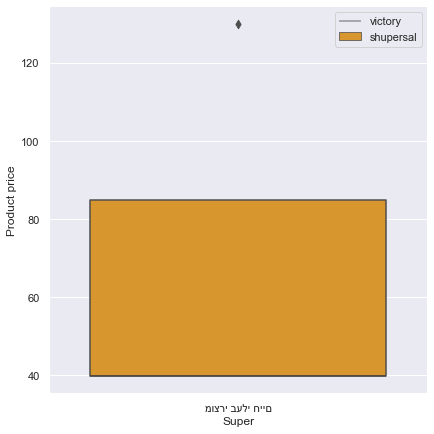

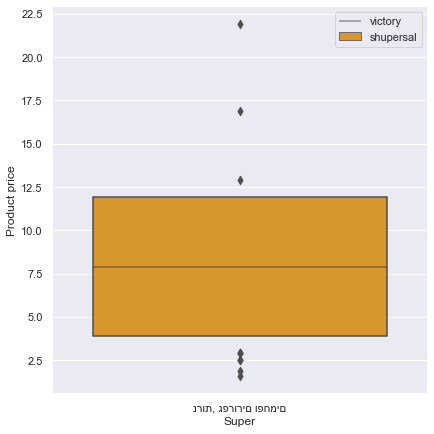

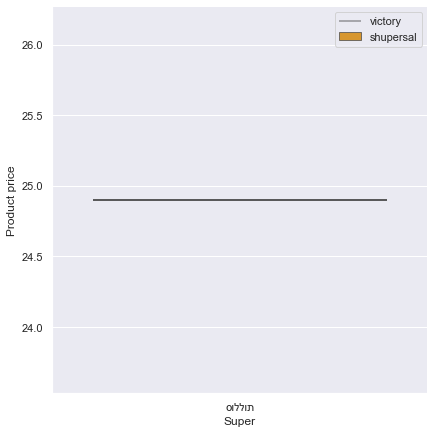

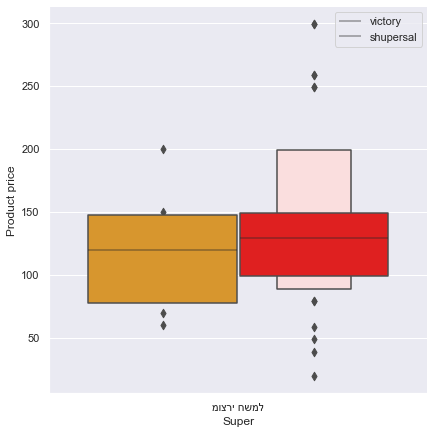

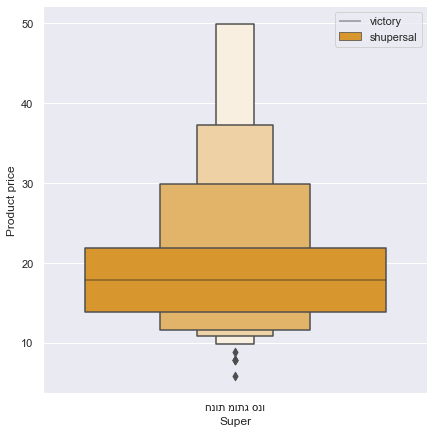

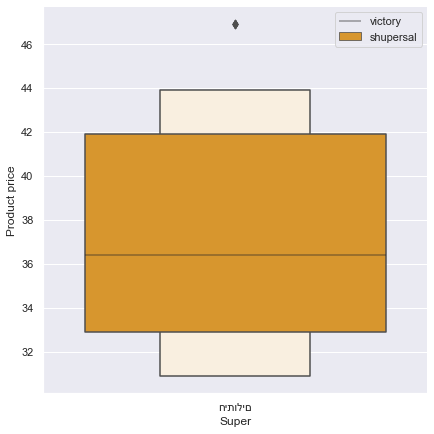

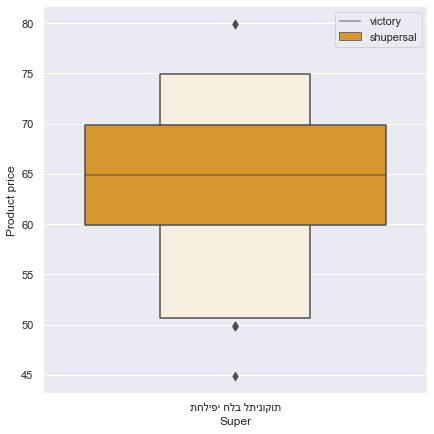

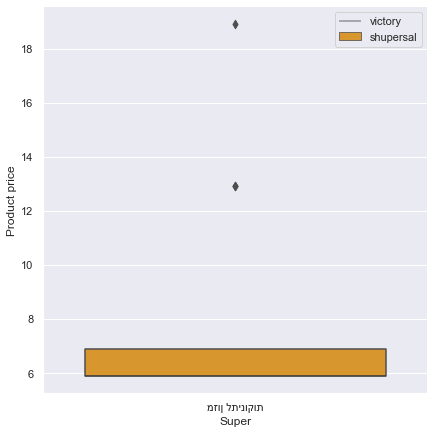

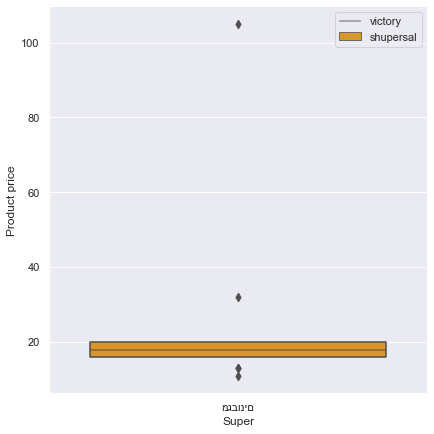

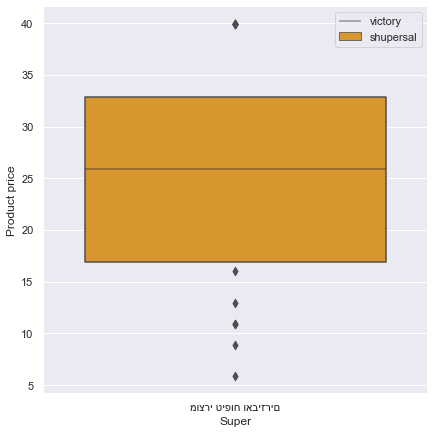

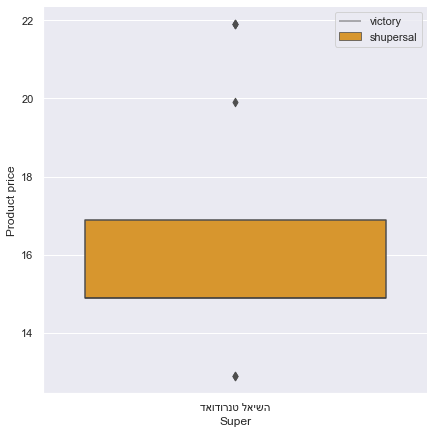

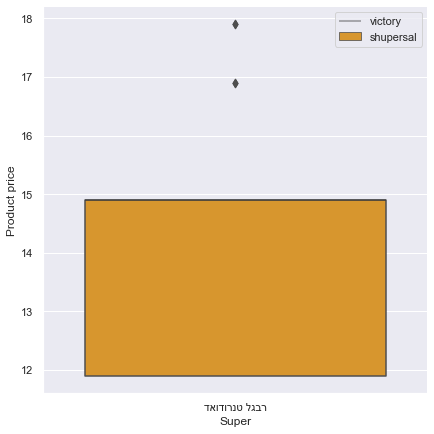

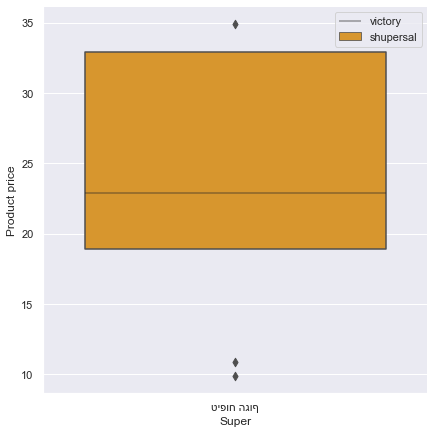

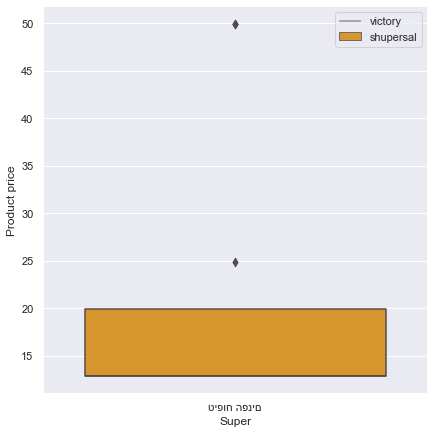

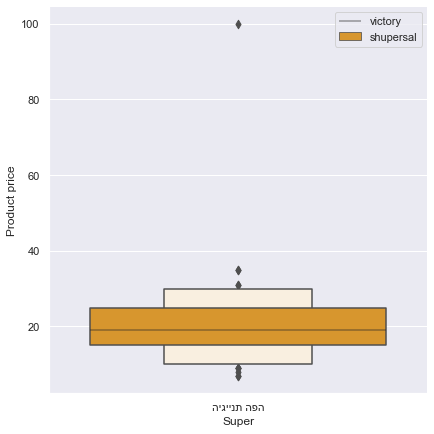

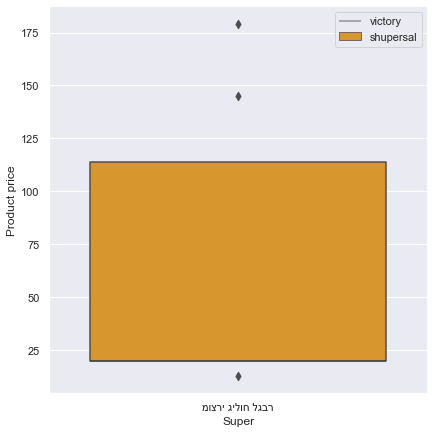

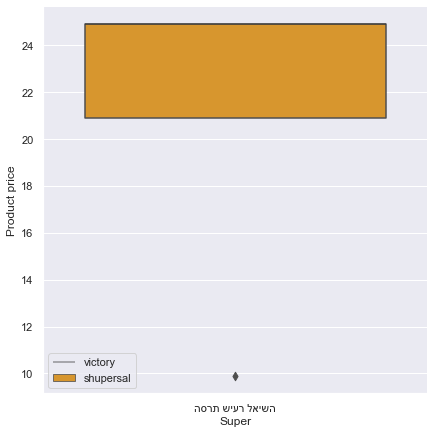

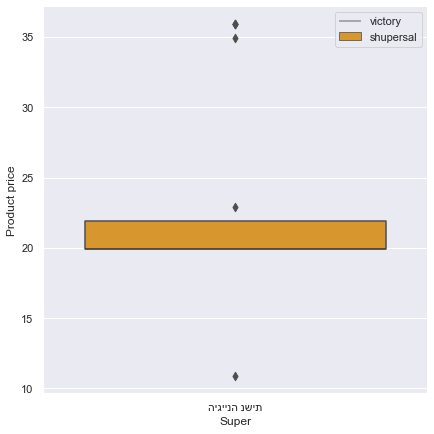

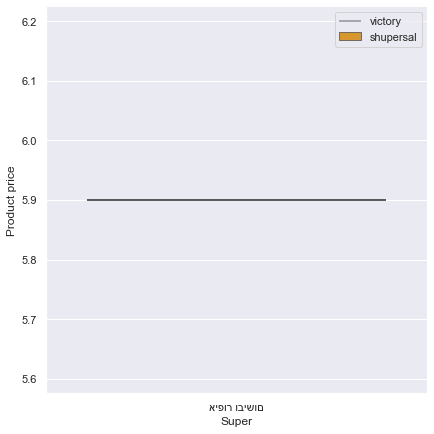

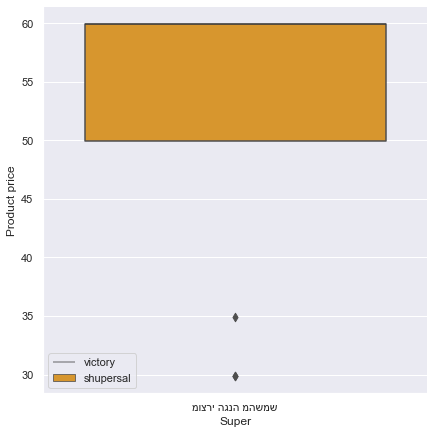

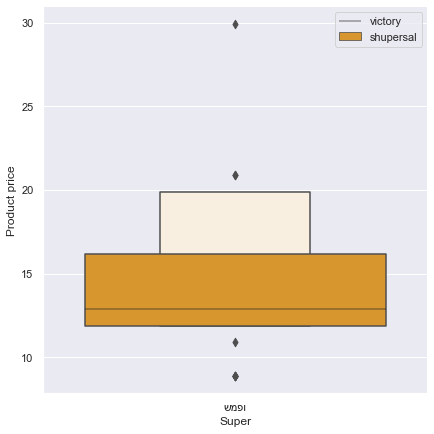

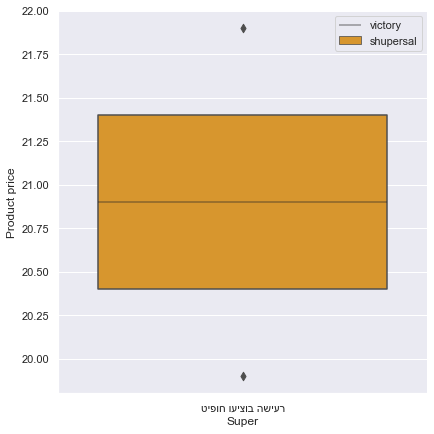

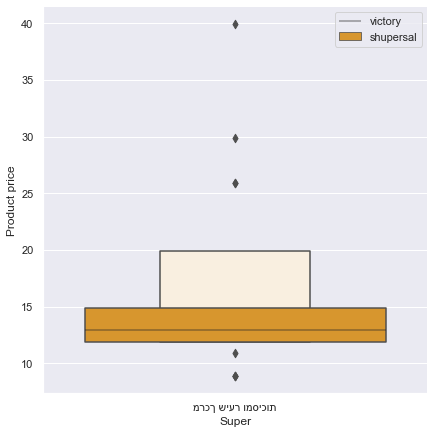

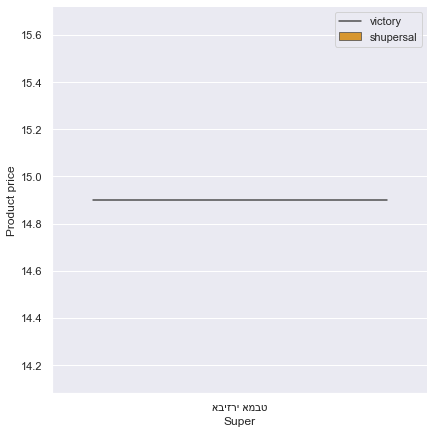

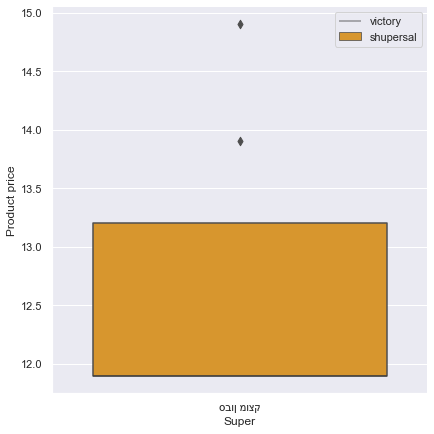

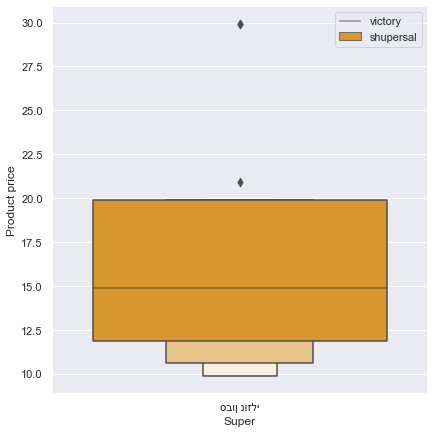

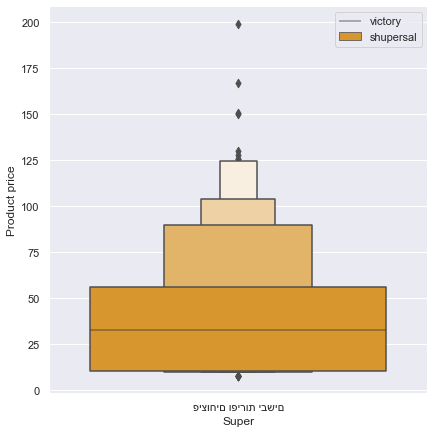

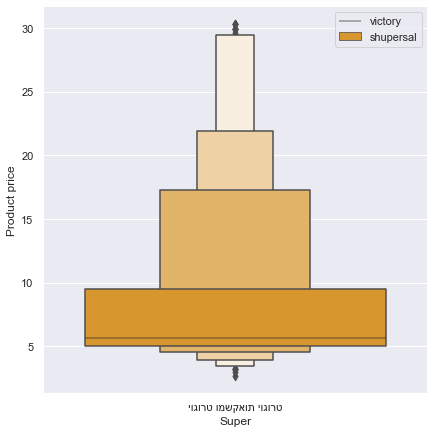

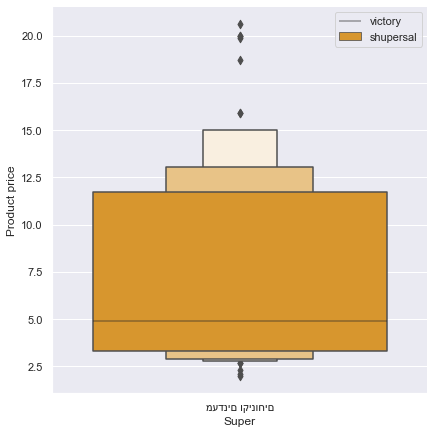

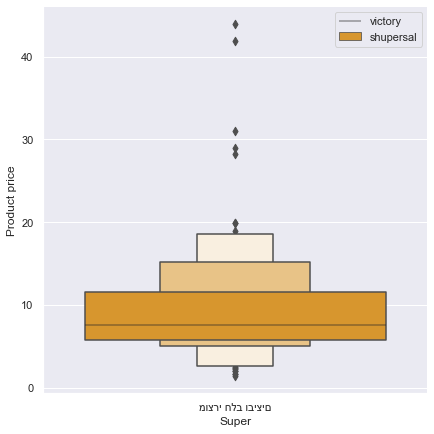

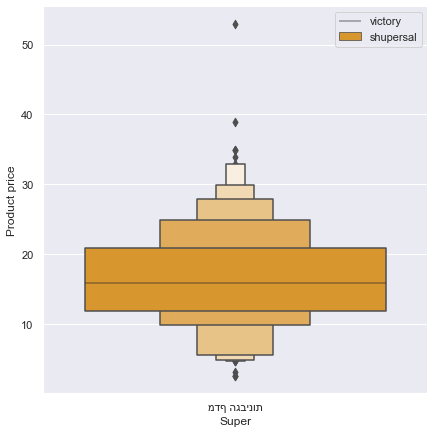

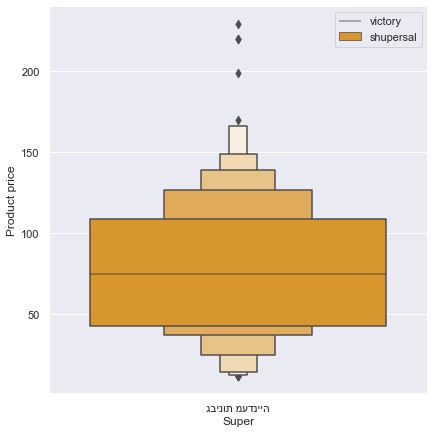

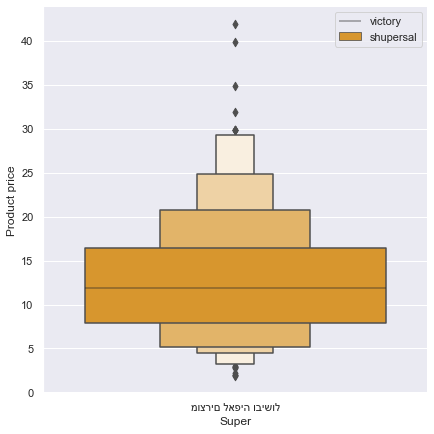

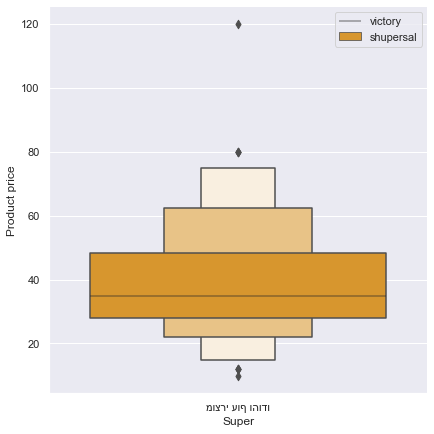

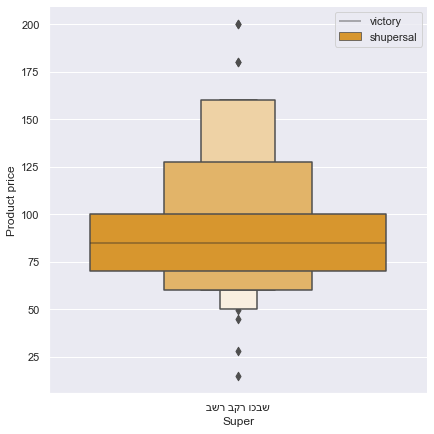

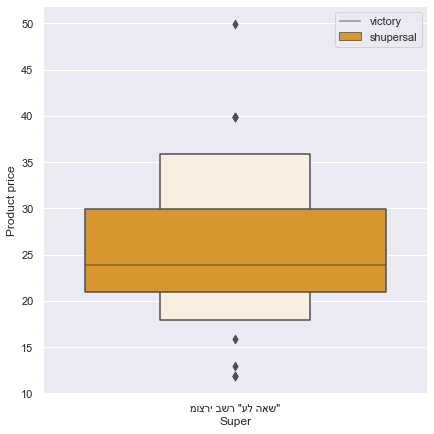

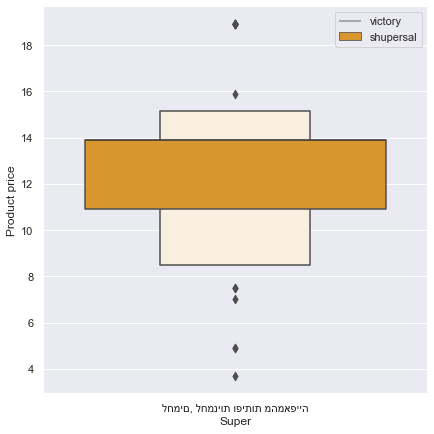

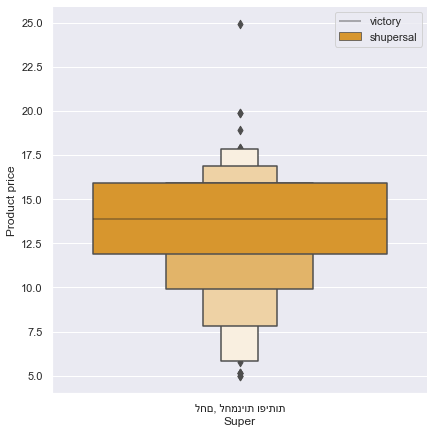

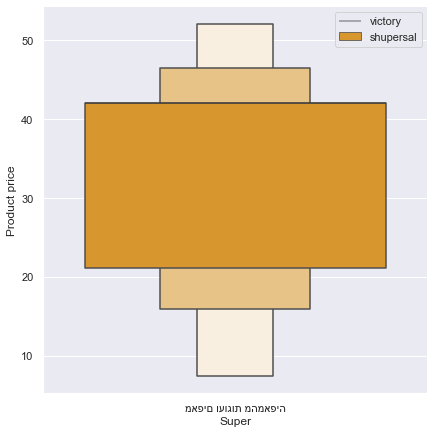

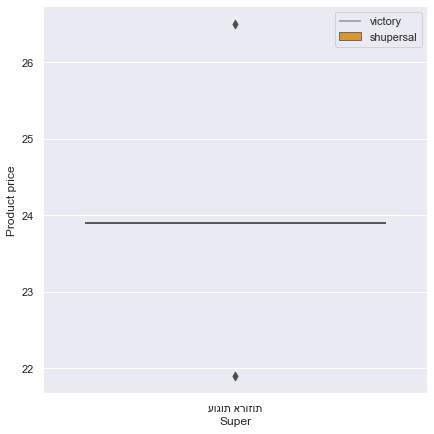

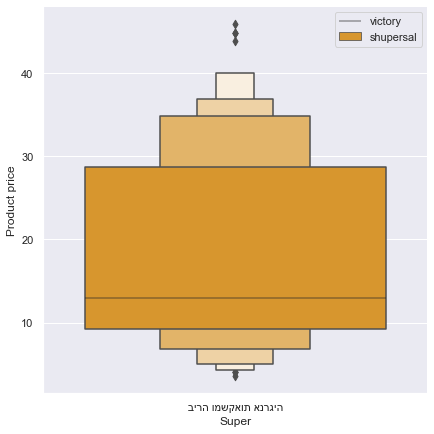

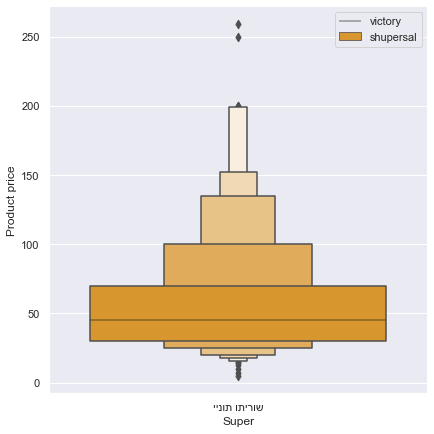

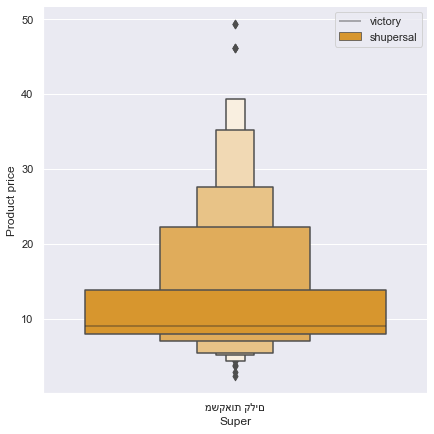

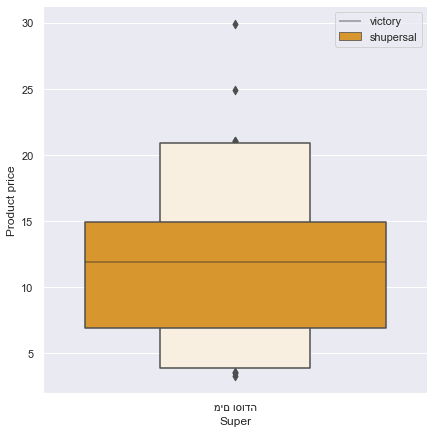

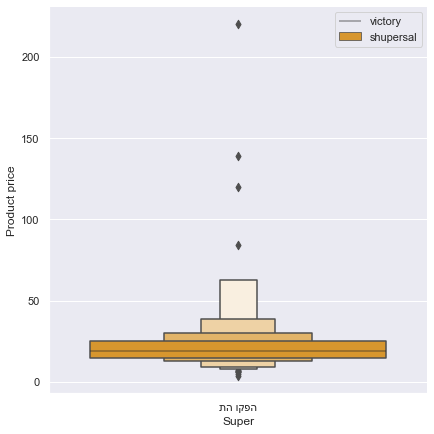

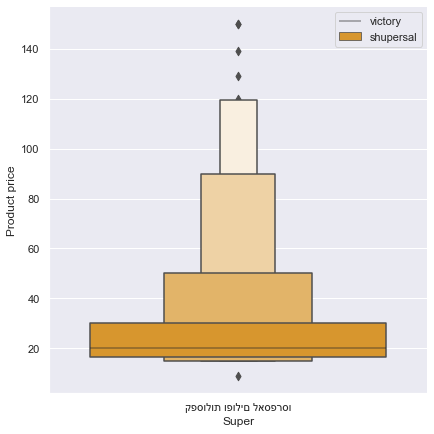

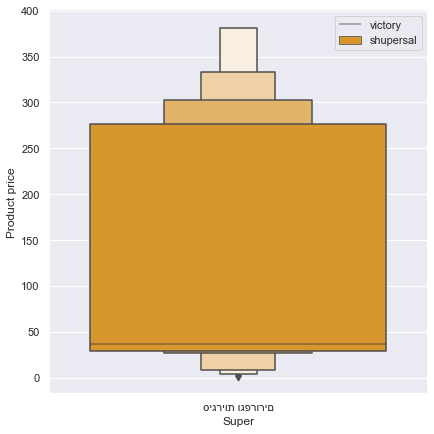

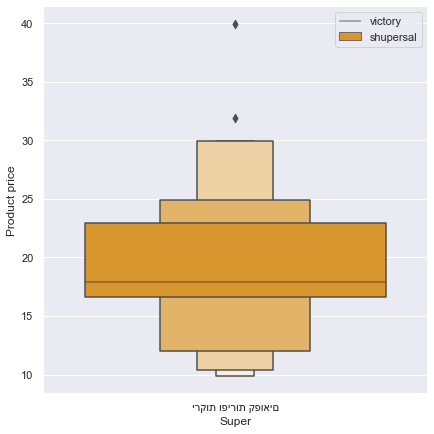

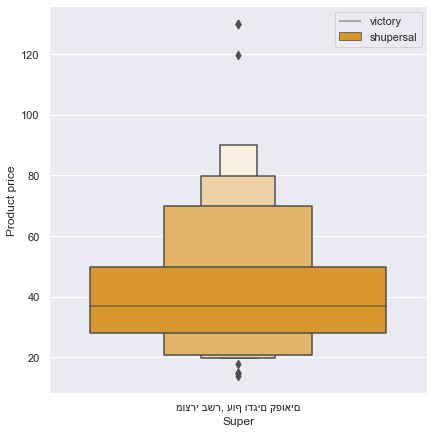

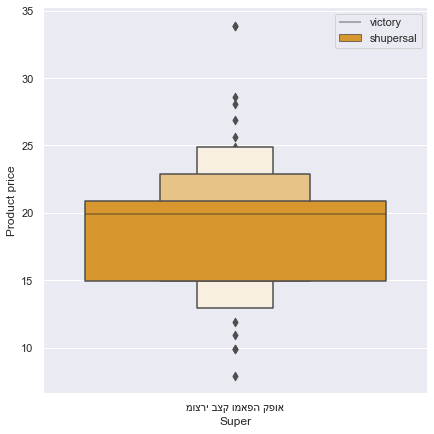

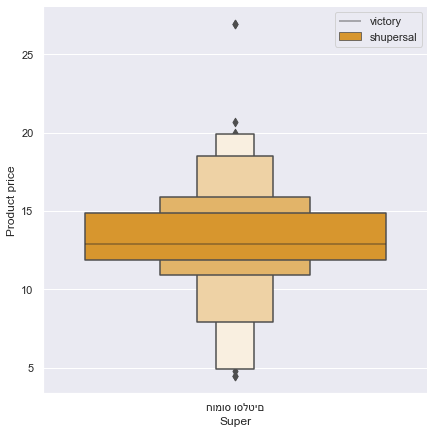

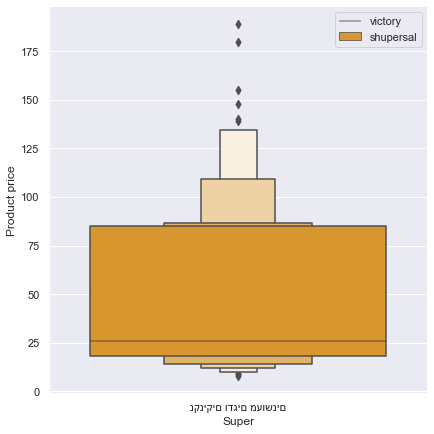

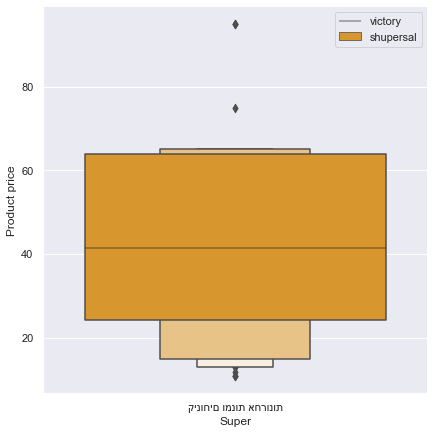

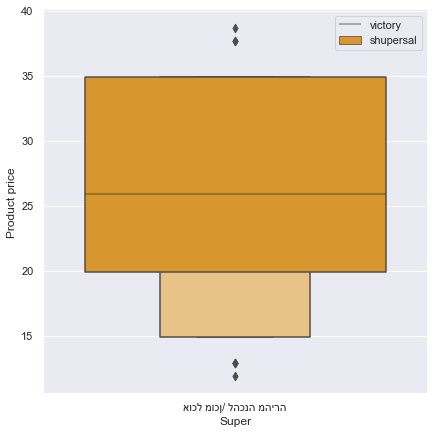

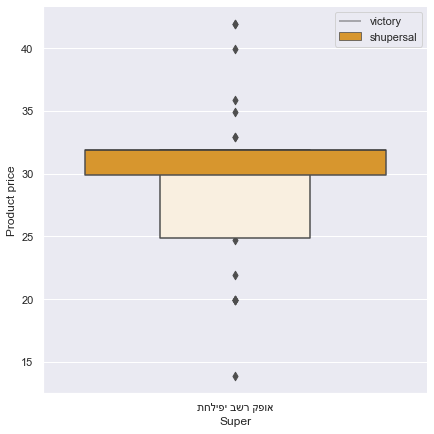

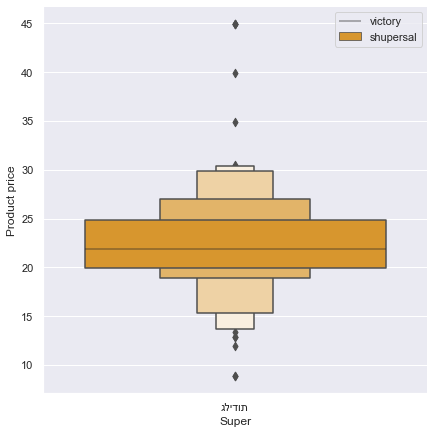

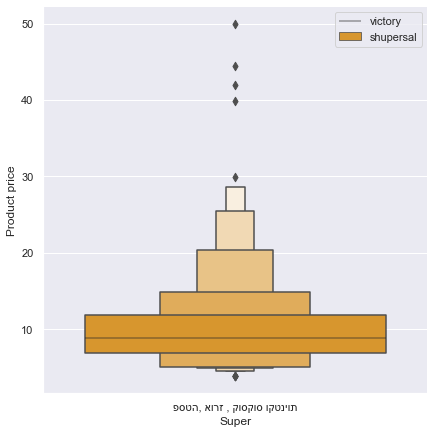

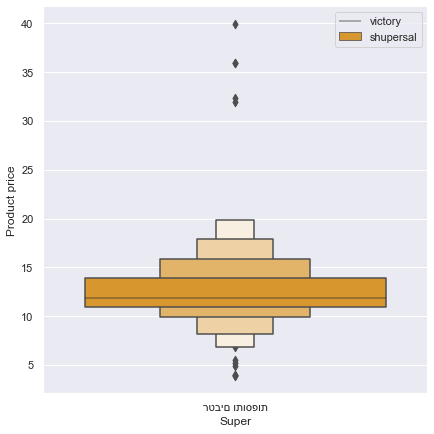

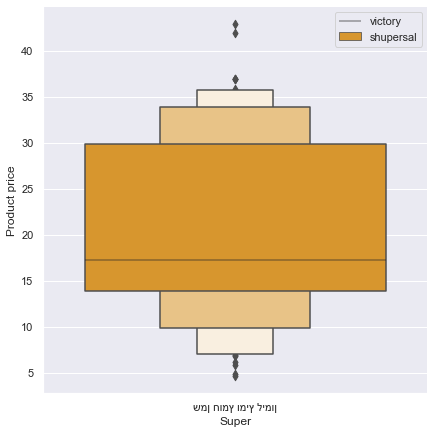

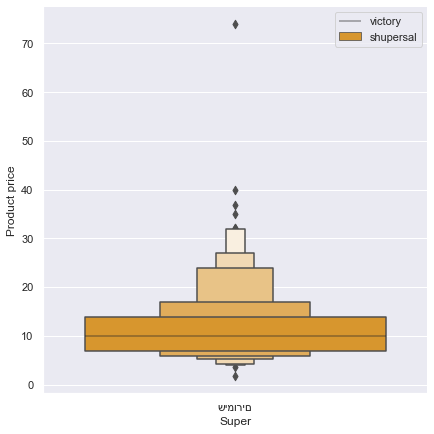

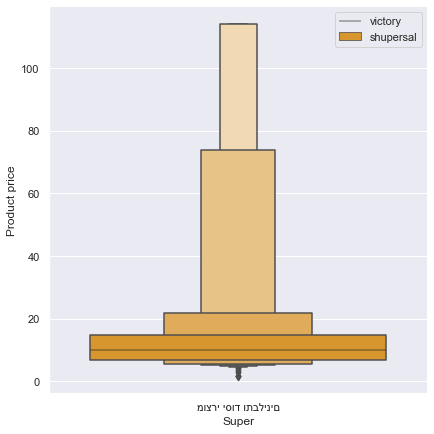

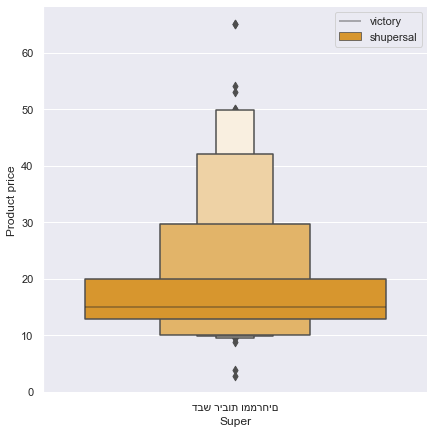

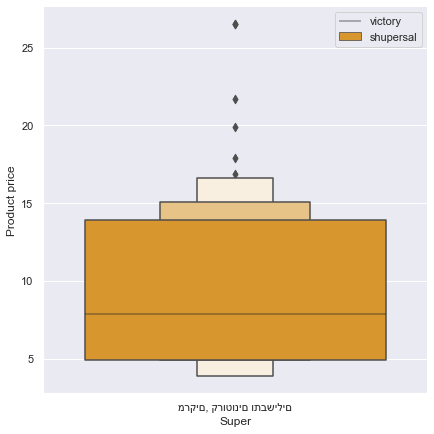

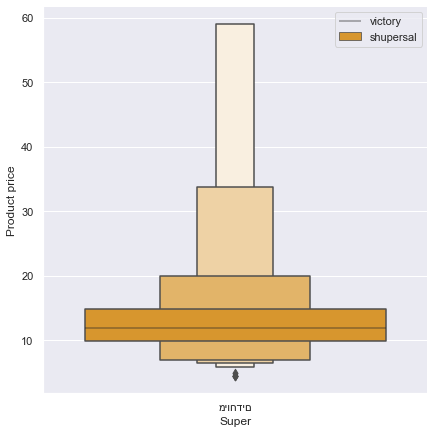

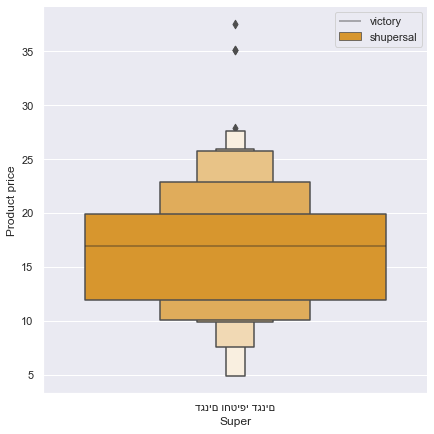

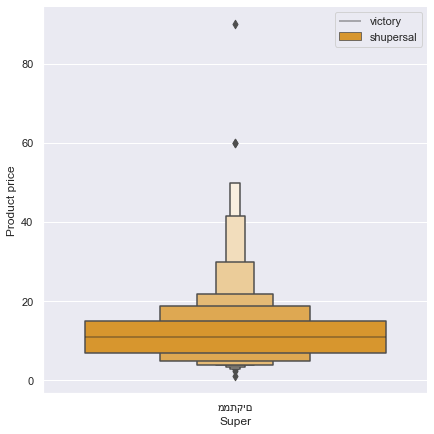

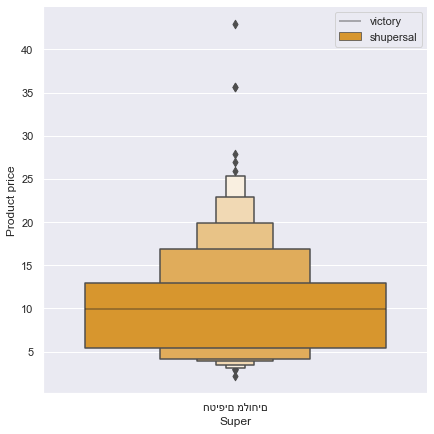

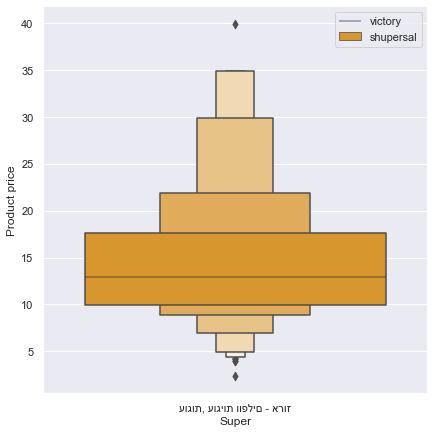

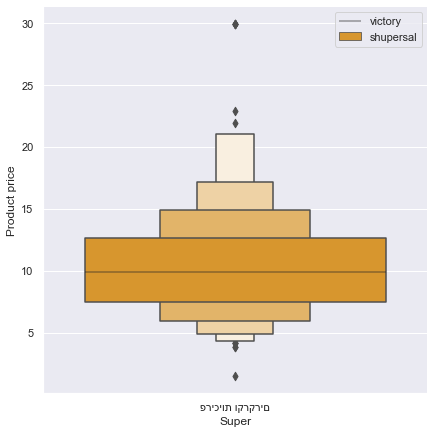

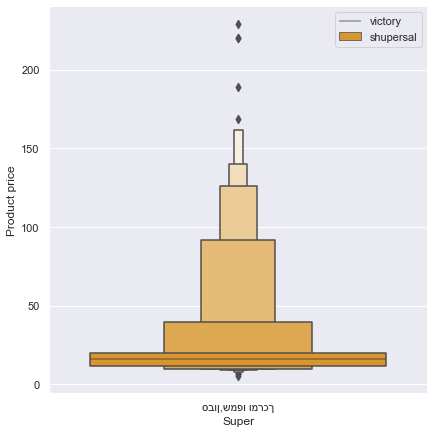

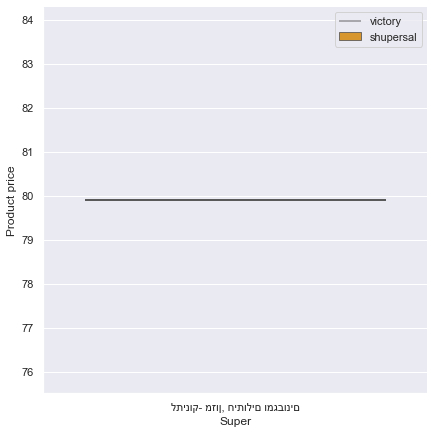

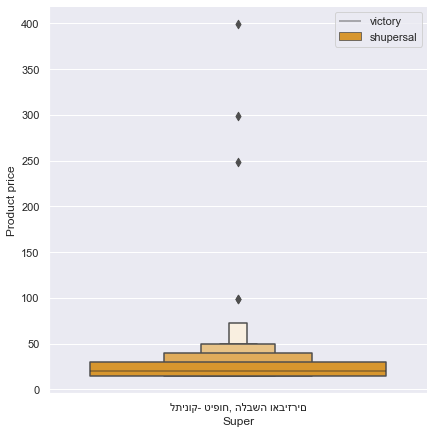

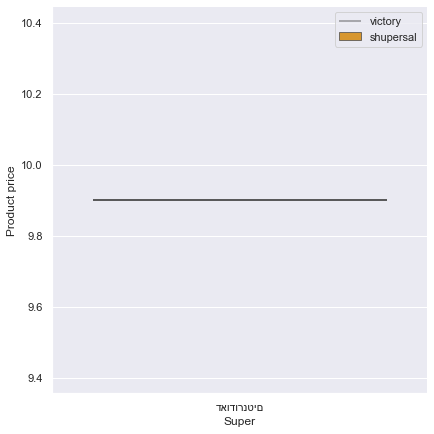

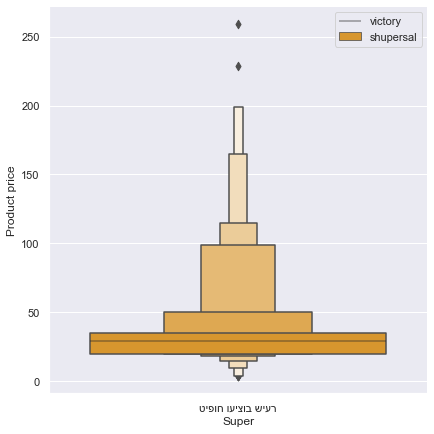

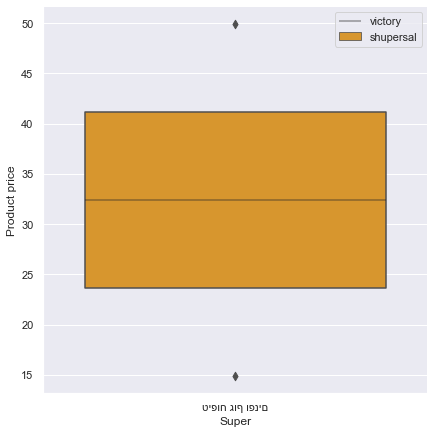

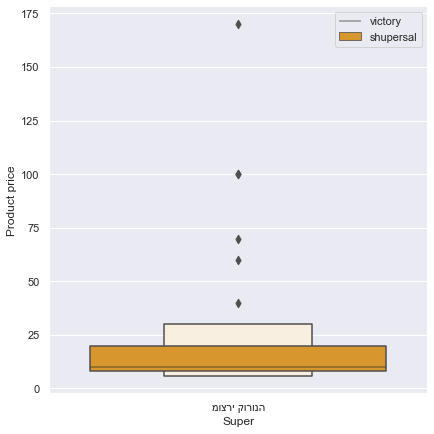

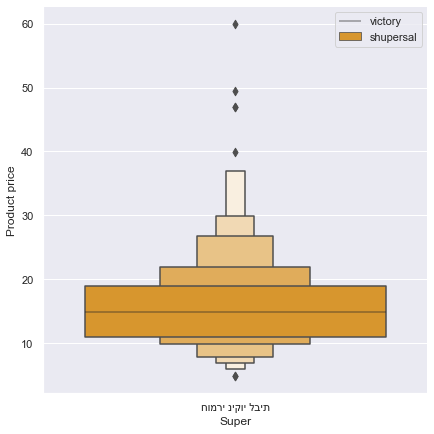

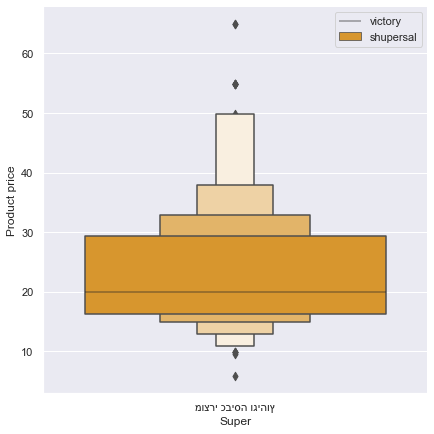

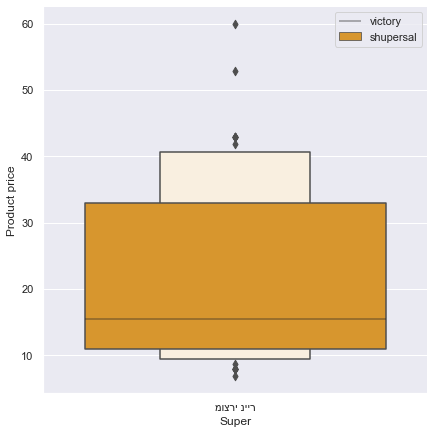

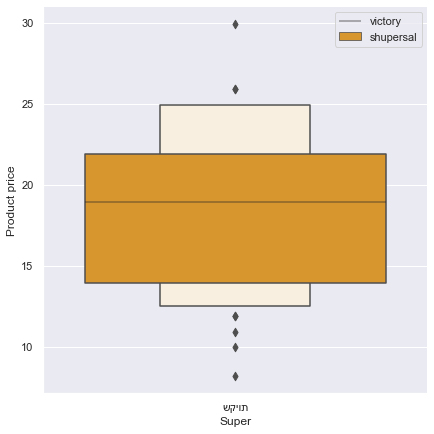

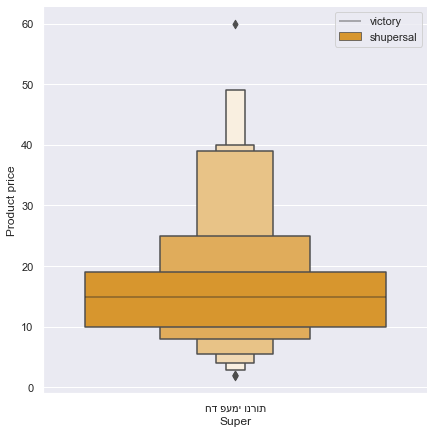

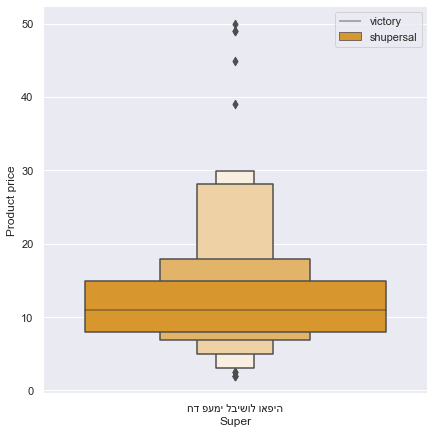

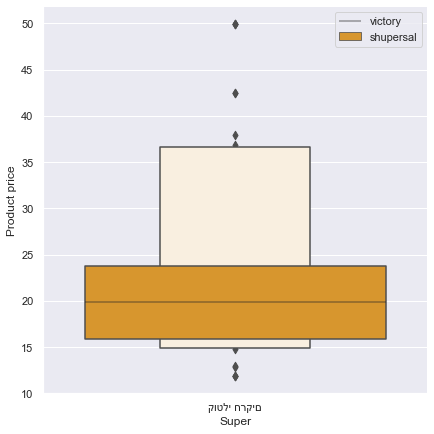

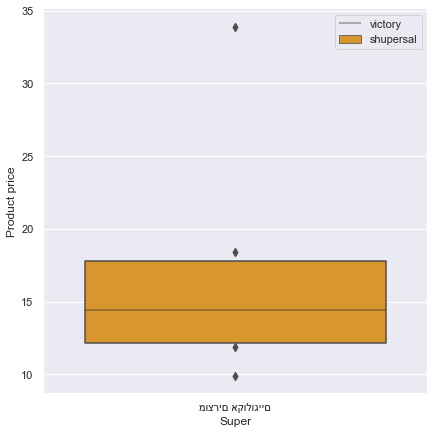

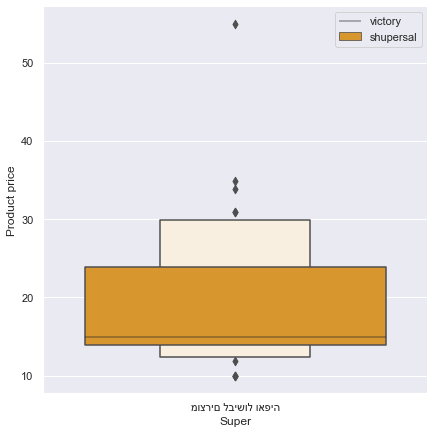

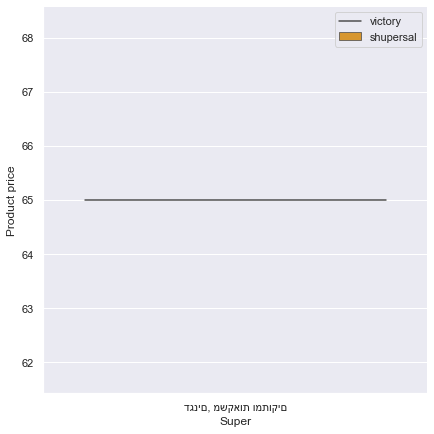

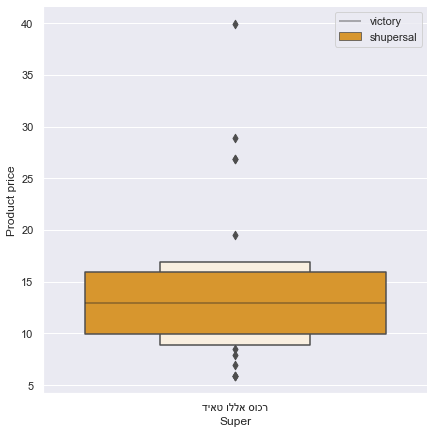

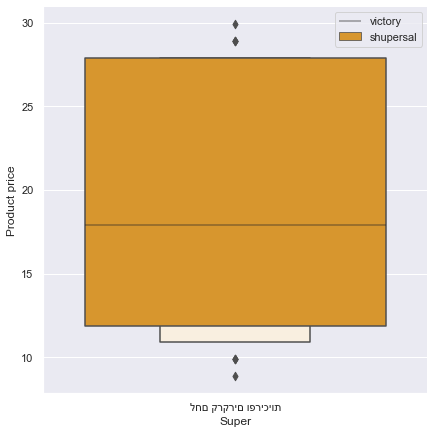

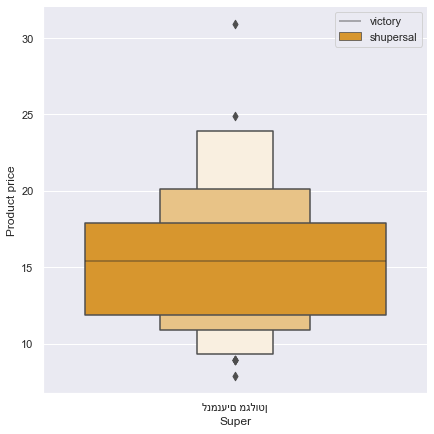

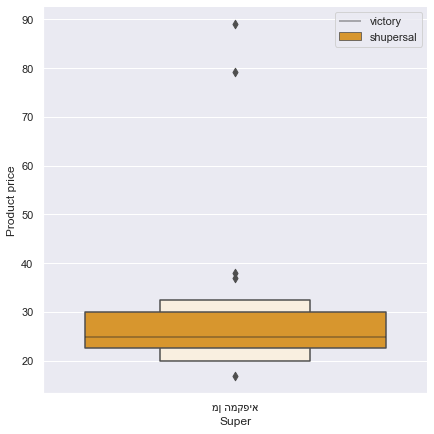

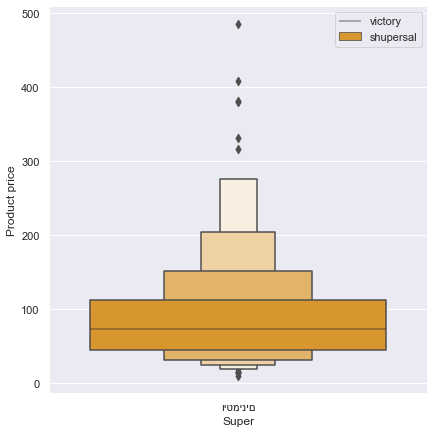

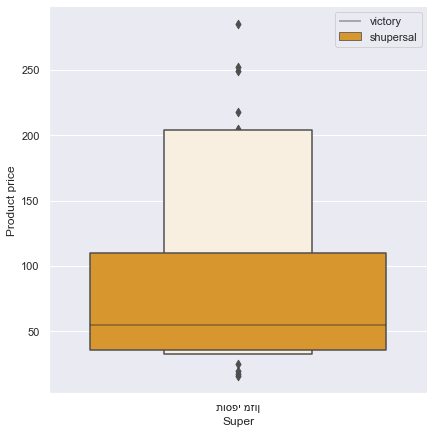

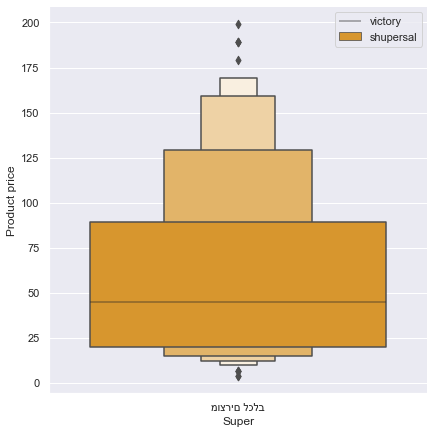

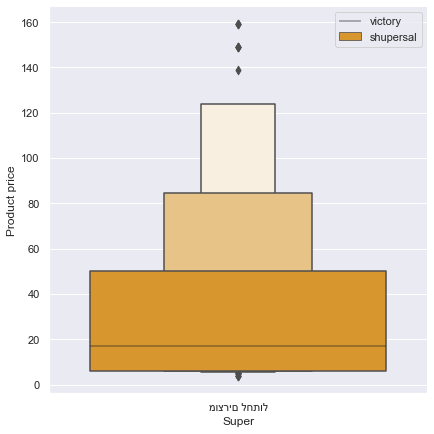

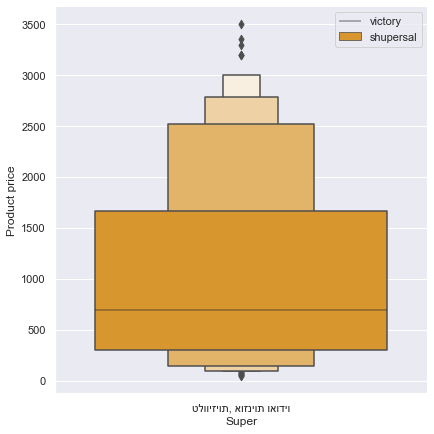

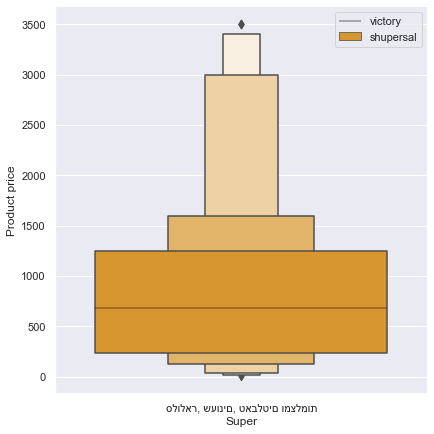

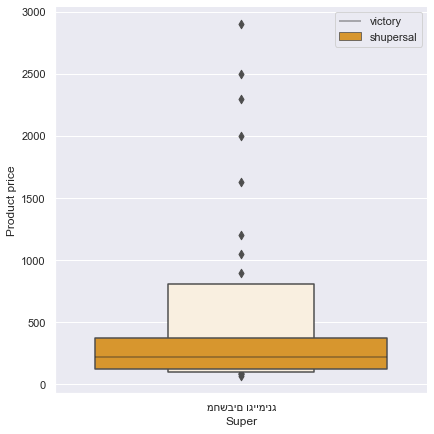

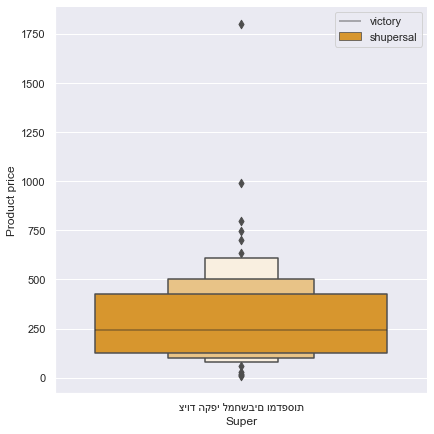

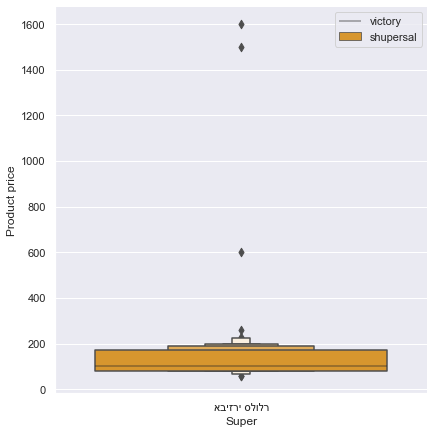

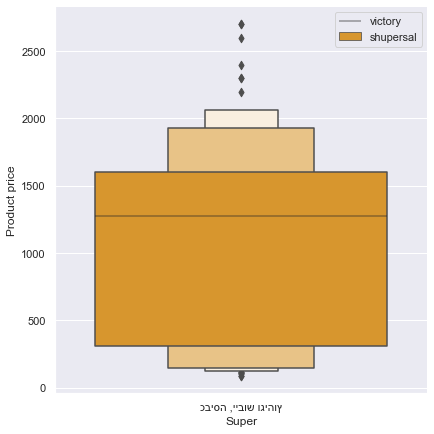

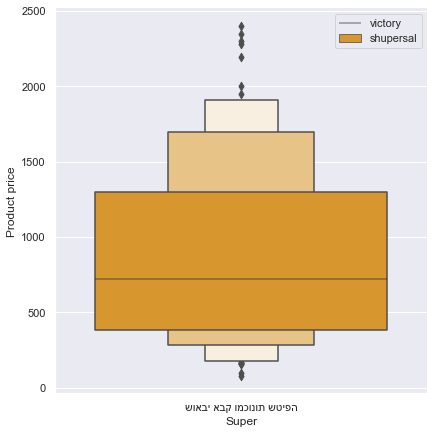

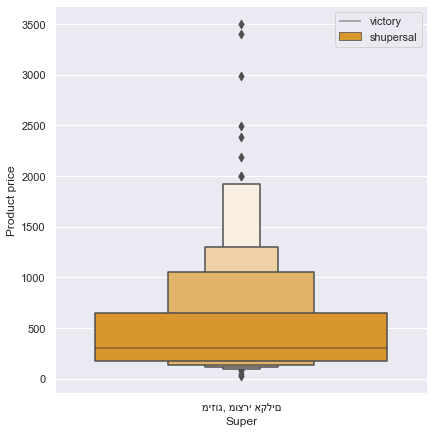

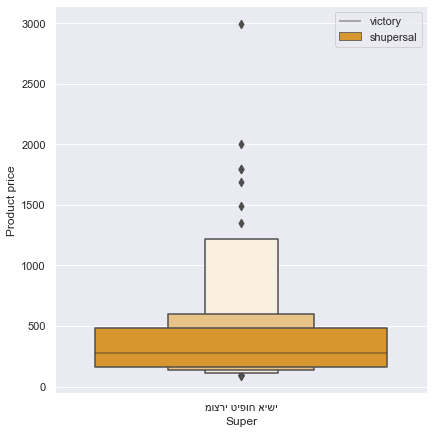

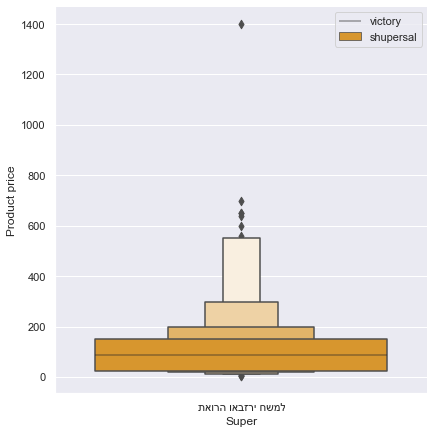

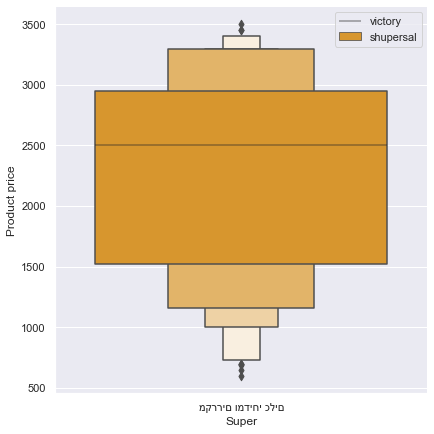

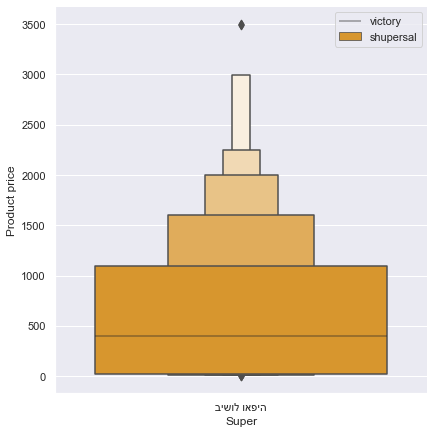

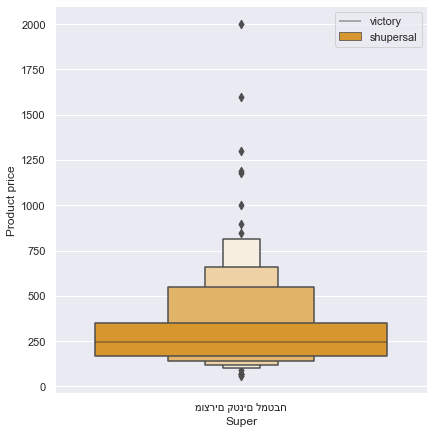

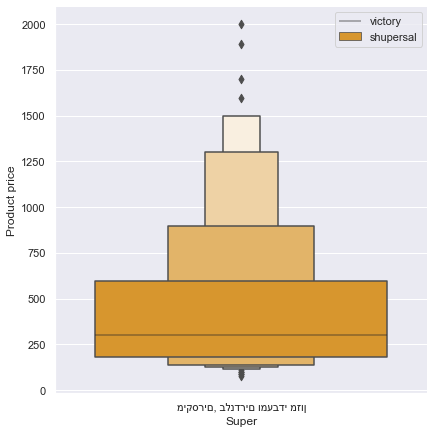

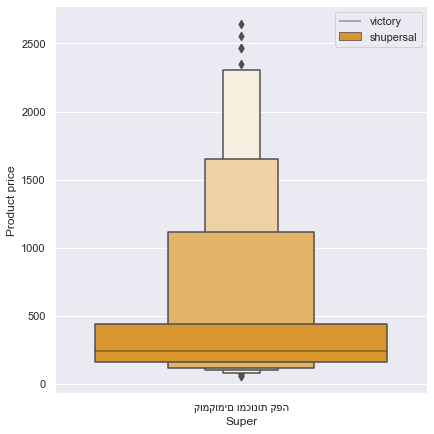

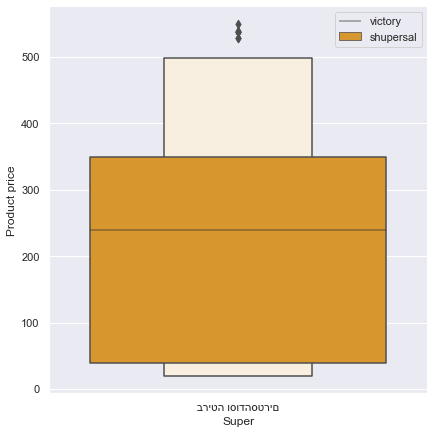

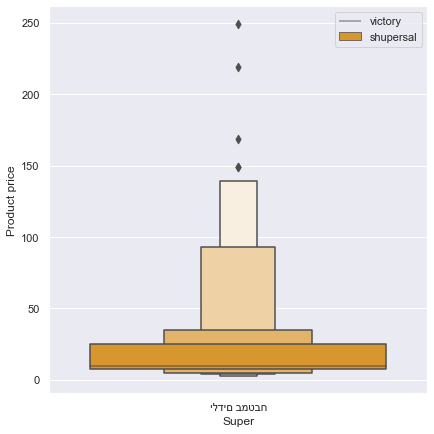

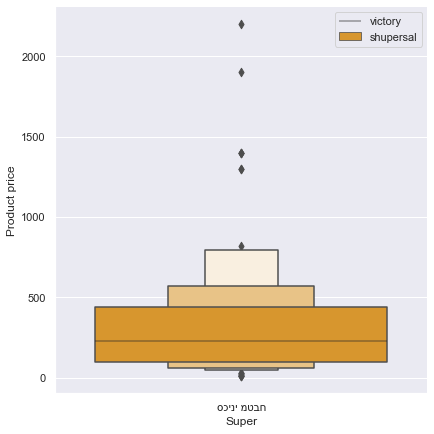

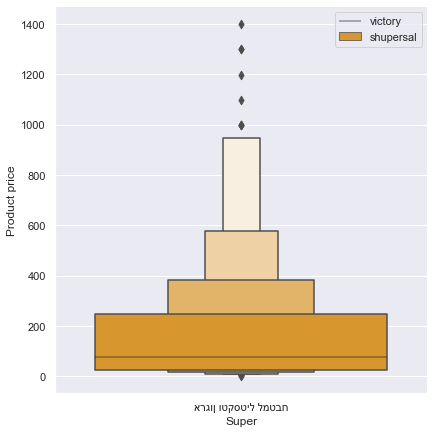

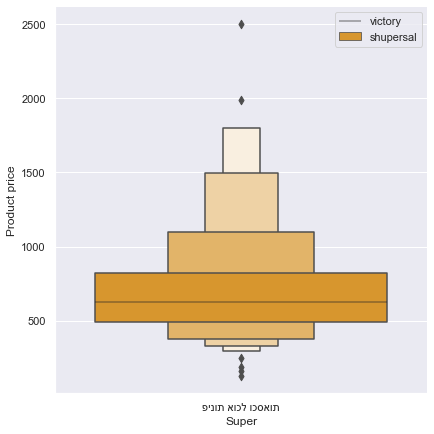

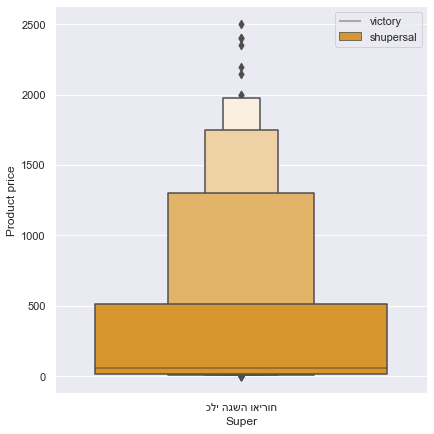

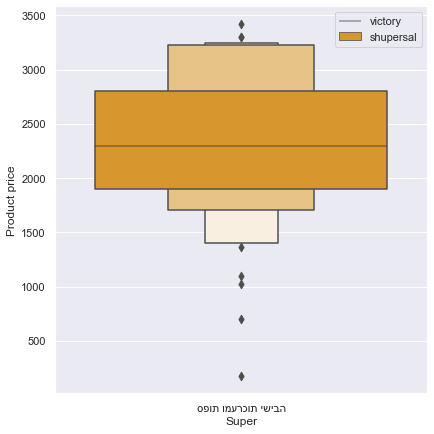

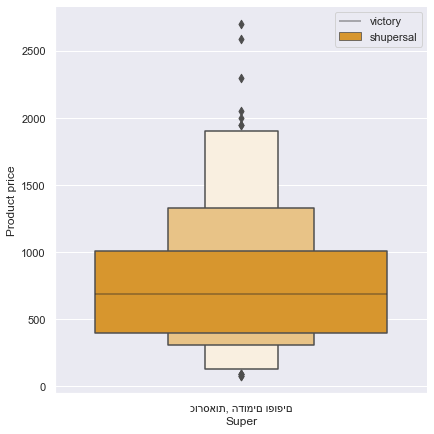

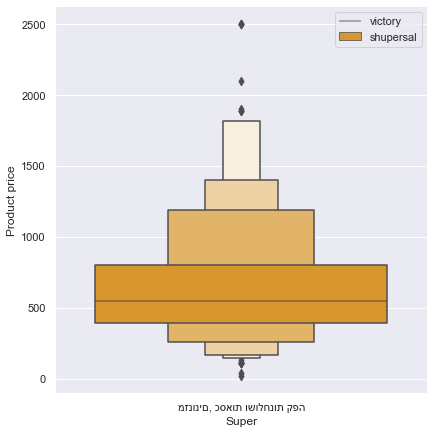

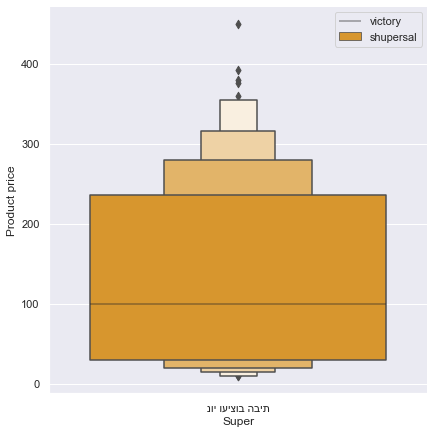

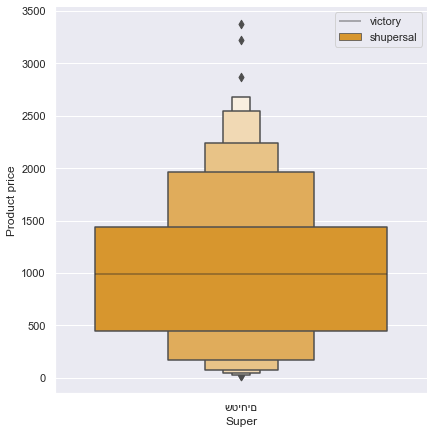

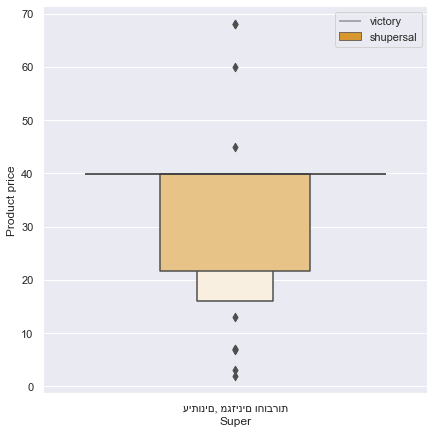

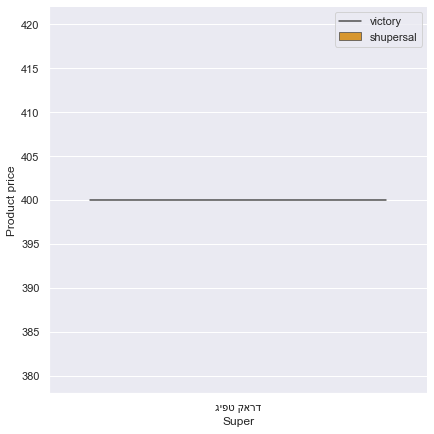

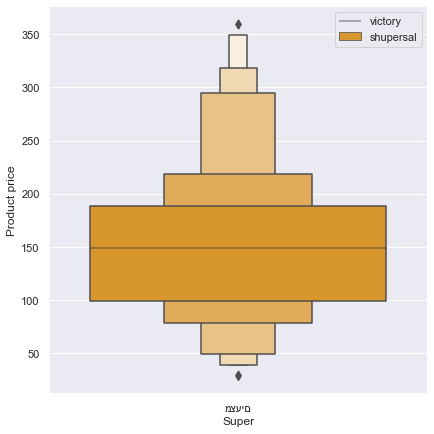

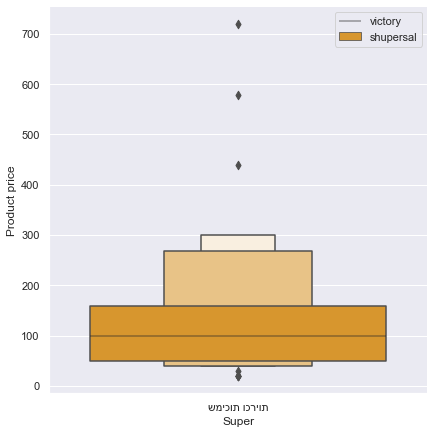

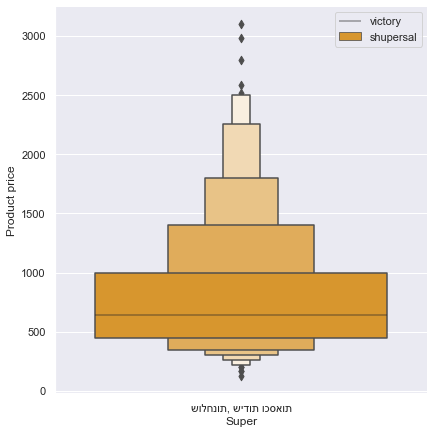

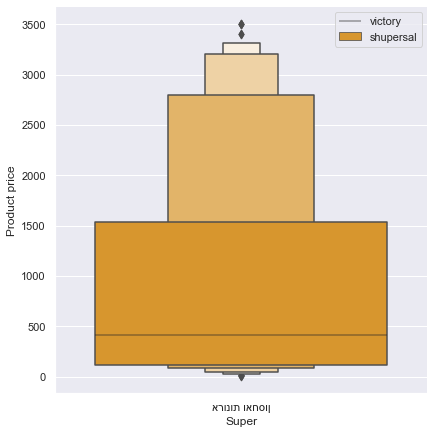

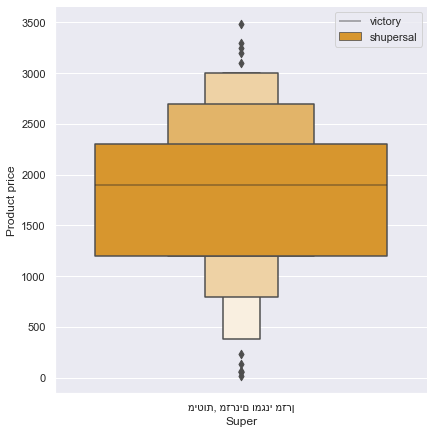

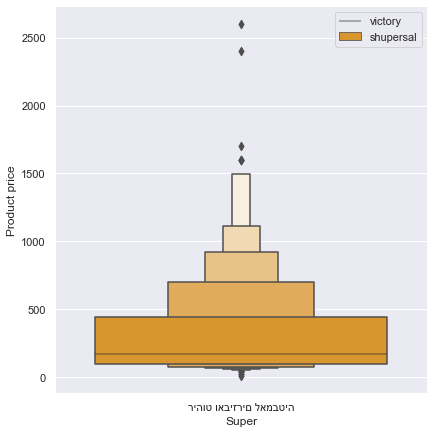

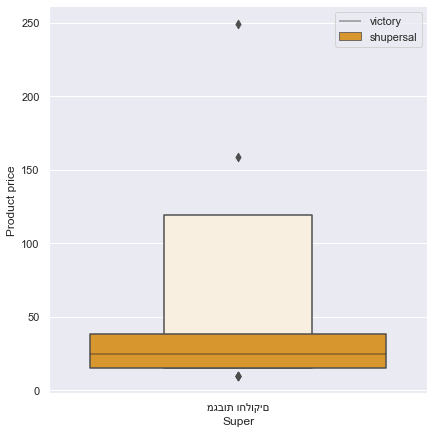

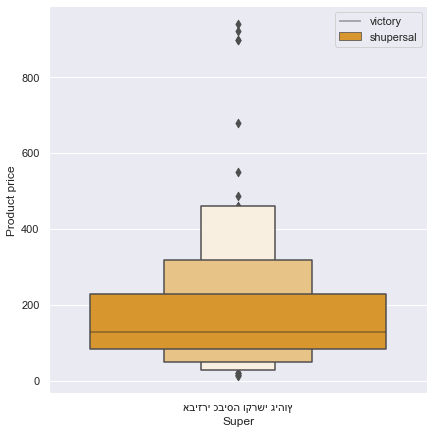

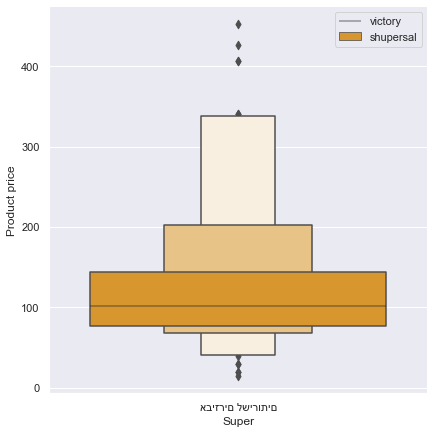

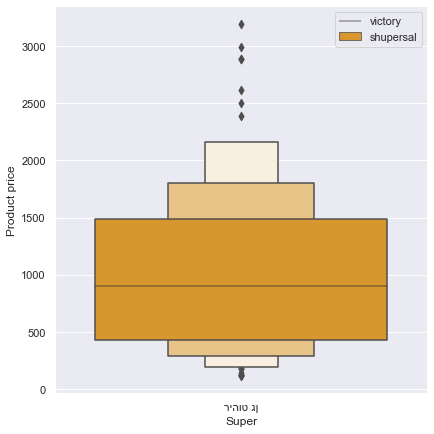

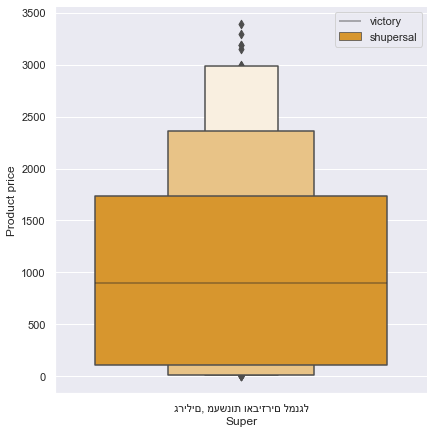

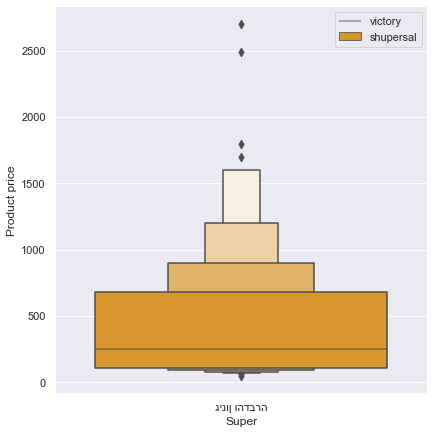

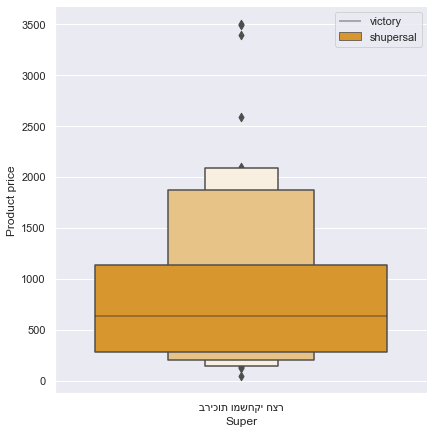

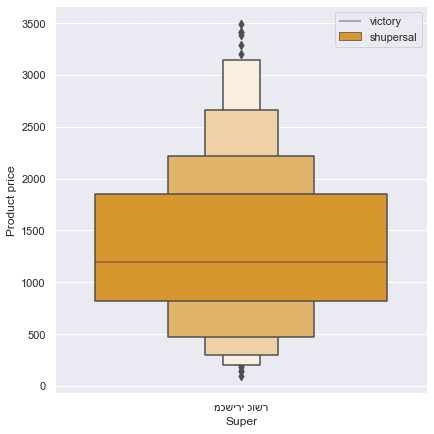

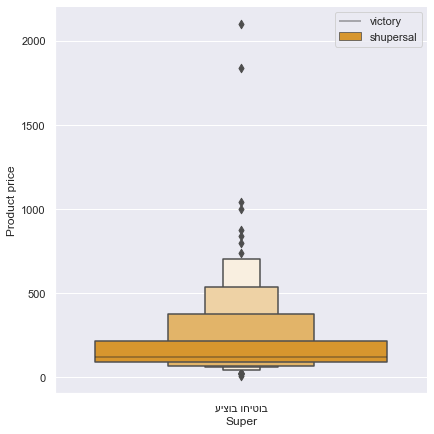

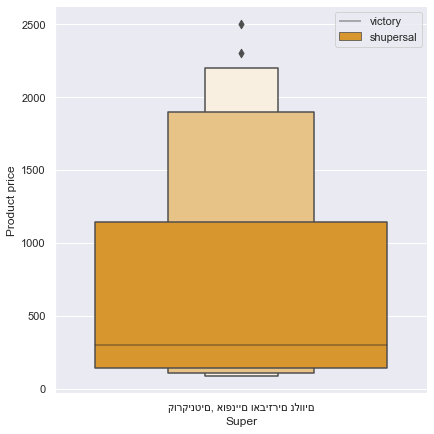

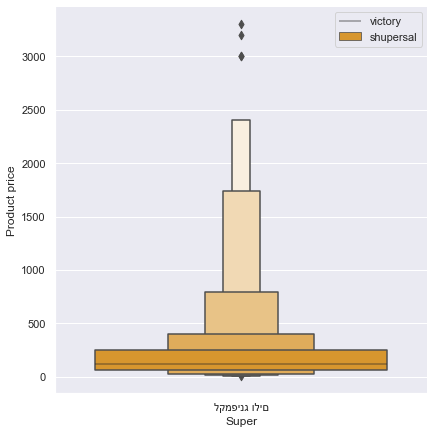

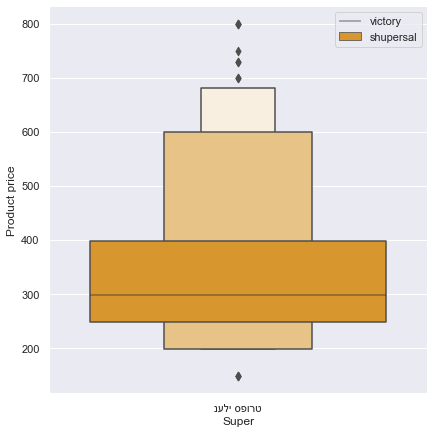

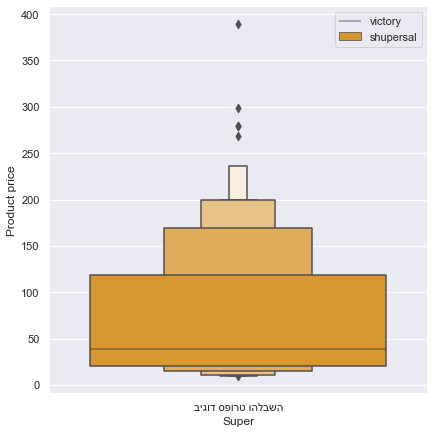

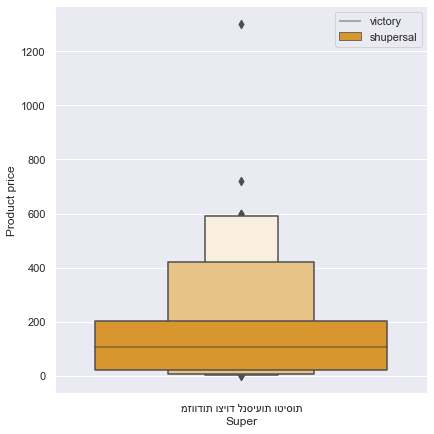

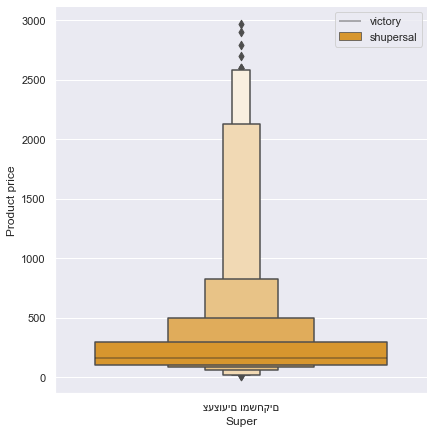

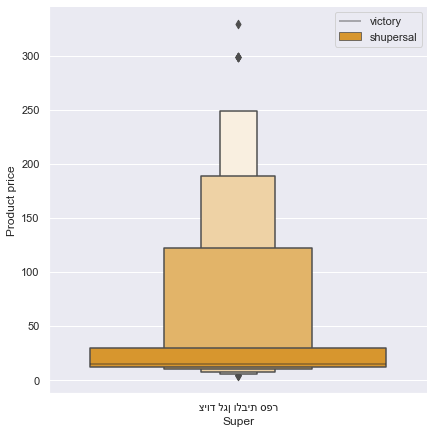

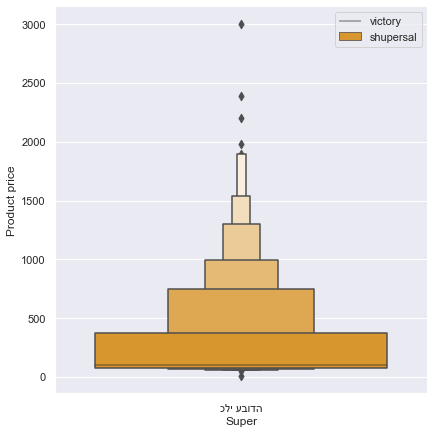

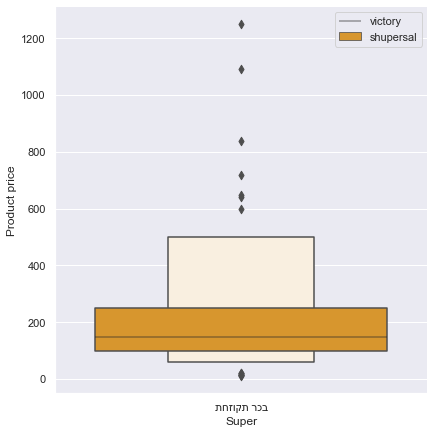

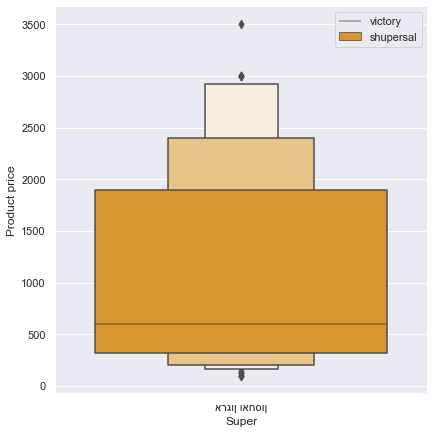

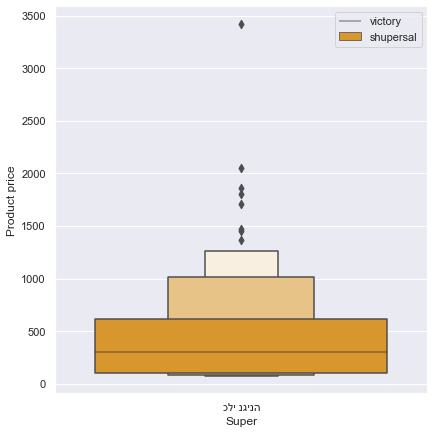

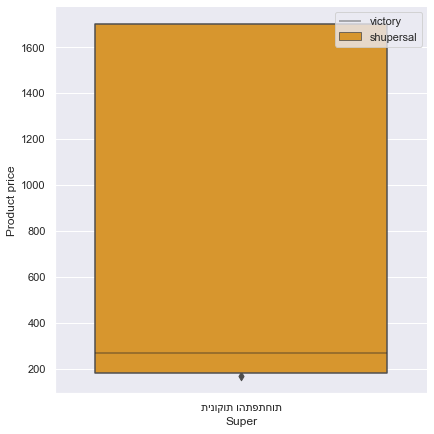

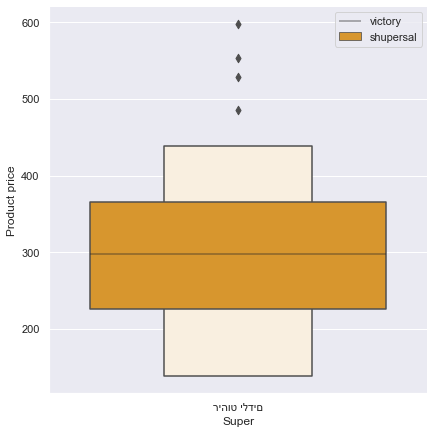

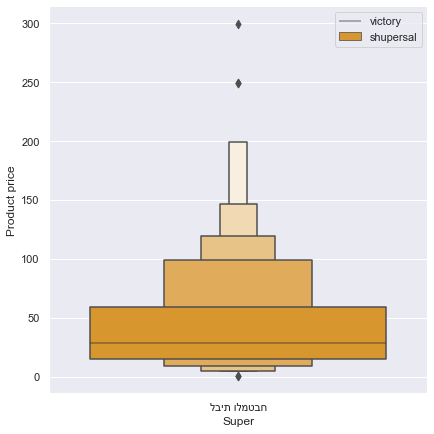

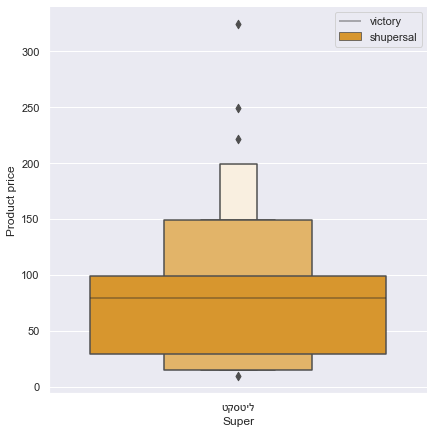

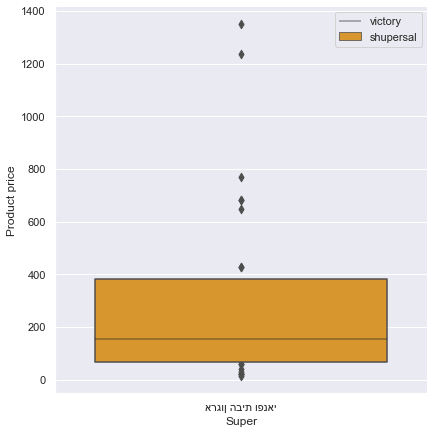

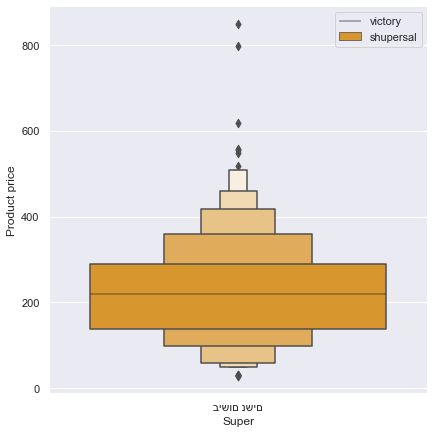

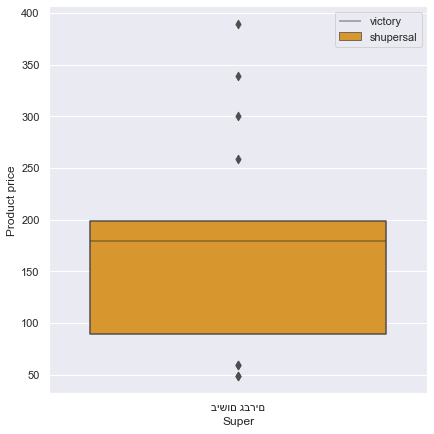

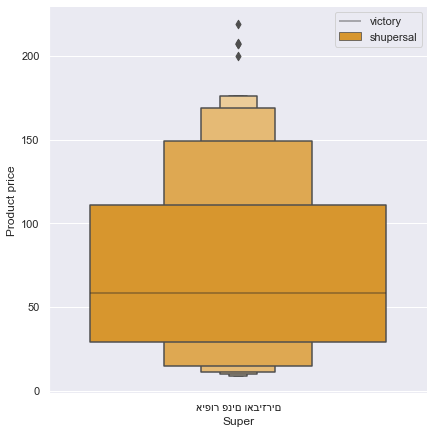

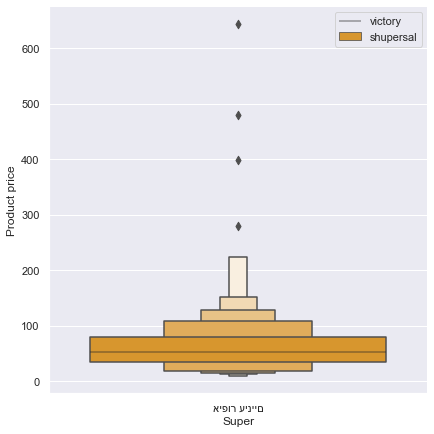

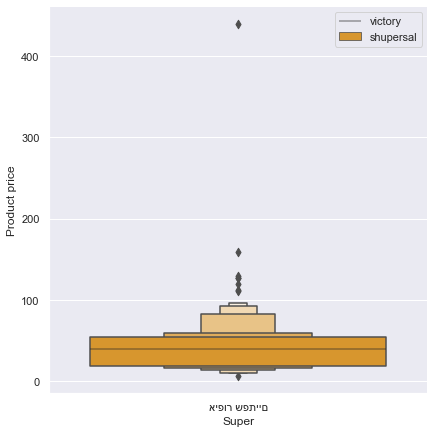

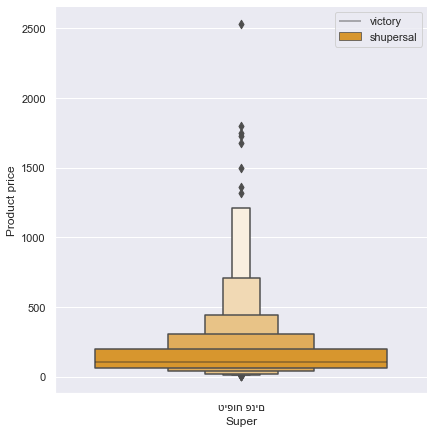

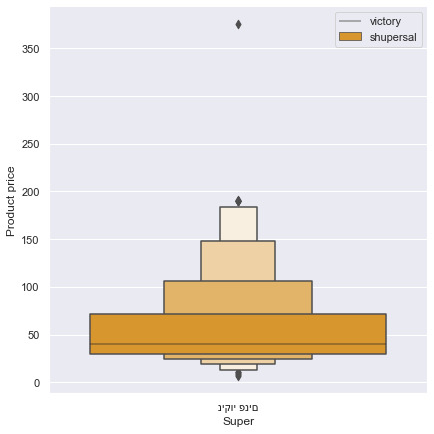

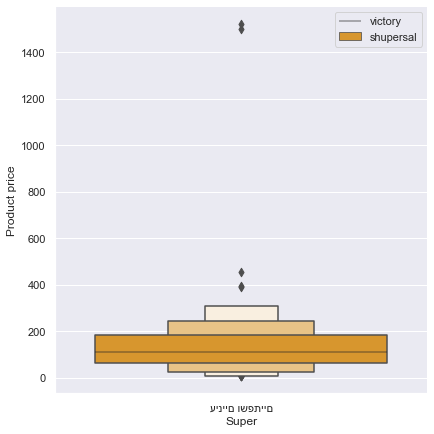

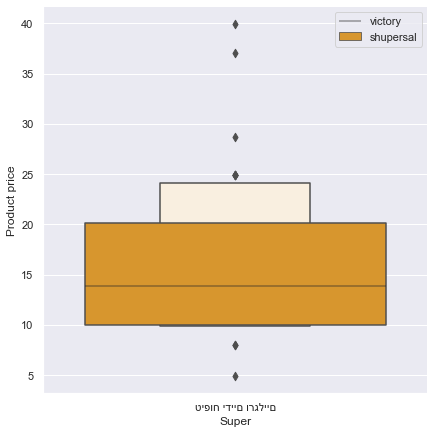

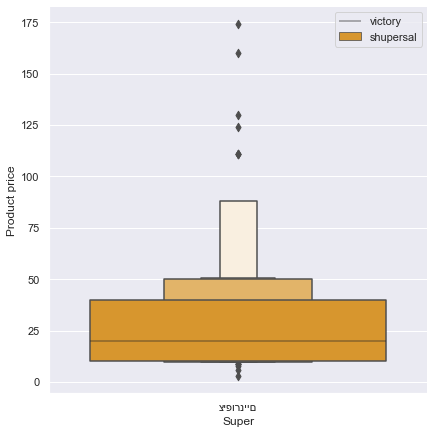

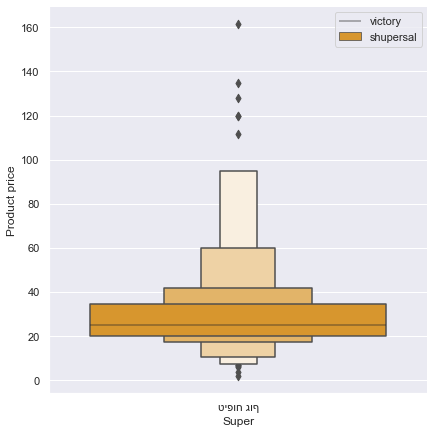

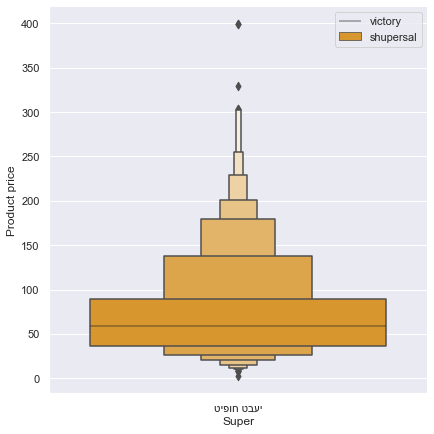

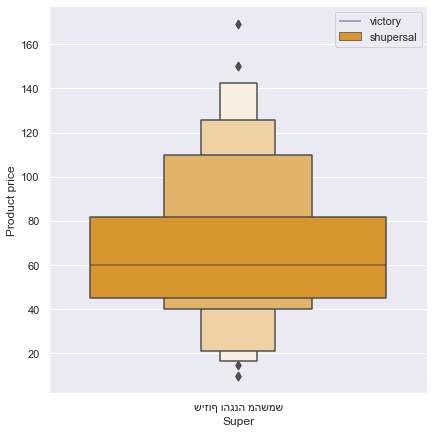

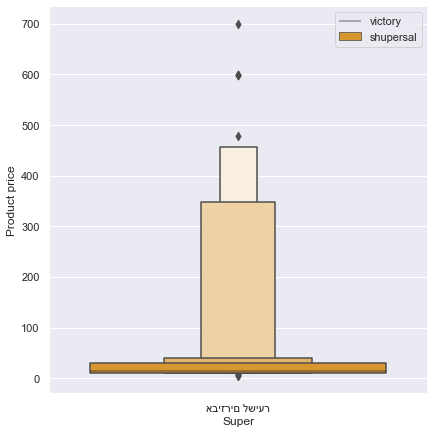

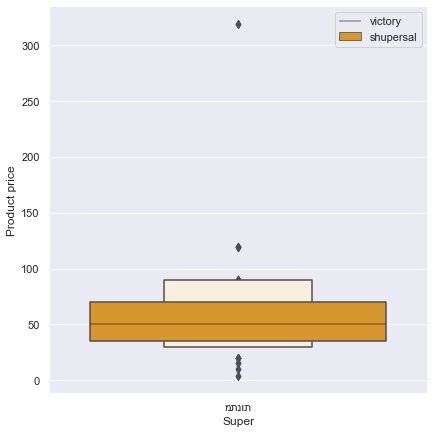

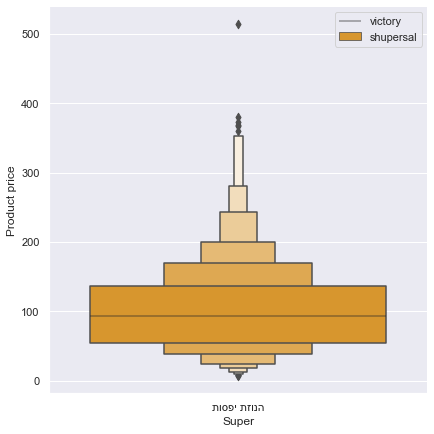

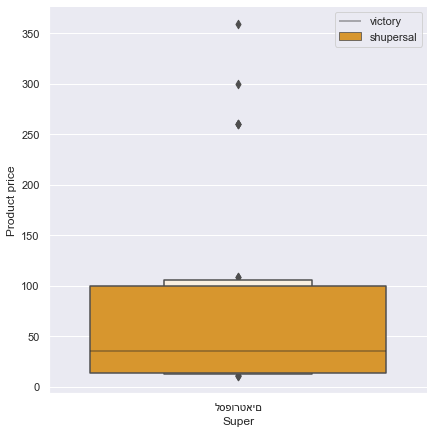

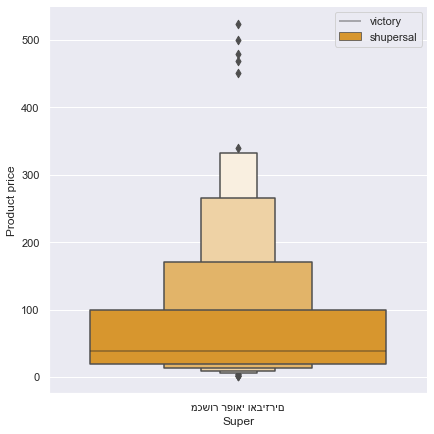

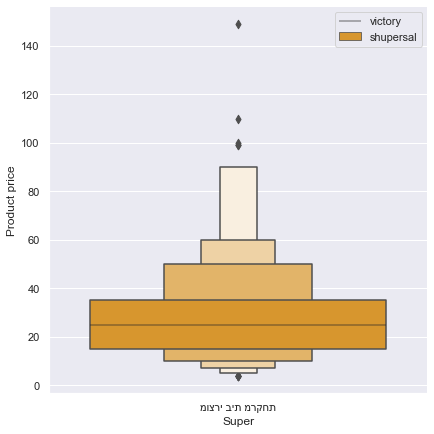

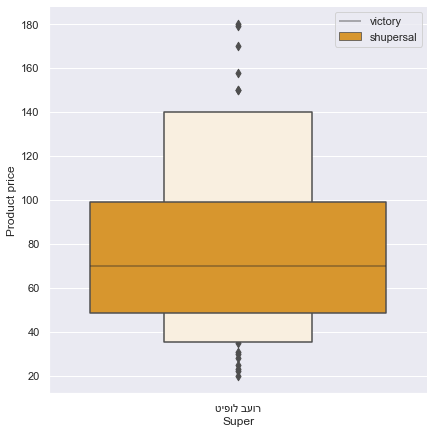

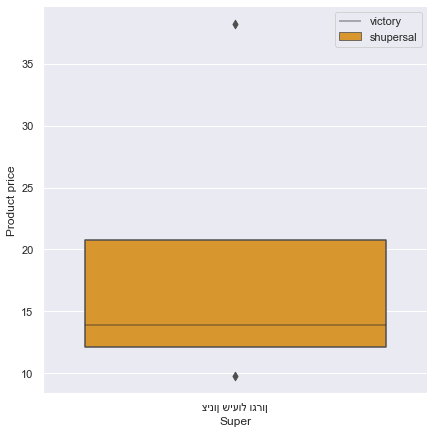

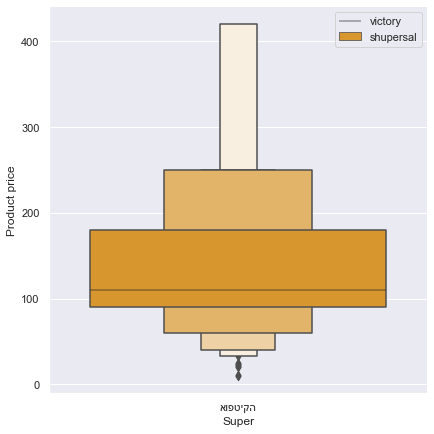

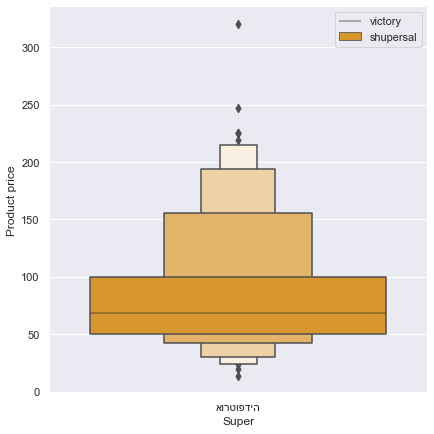

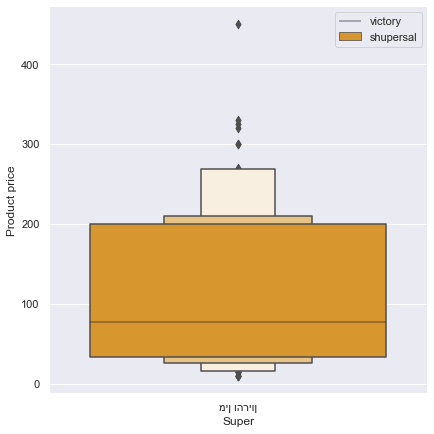

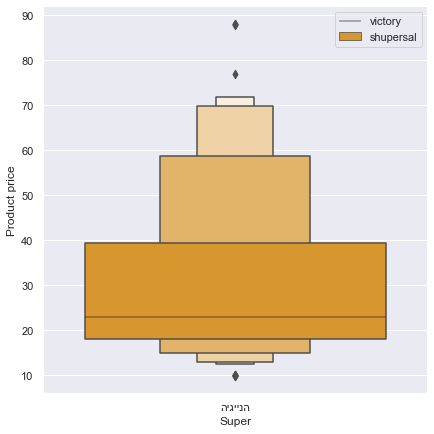

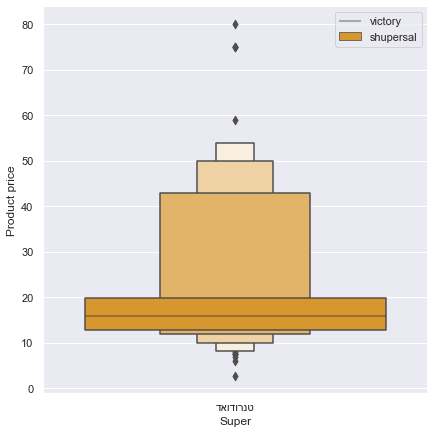

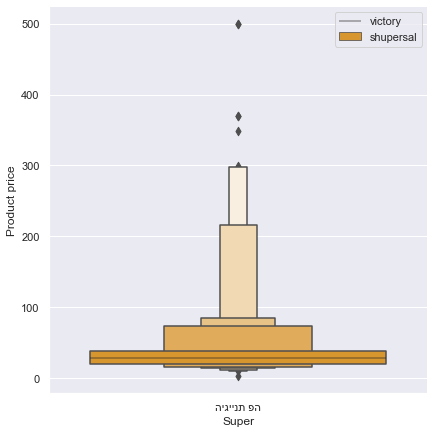

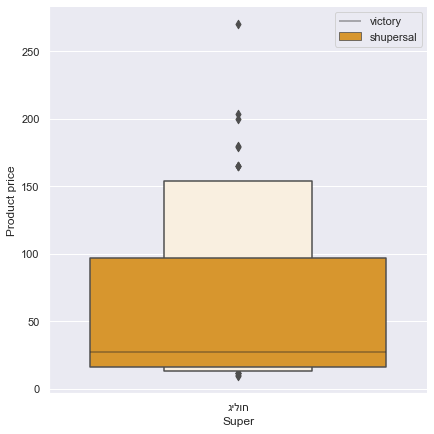

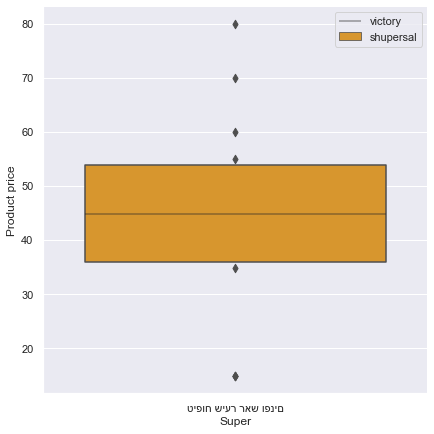

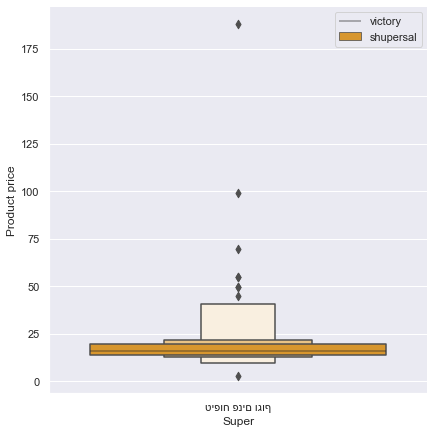

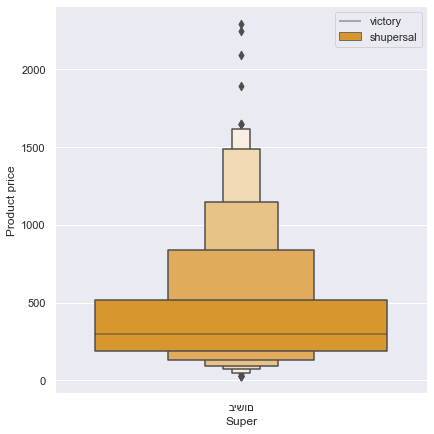

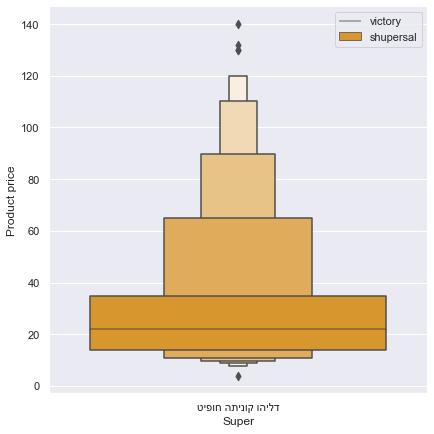

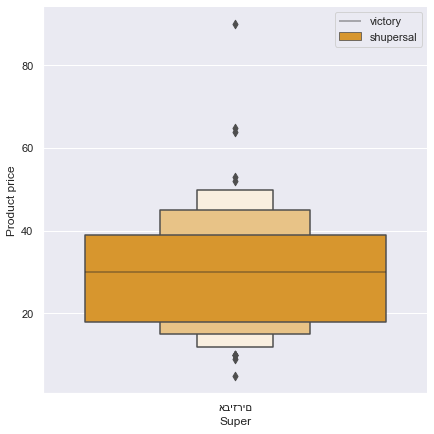

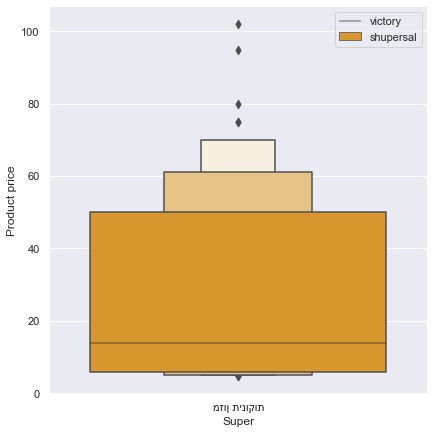

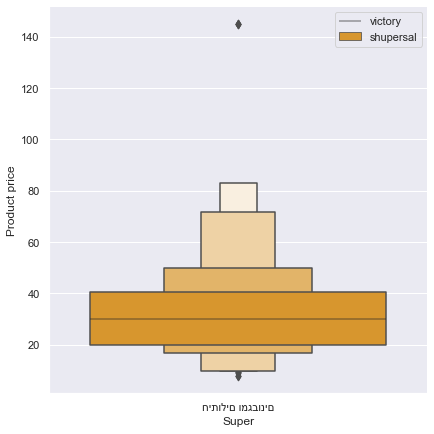

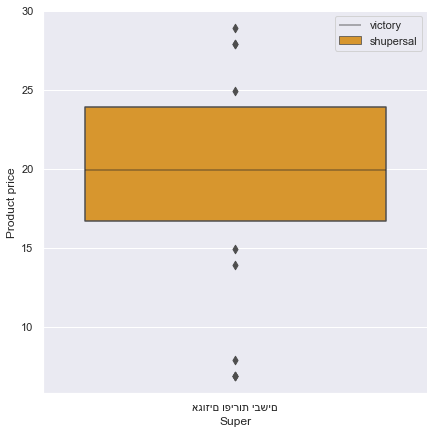

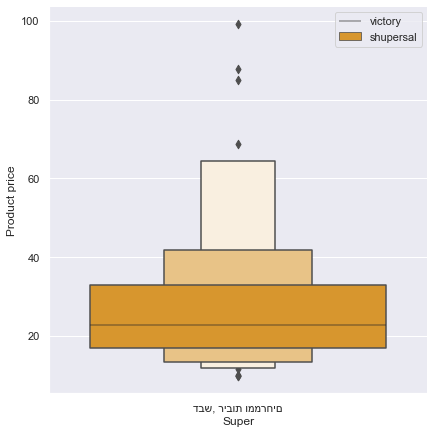

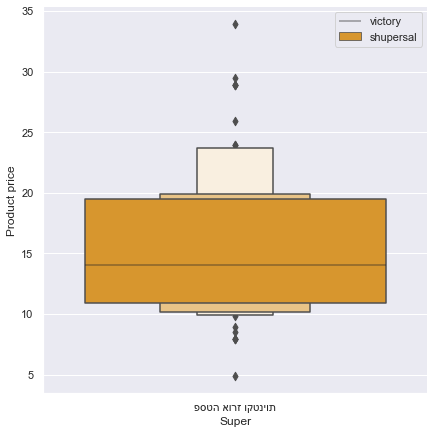

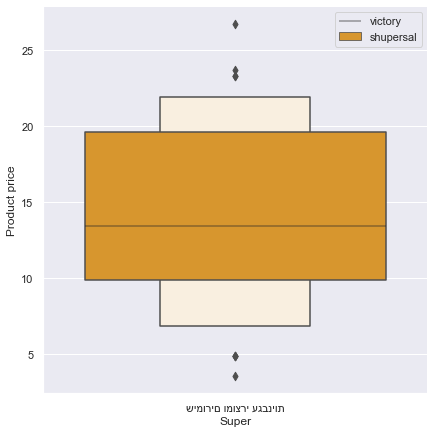

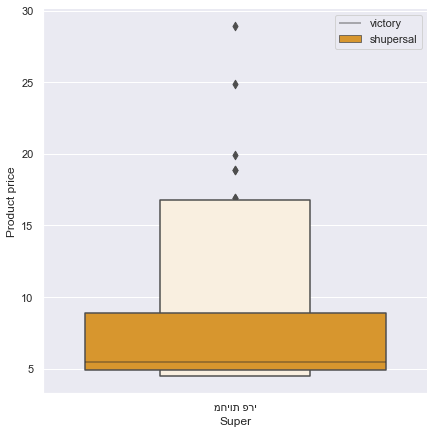

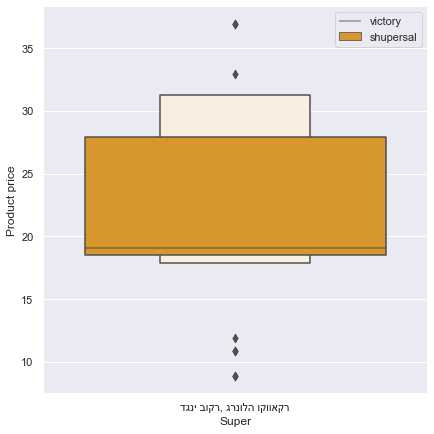

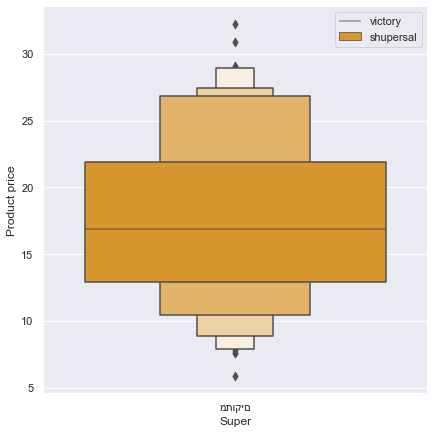

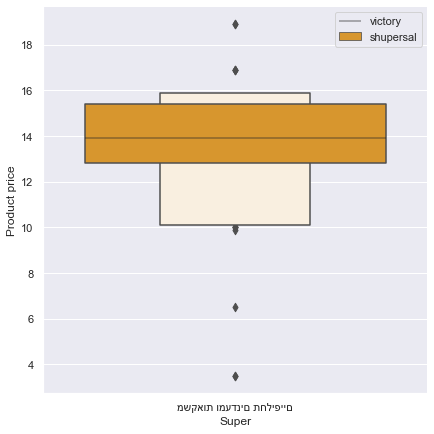

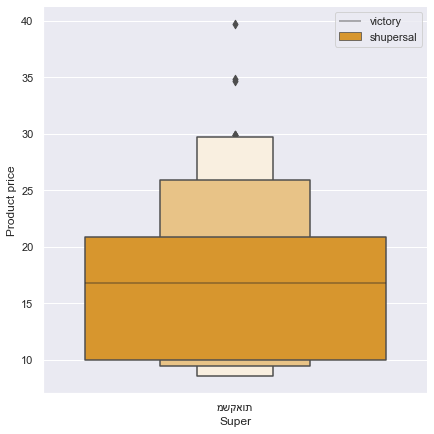

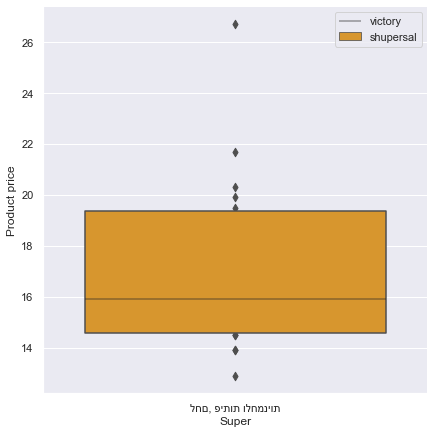

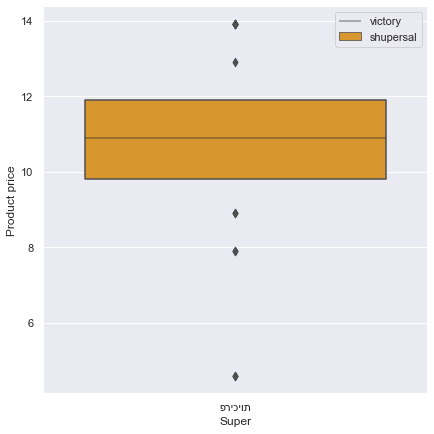

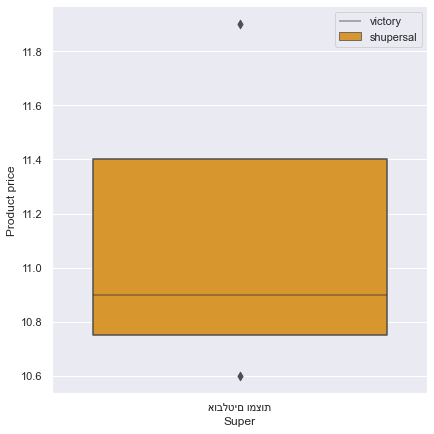

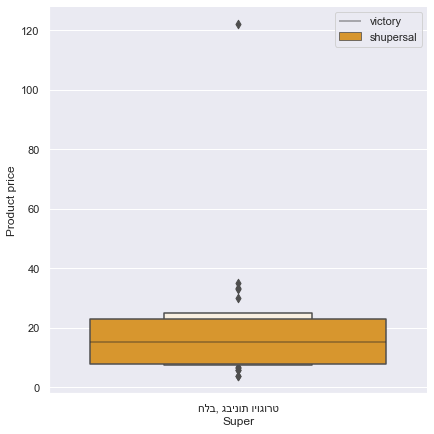

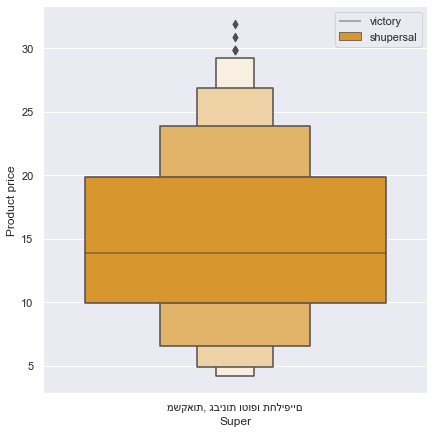

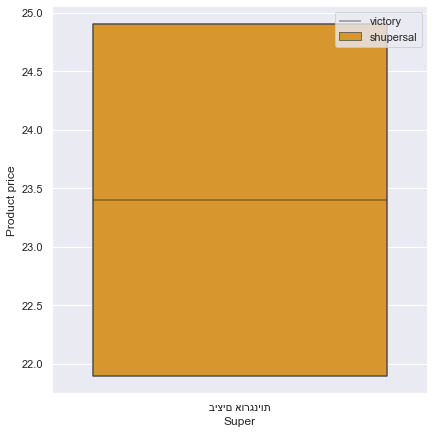

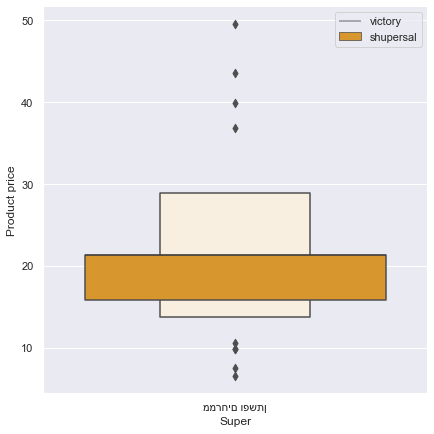

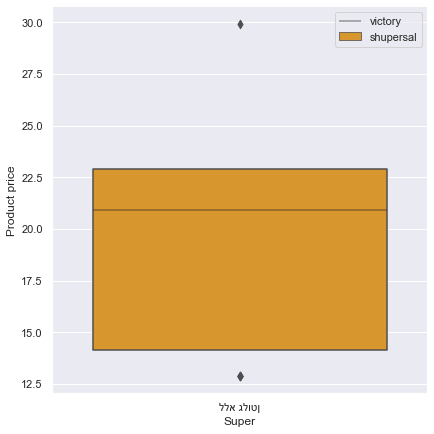

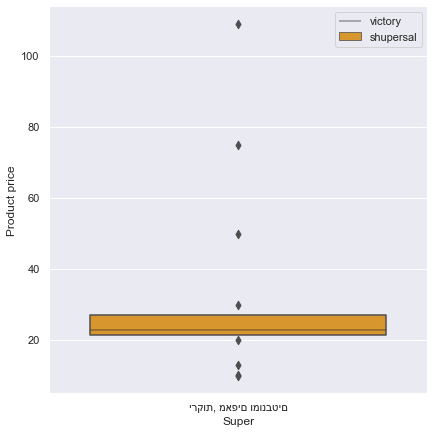

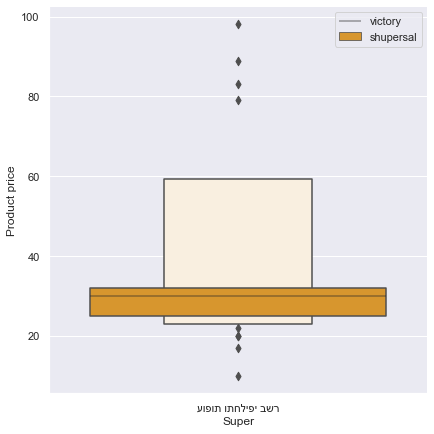

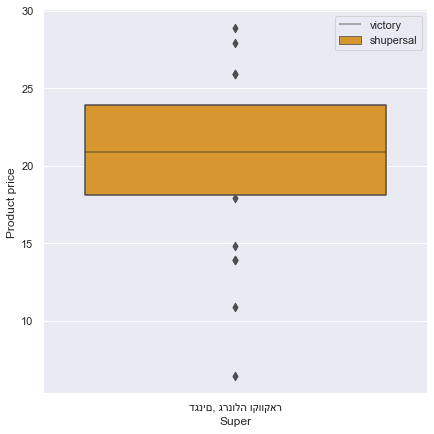

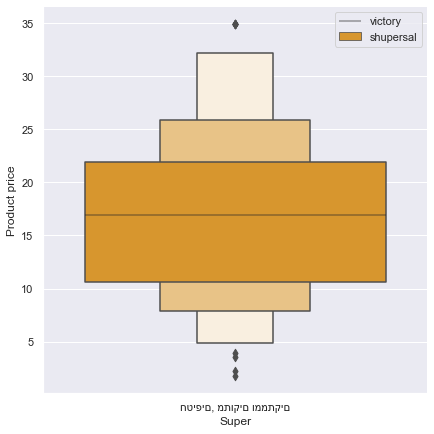

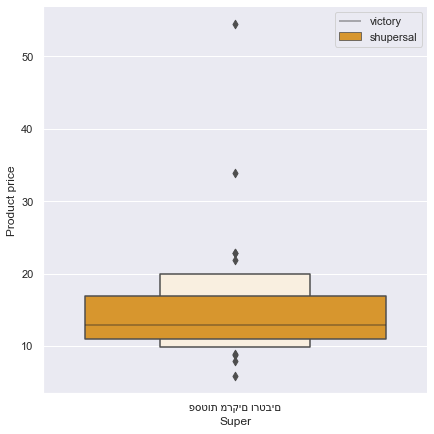

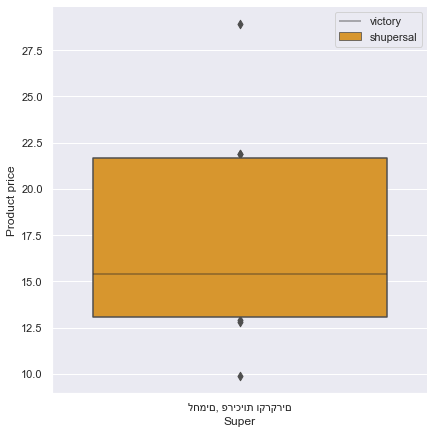

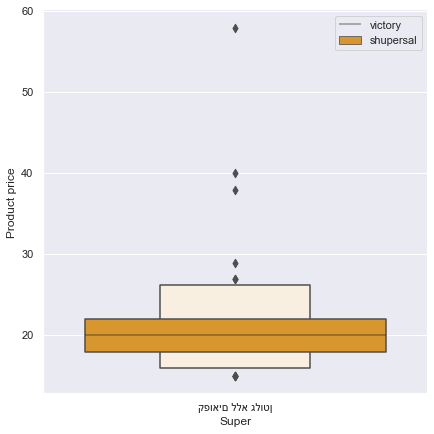

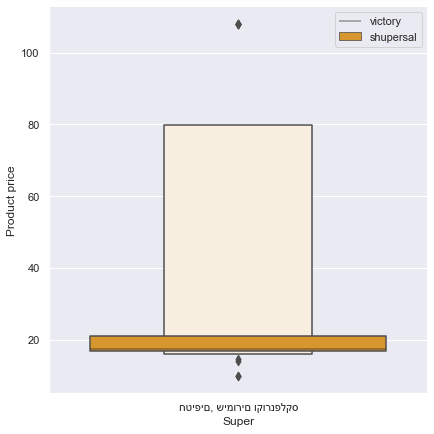

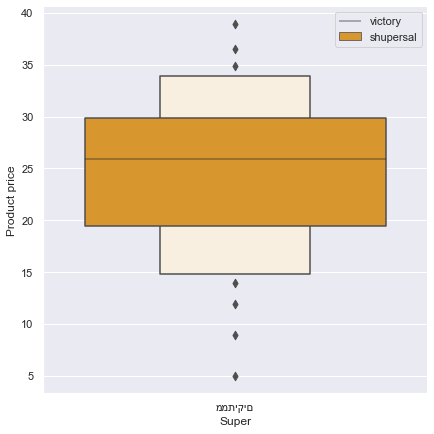

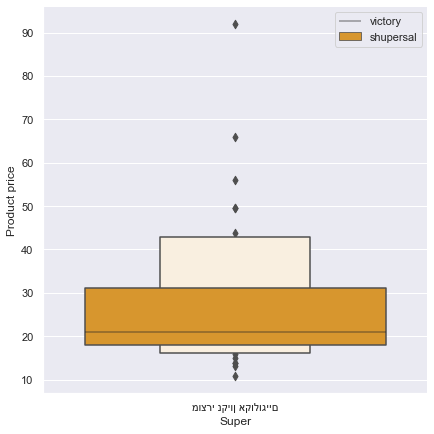

In [440]:
sns.set_theme()
for x in df2.catgory.unique():
    g = sns.catplot(
        x='catgory', 
        y='price',
        data=df2[df2.catgory==x],
        kind='boxen', 
        hue='super',
        palette=["#F39C12", "red"], 
        height=6, 
        aspect=1,
        legend=False,
        ).set_axis_labels('Super', 'Product price')
    g.ax.legend(labels=['victory','shupersal'])

# טיפול בחריגים (outliers)

ניתן לראות בבירור שמחיר רוב המוצרים הינו נמוך מ-1000 שח

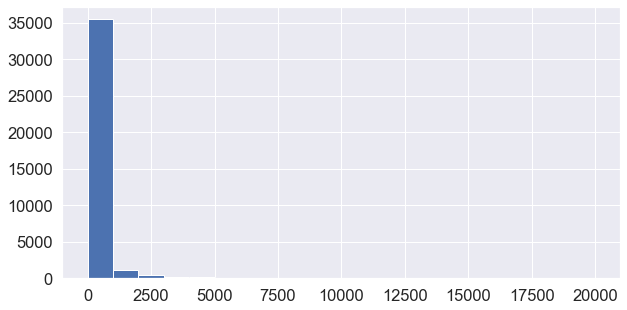

In [162]:
sns.set(font_scale = 1.5)
fig = plt.figure(figsize=(10,5))
plt.hist(df2.price, bins=20)
plt.xlabel=("price")
plt.ylabel=("Frequency")

לכן אשמור עותק הכולל גם את המוצרים היקרים ואעבוד עם עותק של מוצרים שמחירם קטן מ-3500

In [163]:
df_full=df2.copy() 

In [405]:
df2=df_full.copy()#נק' שמירה 

In [406]:
df2.price[df2.price>3500]=np.nan
df2.dropna(inplace=True)
df2.reset_index(inplace=True)
df2.drop(['index'],axis=1,inplace=True)
df2

super     catgory  mean_price_for_catgory  \
0      וויקטורי         לחם               12.000000   
1      וויקטורי         לחם               12.000000   
2      וויקטורי         לחם               12.000000   
3      וויקטורי         לחם               12.000000   
4      וויקטורי         לחם               12.000000   
...         ...         ...                     ...   
37072    שופרסל  תוספי מזון               88.955143   
37073    שופרסל  תוספי מזון               88.955143   
37074    שופרסל   לספורטאים               64.808929   
37075    שופרסל   לספורטאים               64.808929   
37076    שופרסל   לספורטאים               64.808929   

                                           product      suplier  \
0                              לחם אחיד פרוס אנג'ל        אנג'ל   
1                              לחם חיטה מלאה אנג'ל        אנג'ל   
2                    לחם מחמצת בסגנון איטלקי אנג'ל        אנג'ל   
3                           לחם עינן קל פרוס אנג'ל        אנג'ל   
4      לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל        אנג'ל   
...                                            ...          ...   
37072                         אוטריבייבי תרסיס לאף      אוטרימר   
37073                            אוטרימר תרסיס לאף      אוטרימר   
37074                             קולגן בוסט קלאסי        אלטמן   
37075                                     היילופרו  נייצ'רס פרו   
37076                               קולגן ביואקטיב  נייצ'רס פרו   

                  sizes  units  Vol_Wei    UOM  price  
0               750 גרם      1    0.750    ק"ג    6.6  
1               750 גרם      1    0.750    ק"ג   14.9  
2               500 גרם      1    0.500    ק"ג   15.9  
3               500 גרם      1    0.500    ק"ג   14.8  
4               750 גרם      1    0.750    ק"ג   12.9  
...                 ...    ...      ...    ...    ...  
37072            15 מ"ל      1    0.015   ליטר   24.9  
37073           100 מ"ל      1    0.100   ליטר   69.0  
37074  30 אריזות אישיות     30    0.000  יחידה  109.0  
37075          30 מוסות     30    0.000  יחידה  109.0  
37076          30 מוסות     30    0.000  יחידה  359.0  

[37077 rows x 10 columns]

איחוד עמודת הגודל 

In [407]:
for x in range(df2['sizes'].count()):
    df2['sizes'][x]= df2['Vol_Wei'][x]*df2['units'][x]

In [408]:
df2

super     catgory  mean_price_for_catgory  \
0      וויקטורי         לחם               12.000000   
1      וויקטורי         לחם               12.000000   
2      וויקטורי         לחם               12.000000   
3      וויקטורי         לחם               12.000000   
4      וויקטורי         לחם               12.000000   
...         ...         ...                     ...   
37072    שופרסל  תוספי מזון               88.955143   
37073    שופרסל  תוספי מזון               88.955143   
37074    שופרסל   לספורטאים               64.808929   
37075    שופרסל   לספורטאים               64.808929   
37076    שופרסל   לספורטאים               64.808929   

                                           product      suplier  sizes  units  \
0                              לחם אחיד פרוס אנג'ל        אנג'ל   0.75      1   
1                              לחם חיטה מלאה אנג'ל        אנג'ל   0.75      1   
2                    לחם מחמצת בסגנון איטלקי אנג'ל        אנג'ל    0.5      1   
3                           לחם עינן קל פרוס אנג'ל        אנג'ל    0.5      1   
4      לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל        אנג'ל   0.75      1   
...                                            ...          ...    ...    ...   
37072                         אוטריבייבי תרסיס לאף      אוטרימר  0.015      1   
37073                            אוטרימר תרסיס לאף      אוטרימר    0.1      1   
37074                             קולגן בוסט קלאסי        אלטמן    0.0     30   
37075                                     היילופרו  נייצ'רס פרו    0.0     30   
37076                               קולגן ביואקטיב  נייצ'רס פרו    0.0     30   

       Vol_Wei    UOM  price  
0        0.750    ק"ג    6.6  
1        0.750    ק"ג   14.9  
2        0.500    ק"ג   15.9  
3        0.500    ק"ג   14.8  
4        0.750    ק"ג   12.9  
...        ...    ...    ...  
37072    0.015   ליטר   24.9  
37073    0.100   ליטר   69.0  
37074    0.000  יחידה  109.0  
37075    0.000  יחידה  109.0  
37076    0.000  יחידה  359.0  

[37077 rows x 10 columns]

# למידת מכונה 

In [409]:
df2.sample(5)

super              catgory  mean_price_for_catgory  \
4602   שופרסל                ירקות               10.008842   
27789  שופרסל  איפור פנים ואביזרים               72.868315   
6130   שופרסל       גבינות מעדנייה               77.707706   
32773  שופרסל           טיפול בעור               79.154754   
11663  שופרסל   דגנים וחטיפי דגנים               16.776128   

                    product    suplier  sizes  units  Vol_Wei    UOM  price  
4602        עגבניה שרי בודד     שופרסל    0.0      1    0.000  יחידה    9.9  
27789   סומק בלאשינג בלאש02   CLINIQUE    0.0      1    0.000  יחידה  143.2  
6130    גבינה צפתית קשה 10%  מחלבות גד    1.0      1    1.000    ק"ג   74.0  
32773  סבוקלם חמאת גוף שיאה     סבוקלם    0.0    250    0.000  יחידה   79.9  
11663            כריות נוגט       תלמה  0.686      1    0.686    ק"ג   24.9

In [410]:
df2.describe()

mean_price_for_catgory         units       Vol_Wei         price
count            37077.000000  37077.000000  37077.000000  37077.000000
mean               204.253616      8.602368      0.444335    174.398084
std                415.848321     45.407310      9.978233    423.555624
min                  2.000000      0.000000      0.000000      1.000000
25%                 16.776128      1.000000      0.000000     13.900000
50%                 40.529841      1.000000      0.030000     29.900000
75%                151.515217      1.000000      0.300000    113.940000
max               2880.989740   1000.000000   1250.000000   3499.000000

In [411]:
df=df2.copy() ## נק'שמירה 


In [412]:
df.sample(10)

super             catgory  mean_price_for_catgory  \
13595    שופרסל     סבון,שמפו ומרכך               25.587903   
35679    שופרסל  דבש, ריבות וממרחים               28.564615   
32910    שופרסל             אופטיקה              136.973504   
15646    שופרסל               שקיות               18.163158   
18357    שופרסל   תאורה ואבזרי חשמל              120.141919   
5429     שופרסל     מעדנים וקינוחים                6.999099   
3940   וויקטורי       חנות מותג סנו               20.000000   
27324    שופרסל          בישום נשים              220.517936   
24254    שופרסל        לקמפינג ולים              329.280000   
26880    שופרסל              טקסטיל               78.908163   

                                           product    suplier  sizes  units  \
13595                          אל סבון ירוק שופרסל     שופרסל    1.5      3   
35679                           שקד לבן בכבישה קרה   שקד תבור    0.3      1   
32910                        עדשות טוטאל וואן-5.00      ALCON    0.0     30   
15646                       שקיות אשפה לפחים קטנים   סנו סושי    0.0    100   
18357    פעמון דלת אלחוטי 32 מנגינות לבן-זהב  IP44      OMEGA    0.0      1   
5429                          יופלה טיוב בטעם וניל      יופלה  0.348      6   
3940   מקסימה קפסולות לכביסה פלורל סנו - 40 כביסות        סנו    0.0     40   
27324                        CLASSIC AMBER קרם גוף     JIVAGO   0.15      1   
24254                          מידנית כתף 0.5 ליטר    unknown    0.0      1   
26880                           זוג כריות שינה קשה  GALA HOME    0.0      1   

       Vol_Wei    UOM  price  
13595    0.500   ליטר   12.9  
35679    0.300    ק"ג   38.9  
32910    0.000  יחידה  180.0  
15646    0.000  יחידה   18.9  
18357    0.000  יחידה   79.0  
5429     0.058    ק"ג   11.9  
3940     0.000  יחידה   36.9  
27324    0.150   ליטר   99.0  
24254    0.000  יחידה   20.0  
26880    0.000  יחידה   39.0

In [413]:
from sklearn.preprocessing import LabelEncoder

In [414]:
df.columns

Index(['super', 'catgory', 'mean_price_for_catgory', 'product', 'suplier',
       'sizes', 'units', 'Vol_Wei', 'UOM', 'price'],
      dtype='object')

אהפוך את הדאטה למספרי על מנת שאוכל לעבד אותו 

In [415]:
df['super']=LabelEncoder().fit_transform(df['super'])
df['catgory']=LabelEncoder().fit_transform(df['catgory'])
df['product']=LabelEncoder().fit_transform(df['product'])
df['suplier']=LabelEncoder().fit_transform(df['suplier'])
df['UOM']=LabelEncoder().fit_transform(df['UOM'])


In [416]:
df.describe()

super       catgory  mean_price_for_catgory       product  \
count  37077.000000  37077.000000            37077.000000  37077.000000   
mean       0.875880    159.590555              204.253616  18490.993581   
std        0.329723     95.504799              415.848321  10674.708133   
min        0.000000      0.000000                2.000000      0.000000   
25%        1.000000     85.000000               16.776128   9250.000000   
50%        1.000000    151.000000               40.529841  18489.000000   
75%        1.000000    237.000000              151.515217  27733.000000   
max        1.000000    337.000000             2880.989740  36982.000000   

            suplier         units       Vol_Wei           UOM         price  
count  37077.000000  37077.000000  37077.000000  37077.000000  37077.000000  
mean    1278.092187      8.602368      0.444335      0.839307    174.398084  
std      806.377246     45.407310      9.978233      0.869190    423.555624  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%      636.000000      1.000000      0.000000      0.000000     13.900000  
50%     1299.000000      1.000000      0.030000      1.000000     29.900000  
75%     2014.000000      1.000000      0.300000      2.000000    113.940000  
max     2561.000000   1000.000000   1250.000000      2.000000   3499.000000

In [417]:
df.dropna(inplace=True)

In [418]:
df

super  catgory  mean_price_for_catgory  product  suplier  sizes  units  \
0          0      137               12.000000    13366      838   0.75      1   
1          0      137               12.000000    13402      838   0.75      1   
2          0      137               12.000000    13430      838    0.5      1   
3          0      137               12.000000    13448      838    0.5      1   
4          0      137               12.000000    13458      838   0.75      1   
...      ...      ...                     ...      ...      ...    ...    ...   
37072      1      330               88.955143     2463      743  0.015      1   
37073      1      330               88.955143     2467      743    0.1      1   
37074      1      146               64.808929    29410      818    0.0     30   
37075      1      146               64.808929     8121     1876    0.0     30   
37076      1      146               64.808929    29411     1876    0.0     30   

       Vol_Wei  UOM  price  
0        0.750    2    6.6  
1        0.750    2   14.9  
2        0.500    2   15.9  
3        0.500    2   14.8  
4        0.750    2   12.9  
...        ...  ...    ...  
37072    0.015    1   24.9  
37073    0.100    1   69.0  
37074    0.000    0  109.0  
37075    0.000    0  109.0  
37076    0.000    0  359.0  

[37077 rows x 10 columns]

In [419]:
X=df.drop(['price'],axis=1).copy()
y=df['price']

In [420]:
X

super  catgory  mean_price_for_catgory  product  suplier  sizes  units  \
0          0      137               12.000000    13366      838   0.75      1   
1          0      137               12.000000    13402      838   0.75      1   
2          0      137               12.000000    13430      838    0.5      1   
3          0      137               12.000000    13448      838    0.5      1   
4          0      137               12.000000    13458      838   0.75      1   
...      ...      ...                     ...      ...      ...    ...    ...   
37072      1      330               88.955143     2463      743  0.015      1   
37073      1      330               88.955143     2467      743    0.1      1   
37074      1      146               64.808929    29410      818    0.0     30   
37075      1      146               64.808929     8121     1876    0.0     30   
37076      1      146               64.808929    29411     1876    0.0     30   

       Vol_Wei  UOM  
0        0.750    2  
1        0.750    2  
2        0.500    2  
3        0.500    2  
4        0.750    2  
...        ...  ...  
37072    0.015    1  
37073    0.100    1  
37074    0.000    0  
37075    0.000    0  
37076    0.000    0  

[37077 rows x 9 columns]

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [422]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14831 entries, 26280 to 1823
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   super                   14831 non-null  int32  
 1   catgory                 14831 non-null  int32  
 2   mean_price_for_catgory  14831 non-null  float64
 3   product                 14831 non-null  int32  
 4   suplier                 14831 non-null  int32  
 5   sizes                   14831 non-null  object 
 6   units                   14831 non-null  int64  
 7   Vol_Wei                 14831 non-null  float64
 8   UOM                     14831 non-null  int32  
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 869.0+ KB


In [423]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22246 entries, 20986 to 2732
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   super                   22246 non-null  int32  
 1   catgory                 22246 non-null  int32  
 2   mean_price_for_catgory  22246 non-null  float64
 3   product                 22246 non-null  int32  
 4   suplier                 22246 non-null  int32  
 5   sizes                   22246 non-null  object 
 6   units                   22246 non-null  int64  
 7   Vol_Wei                 22246 non-null  float64
 8   UOM                     22246 non-null  int32  
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 1.3+ MB


In [424]:
reg=LinearRegression(fit_intercept=False)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [425]:
y_pred

array([385.07917346, 644.94278919,  -2.68389663, ...,  62.60175264,
       147.54690366,  -0.73332242])

In [426]:

df_chek=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [427]:
df_chek

y_test       y_pred
26280   734.19   385.079173
20266   379.00   644.942789
3004     10.90    -2.683897
22500  2699.00  1621.944193
30971    16.90    55.116223
...        ...          ...
4307     21.90     4.448344
28190    58.90    73.930003
28701    59.25    62.601753
18459    34.90   147.546904
1823     11.90    -0.733322

[14831 rows x 2 columns]

In [428]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(y_test,y_pred).flatten()

print(SSE)

[1.15989326e+09]


In [429]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred).flatten()

array([0.56255061])

In [430]:
print (f"r^2 score: {metrics.r2_score(y_test,y_pred)}")

r^2 score: 0.5625506133948557


In [431]:
for k,v in sorted(dict(zip(X.columns,abs(reg.coef_))).items(),key=lambda x:x[1], reverse=True):
    print(k,v)

super 23.093636335479058
UOM 19.339889985341202
mean_price_for_catgory 0.753290419495092
Vol_Wei 0.22257935259501965
sizes 0.16936839726189926
catgory 0.0964374884536012
units 0.036574185472175925
suplier 0.0017662021384544492
product 0.00021573193499596882


# עזרים


In [191]:
df_union[df_union.super=="שופרסל"].catgory.nunique()

200

In [192]:
df_union[df_union.super=="שופרסל"].catgory.unique()

array(['ירקות', 'פירות', 'פיצוחים ופירות יבשים', 'יוגורט ומשקאות יוגורט',
       'מעדנים וקינוחים', 'מוצרי חלב וביצים', 'מדף הגבינות',
       'גבינות מעדנייה', 'מוצרים לאפיה ובישול', 'מוצרי עוף והודו',
       'בשר בקר וכבש', 'דגים', 'מוצרי בשר "על האש"',
       'לחמים, לחמניות ופיתות מהמאפייה', 'לחם, לחמניות ופיתות',
       'מאפים ועוגות מהמאפיה', 'עוגות ארוזות', 'משקאות חריפים',
       'בירה ומשקאות אנרגיה', 'יינות ותירוש', 'משקאות קלים', 'מים וסודה',
       'תה וקפה', 'קפסולות ופולים לאספרסו', 'סיגריות וגפרורים',
       'ירקות ופירות קפואים', 'מוצרי בשר, עוף ודגים קפואים',
       'מוצרי בצק ומאפה קפוא', 'חומוס וסלטים', 'נקניקים ודגים מעושנים',
       'קינוחים ומנות אחרונות', 'אוכל מוכן/ להכנה מהירה',
       'תחליפי בשר קפוא', 'גלידות', 'פסטה, אורז , קוסקוס וקטניות',
       'רטבים ותוספות', 'שמן חומץ ומיץ לימון', 'שימורים',
       'מוצרי יסוד ותבלינים', 'דבש ריבות וממרחים',
       'מרקים, קרוטונים ותבשילים', 'מיוחדים', 'דגנים וחטיפי דגנים',
       'ממתקים', 'חטיפים מלוחים', 'עוגות, עו

In [193]:
df_union[df_union.super=="וויקטורי"].catgory.nunique()

149

In [194]:
df_union[df_union.super=="וויקטורי"].catgory.unique()

array(['לחם', 'לחמניות ופיתות', 'פריכיות, מצות ותחליפי לחם',
       'מאפייה טריה', 'פירות', 'ירקות', 'פירות יבשים, אגוזים ופיצוחים',
       'חלב ומשקאות', 'משקאות סויה ואורז', "קוטג' וגבינה לבנה",
       'בולגרית, פטה, ומלוחה', 'גבינה צהובה ומוצרלה',
       'גבינות מחלב עיזים או כבשים', 'גבינות קשות', 'גבינות רכות',
       'גבינת שמנת', 'יוגורט', 'מעדנים', 'בשר טרי', 'עוף והודו טרי',
       'בשר ועוף מוכן', 'דגים טריים', 'דגים ארוזים וסושי טרי', 'נקניקיות',
       'נקניקים ופסטרמה', 'חמאה, מרגרינה', 'שמנת ולבן',
       'שמנת לבישול והקצפה', 'סלטים', 'פסטה טריה', 'ביצים', 'טופו וסייטן',
       'חומוס וטחינה', 'רוגלך ומאפים מתוקים', 'גבינות, חמאה ומרגרינה',
       'דגים כבושים', 'נקניק ופסטרמה', 'בשר ועוף', 'דגים',
       'בצקים, מאפים ופיצות', 'ירקות ופירות',
       'שניצל מהצומח וארוחות מוכנות צמחיות',
       'שניצל בשרי וארוחות מוכנות בשריות', 'גלידות וקינוחים',
       'חנות מותג טבעול', 'תבשילים', 'מרקים מוכנים', 'אבקות למרק ולתיבול',
       'קרוטונים ושקדי מרק', 'שימורי ירקות', 'שימ

<AxesSubplot:ylabel='catgory'>

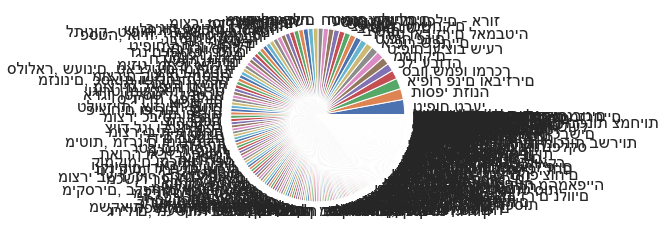

In [195]:
df_union['catgory'].value_counts().plot(kind='pie')

<AxesSubplot:>

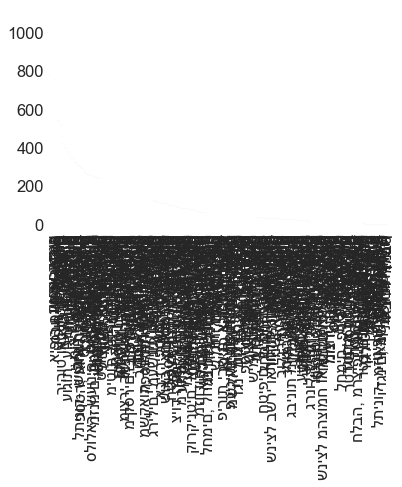

In [196]:
df_union['catgory'].value_counts().plot(kind='bar')

In [197]:
sum(df_union.price>200)

6301

In [198]:
sum(df_union.price<200)

31112

In [199]:
sum(df_union.price<2000)

36590

In [200]:
sum(df_union.price>2000)

833

In [442]:
df2.sample(30)

super                          catgory  mean_price_for_catgory  \
14137    שופרסל    לתינוק- טיפוח, הלבשה ואביזרים               27.483056   
5668     שופרסל                      מדף הגבינות               16.822671   
13274    שופרסל                  פריכיות וקרקרים               10.527246   
831    וויקטורי                           מעדנים                6.000000   
873    וויקטורי                          בשר טרי               76.000000   
20386    שופרסל                  כלי הגשה ואירוח              391.770202   
25638    שופרסל                        כלי עבודה              303.251460   
23933    שופרסל                     עיצוב וחיטוב              202.044348   
35151    שופרסל                     מזון תינוקות               28.683495   
18884    שופרסל               מוצרים קטנים למטבח              311.302048   
31070    שופרסל                       טיפוח טבעי               73.048862   
21990    שופרסל            שולחנות, שידות וכסאות              855.777443   
33161    שופרסל                        אורטופדיה               87.919405   
33383    שופרסל                  סבון,שמפו ומרכך               25.587903   
32771    שופרסל                       טיפול בעור               79.154754   
10269    שופרסל              שמן חומץ ומיץ לימון               20.107143   
28022    שופרסל              איפור פנים ואביזרים               72.868315   
26528    שופרסל                      לבית ולמטבח               44.475768   
18247    שופרסל                 מוצרי טיפוח אישי              589.460982   
17782    שופרסל              כביסה ,ייבוש וגיהוץ             1138.917706   
3913   וויקטורי             נרות, גפרורים ופחמים                8.000000   
431    וויקטורי             בולגרית, פטה, ומלוחה               22.000000   
5936     שופרסל                   גבינות מעדנייה               77.707706   
27767    שופרסל              איפור פנים ואביזרים               72.868315   
34383    שופרסל                            בישום              430.716507   
741    וויקטורי                           יוגורט                8.000000   
32113    שופרסל                      תוספי תזונה              102.102490   
2249   וויקטורי                        דגני בוקר               21.000000   
15870    שופרסל                    חד פעמי ונרות               16.325969   
17092    שופרסל  סלולאר, שעונים, טאבלטים ומצלמות             1344.375486   

                                                 product          suplier  \
14137                           סטריליזטור ומחמם בקבוקים           שופרסל   
5668                                    גבינת קשקבל טחון          השומרון   
13274                              חטיף קרקר קינואה צ'יה             ברדז   
831                      מעדן חלב בטעם תות עם קצפת מילקי            מילקי   
873    צוואר צלעות ללא עצם טרי חלק בכשרות מהודרת לפי ...          unknown   
20386                        סכין ירקות משופע 11ס"מ GS58           GLOBAL   
25638                  מכונת שטיפה בלחץ Lavor Galaxy 160            LAVOR   
23933        משקולת ויניל אולימפי 1.25 ק"ג - קוטר 50 מ"מ              ATX   
35151                                 מטרנה סנסיטיב פגים            מטרנה   
18884   טוסטר אובן ענק 85 ליטר לבן + טורבו + תאורה W2800        GOLD LINE   
31070                                    דראגון שמן סיני           דראגון   
21990                                     עמדת עבודה FLY           עץ פטל   
33161                             סד שורש כף היד שמאל OS  באיוס אורטופדיה   
33383                              VAULT color-lock שמפו            אמיקה   
32771                                אינוביישן פיטו סרום           סבוקלם   
10269                                         שמן בוטנים            טעמים   
28022                           עפרון שפתיים עם חידוד154          unknown   
26528                                 מאג קרמיקה 350 מ"ל          unknown   
18247                                מכונת גילוח PHILIPS          PHILIPS   
17782                          מגהץ קיטור אנכי PANASUSHI        GOLD LINE   
3913                                